<a href="https://colab.research.google.com/github/syifanl/Healthcare-Fraud-Detector/blob/main/Healthcare_Fraud_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

According to the most recent Health Care Fraud and Abuse Control Program Annual Report (2019) Estimated fraud costs up to 10% of total healthcare expendeture worldwide. The fraud case impacts the increase in its main cost to everyone involved in the healthcare system and damages the long-term solvency of programs such as incurance services/health care plans in the community (Barranek, Action, & Services, 2018). 

Types of Healthcare Provider Fraud. Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:
- Billing for services that were not provided.
- Duplicate submission of a claim for the same service.
- Misrepresenting the service provided.
- Charging for a more complex or expensive service than was actually provided.
- Billing for a covered service when the service actually provided was not covered.

Therefore, comprehensive synthesis and evaluation are critical to providing useful information and reliable evidence to decision makers. This project proposes fraud mitigation as well as to prevent financial loss for insurance companies and also for goverment. 

# **Objectives**

This project use to predict whether a provider is potentially fraud or not and to find the reason behind it as well as to prevent financial loss. 

# **Project Description**

This Project will build model classification to predict Healthcare Fraud. Data contain combinations of patient's information, inpatient, and outpatient claim record. We will use a binary classification model based on the claims filed by the provider to predict the provider is potentially fraudulent or not.

# A. Import Package

In [377]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

# B. Import Dataset 

In [378]:
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [379]:
Train = pd.read_csv("/content/drive/MyDrive/archive/Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv("/content/drive/MyDrive/archive/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv("/content/drive/MyDrive/archive/Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv("/content/drive/MyDrive/archive/Train_Outpatientdata-1542865627584.csv")

In [380]:
Test = pd.read_csv("/content/drive/MyDrive/archive/Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv("/content/drive/MyDrive/archive/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv("/content/drive/MyDrive/archive/Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv("/content/drive/MyDrive/archive/Test_Outpatientdata-1542969243754.csv")

We will use 4 Kind of Data set 
1. Train & Test dataset contain : 
  - Provider number
  - PotentialFraud  for corresponding whether this provider is pottentially fraudulent or not. 

2. Beneficiary Dataset (Train & Test) 

    This dataset contain personal data of patient/person who receives a benefit of healthcare insurance. Columns of this dataset are explained below : 
  - BeneID : BeneficaryID
  - DOB : Day of birth 
  - DOD : Day of Death 
  - Gender : Describe patient gender 
  - Race : Describe patient Race
  - RenalDeaseaseIndicator : Indicator of patient weather has renal/kedney disease or not, can also use as an indicator for claim 
  - State : Describe where is the patient state 
  - Country : Describe where is the patient country 
  - ChronicCond_* : The columns started with “ChronicCond_” indicates if the patient has existing that particular disease. Which also indicates the risk score of that patient.
  - IPAnnualReimbursementAmt: It consists of the maximum reimbursement amount for hospitalization annually.
  - IPAnnualDeductibleAmt: It consists of a premium paid by the patient for hospitalization annually.
  - OPAnnualReimbursementAmt: It consists of the maximum reimbursement amount for outpatient visits annually.
  - OPAnnualDeductibleAmt: It consists of a premium paid by the patient for outpatient visits annually.

3. Inpatient Dataset (Train & Test)

    It consists of the claim details for the patients who were admitted into the hospital. So, it consists of 3 extra columns Admission date, Discharge date, and Diagnosis Group code.

  - ClaimStartDt: It contains the date when the claim started in yyyy-mm-dd format.
  - ClaimEndDt: It contains the date when the claim ended in yyyy-mm-dd format.
  - Provider: It contains the unique id of the provider.
  - InscClaimAmtReimbursed: It contains the amount reimbursed for that particular claim.
  - AttendingPhysician: It contains the id of the Physician who attended the patient.
  - OperatingPhysician: It contains the id of the Physician who operated on the patient.
  - OtherPhysician: It contains the id of the Physician other than
  AttendingPhysician and
  - OperatingPhysician who treated the patient.
  - ClmDiagnosisCode: It contains codes of the diagnosis performed by the provider on the patient for that claim.
  - ClmProcedureCode: It contains the codes of the procedures of the patient for treatment for that particular claim.
  - DeductibleAmtPaid: It consists of the amount by the patient. That is equal to Total_claim_amount — Reimbursed_amount.
  - AdmissionDt: It contains the date on which the patient was admitted into the hospital in yyyy-mm-dd format.
  - DischargeDt: It contains the date on which the patient was discharged from the hospital in yyyy-mm-dd format.
  - DiagnosisGroupCode: It contains a group code for the diagnosis done on the patient.

4. Outpatient Dataset (Train and Test)

    It consists of the claim details for the patients who were not admitted into the hospital, who only visited there.



## a. Train Dataset

In [381]:
Train.head(2)

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes

In [382]:
Train_Beneficiary.tail(2)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  \
138554  BENE159197  1930-01-01  NaN       1     1                     0   
138555  BENE159198  1952-04-01  NaN       2     1                     0   

        State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
138554     16     560                   12                   12  ...   
138555     21      20                   12                   12  ...   

        ChronicCond_Depression  ChronicCond_Diabetes  \
138554                       2                     2   
138555                       1                     1   

        ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
138554                          1                         2   
138555                          2                         2   

        ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
138554                                2                   2   
138555                                1                   2   

        IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
138554                         0                      0   
138555                         0                      0   

        OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
138554                      2650                     10  
138555                      5470                   1870  

[2 rows x 25 columns]

In [383]:
Train_Inpatient.head(2)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN                 NaN   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0               5849                 NaN                NaN   
1                NaN                 NaN             7092.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  

[2 rows x 30 columns]

In [384]:
Train_Outpatient.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   

  DeductibleAmtPaid  ClmAdmitDiagnosisCode  
0                 0                  56409  
1                 0                  79380  

[2 rows x 27 columns]

## b. Test Dataset

In [385]:
Test.head(2)

Provider
0  PRV51002
1  PRV51006

In [386]:
Test_Beneficiary.head(2)

BeneID         DOB         DOD  Gender  Race RenalDiseaseIndicator  \
0  BENE11001  1943-01-01         NaN       1     1                     0   
1  BENE11007  1940-09-01  2009-12-01       1     2                     0   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     39     230                   12                   12  ...   
1     45     610                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     1                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         1                                1   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                      1490                    160  

[2 rows x 25 columns]

In [387]:
Test_Beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [388]:
Test_Inpatient.head(2)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-09-09  ...               5990                 570   
1            NaN  2008-12-25  ...               4549               29570   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0              41071                4280             4443.0   
1              34831                 NaN             5551.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0             5849.0                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  

[2 rows x 30 columns]

In [389]:
Test_Outpatient.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                      30          PHY381777                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0      PHY347633              V5832  ...                NaN   
1      PHY381777               9594  ...                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   

  DeductibleAmtPaid  ClmAdmitDiagnosisCode  
0                 0                    NaN  
1                 0                    NaN  

[2 rows x 27 columns]

# C. Data Describing

## a. Missing Data

In [390]:
Beneficiary_null = Train_Beneficiary.isnull().sum().reset_index()
Beneficiary_null.columns = ['feature','missing_value']
Beneficiary_null['percentage'] = round((Beneficiary_null['missing_value']/len(Train_Beneficiary))*100,2)
Beneficiary_null = Beneficiary_null.sort_values('percentage', ascending=False).reset_index(drop=True)
Beneficiary_null = Beneficiary_null[Beneficiary_null['percentage']>0]
Beneficiary_null

feature  missing_value  percentage
0     DOD         137135       98.97

In [391]:
Inpatient_null = Train_Inpatient.isnull().sum().reset_index()
Inpatient_null.columns = ['feature','missing_value']
Inpatient_null['percentage'] = round((Inpatient_null['missing_value']/len(Train_Inpatient))*100,2)
Inpatient_null = Inpatient_null.sort_values('percentage', ascending=False).reset_index(drop=True)
Inpatient_null = Inpatient_null[Inpatient_null['percentage']>0]
Inpatient_null

feature  missing_value  percentage
0    ClmProcedureCode_6          40474      100.00
1    ClmProcedureCode_5          40465       99.98
2    ClmProcedureCode_4          40358       99.71
3    ClmProcedureCode_3          39509       97.62
4   ClmDiagnosisCode_10          36547       90.30
5        OtherPhysician          35784       88.41
6    ClmProcedureCode_2          35020       86.52
7    ClmProcedureCode_1          17326       42.81
8    OperatingPhysician          16644       41.12
9    ClmDiagnosisCode_9          13497       33.35
10   ClmDiagnosisCode_8           9942       24.56
11   ClmDiagnosisCode_7           7258       17.93
12   ClmDiagnosisCode_6           4838       11.95
13   ClmDiagnosisCode_5           2894        7.15
14   ClmDiagnosisCode_4           1534        3.79
15    DeductibleAmtPaid            899        2.22
16   ClmDiagnosisCode_3            676        1.67
17   ClmDiagnosisCode_2            226        0.56
18   AttendingPhysician            112        0.28

In [392]:
Outpatient_null = Train_Outpatient.isnull().sum().reset_index()
Outpatient_null.columns = ['feature','missing_value']
Outpatient_null['percentage'] = round((Outpatient_null['missing_value']/len(Train_Outpatient))*100,2)
Outpatient_null = Outpatient_null.sort_values('percentage', ascending=False).reset_index(drop=True)
Outpatient_null = Outpatient_null[Outpatient_null['percentage']>0]
Outpatient_null

feature  missing_value  percentage
0      ClmProcedureCode_6         517737      100.00
1      ClmProcedureCode_5         517737      100.00
2      ClmProcedureCode_4         517735      100.00
3      ClmProcedureCode_3         517733      100.00
4      ClmProcedureCode_2         517701       99.99
5      ClmProcedureCode_1         517575       99.97
6     ClmDiagnosisCode_10         516654       99.79
7      ClmDiagnosisCode_9         502899       97.13
8      ClmDiagnosisCode_8         494825       95.57
9      ClmDiagnosisCode_7         484776       93.63
10     ClmDiagnosisCode_6         468981       90.58
11     ClmDiagnosisCode_5         443393       85.64
12     OperatingPhysician         427120       82.50
13  ClmAdmitDiagnosisCode         412312       79.64
14     ClmDiagnosisCode_4         392141       75.74
15         OtherPhysician         322691       62.33
16     ClmDiagnosisCode_3         314480       60.74
17     ClmDiagnosisCode_2         195380       37.74
18     ClmDiagnosisCode_1          10453        2.02
19     AttendingPhysician           1396        0.27

Refering to the dataset, missing data occurs because of the nullable field, when features not filled with value it will consider as null, for example:  
- DOD (Date of Death) have a lot of null data which means the patient is still alive.
- ClmDiagnosisCode_10 is very rare among patient which means there is not so much patient with this diagnose or this diagnose is rarely get claim. 

## b. Duplicated Data

In [393]:
Train_Beneficiary.duplicated().sum()

0

In [394]:
Train_Inpatient.duplicated().sum()

0

In [395]:
Train_Outpatient.duplicated().sum()

0

## Essential Function

In [396]:
# print average
def printAvg(df, col):
    print("Average: " + str(df[col].mean()))

In [397]:
# countplot figure
def fig_countplot(df, col, sort):
    fig = plt.figure(figsize=(18,8))
    fig.set_facecolor('white')
    if (sort): ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    else: ax = sns.countplot(data=df, x=col, palette='Set2')
    ax.set_title(col, fontsize=20)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
    # percentage
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")
    plt.show()

In [398]:
# kdeplot figure
def fig_kdeplot(df, col):
    fig = plt.figure(figsize=(9,5))
    fig.set_facecolor('white')
    ax = df[col].hist(bins=10, density=False, alpha=0.5, color='purple')
    ax = sns.kdeplot(data=df, x=col, shade=False, alpha=0.9, linewidth=2)
    ax.set_title(col, fontsize=20)
    plt.show()

In [399]:
# kdeplot figure yn
def fig_kdeplot_yn(df, col):
    fig = plt.figure(figsize=(9, 5))
    fig.set_facecolor('white')

    ax = sns.kdeplot(data=df, x=(df[col][df['PotentialFraud'] == "Yes"]), shade=True, alpha=0.2, linewidth=2, color='red')
    ax = sns.kdeplot(data=df, x=(df[col][df['PotentialFraud'] == 'No']), shade=True, alpha=0.2, linewidth=2, color='blue')
    
    ax.set_title(col, fontsize=20)
    ax.legend(['Fraud', 'Not Fraud'], loc='upper right')
    plt.show()

In [400]:
def fig_countplot_yn(df, col):
    fig = plt.figure(figsize=(9,5))
    fig.set_facecolor('white')
    ax = sns.countplot(data=df, x=col, hue='PotentialFraud', palette='flare')
    
    # percentage
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")

    plt.show()

In [401]:
# boxplot figure
def fig_boxplot(df,col):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.boxplot(train[col])
    ax.set_title(col, fontsize=20)
    plt.show()

In [402]:
def fig_scatterplot(df, col1, col2):
    colors = np.random.rand(len(df[col1]))
    fig = df[[col1, col2]].plot.scatter(x=col1, y=col2, c='purple', alpha=0.3)
    fig.set_facecolor('white')
    plt.show()

In [403]:
# pie chart
def fig_piechart(df, col):
    fig = plt.figure(figsize=(5,5))
    fig.set_facecolor('white')
    colors = ['#ffcc99', '#ff6666', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6']
    ax = (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors)
    ax.set_title(col)
    plt.show()

In [404]:
def fig_sub_pie(df, col):
    fig, ax = plt.subplots(1, 2, sharey=False, figsize=(9, 5))
    fig.set_facecolor('white')

    # pieplot
    fig.set_facecolor('white')
    colors = ['#ffcc99', '#ff6666', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6']
    (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors, ax=ax[0])
    
    # countplot
    sns.countplot(data=df, x=col, hue='PotentialFraud', palette='flare', ax=ax[1])
    # percentage on countplot
    bars = ax[1].patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax[1].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax[1].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")

    
    plt.tight_layout()
    plt.show()

In [405]:
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

In [406]:
def pred_prob(clf, data): 
    """
    Description :: This function is created for storing the predicted probabability using the trained model.
    
    Input :: It accepts below input parameters :
      - clf : Trained model classifier
      - data : Dataset for which we want to generate the predictions
    """
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    """
    Description :: This function is created for calculating the AUC score on train and test data. And, plotting the ROC curve.
    
    Input :: It accepts below input parameters :
      - train_fpr : Train False +ve rate
      - train_tpr : Train True +ve rate
      - test_fpr : Test False +ve rate
      - test_tpr : Test True +ve rate
    """
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    with plt.style.context('seaborn-poster'):
      plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
      plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
      plt.legend()
      plt.xlabel("False Positive Rate(FPR)")
      plt.ylabel("True Positive Rate(TPR)")
      plt.title("Area Under Curve")
      plt.grid(b=True, which='major', color='lightgrey', linestyle='--')
      plt.minorticks_on()
      plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    """
    Description :: This function is created for finding the best threshold value.
    """
    t = threshold[np.argmax(tpr * (1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    """
    Description :: This function is created for generating the predictions based on the best threshold value.
    """
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    """
    Description :: This function is created for plotting the confusion matrix of TRAIN and TEST sets.
    """
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='viridis')
        ax[0].set_title('Train Dataset Confusion Matrix')
        ax[0].set_xlabel("Predicted Label")
        ax[0].set_ylabel("Actual Label")

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='summer')
        ax[1].set_title('Test Dataset Confusion Matrix')
        ax[1].set_xlabel("Predicted Label")
        ax[1].set_ylabel("Actual Label")
    
    plt.show()
    
    return train_prediction, test_prediction

def validate_model(clf, x_train, x_test, y_train, y_test):
    """
    Description :: This function is created for performing the evaluation of the trained model.
    """
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    
    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("### Train AUC = {}".format(train_auc))
    test_auc = auc(test_fpr, test_tpr)
    print("### Test AUC = {}".format(test_auc))
    
    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)
    
    return test_auc, train_f1_score, test_f1_score, best_t

# D. Exploratiory Data Analysis

### Potential Fraud Distribution

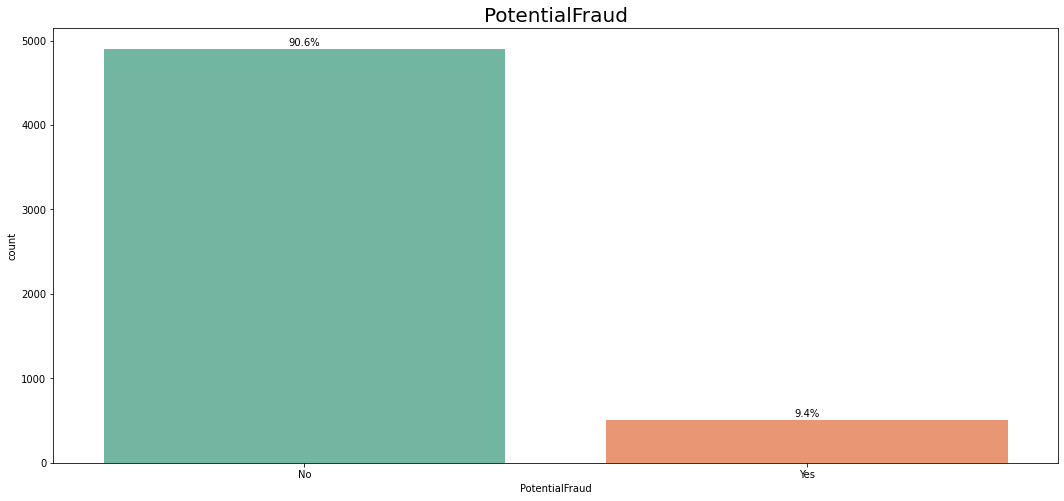

In [407]:
fig_countplot(Train, 'PotentialFraud', 1)

There is a highly imbalanced data on dataset where non-fraud providers are  90.6% more than those who are categorized as fraud as much as 9.4%. 

## Gender Distribution

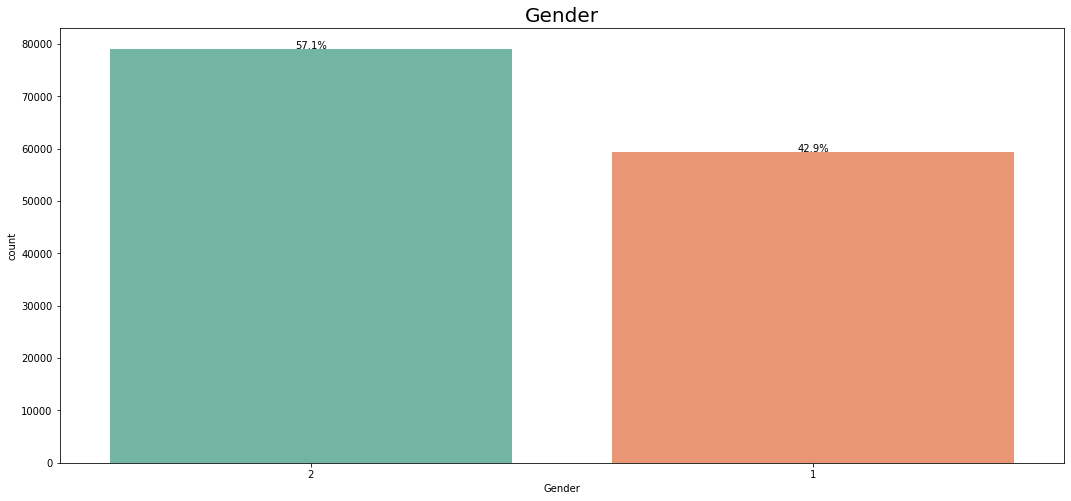

In [408]:
fig_countplot(Train_Beneficiary, 'Gender',1)

The ratio of genders is Gender_2 : Gender_1 = 57.9% : 42.1%.

## Mortality Status 

In this section we will search whether patient is atill alive or not? 

In [409]:
Train_Beneficiary['Dead_or_Alive'] = Train_Beneficiary['DOD'].apply(lambda val: 'No' if val != val else 'Yes')
Test_Beneficiary['Dead_or_Alive'] = Train_Beneficiary['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

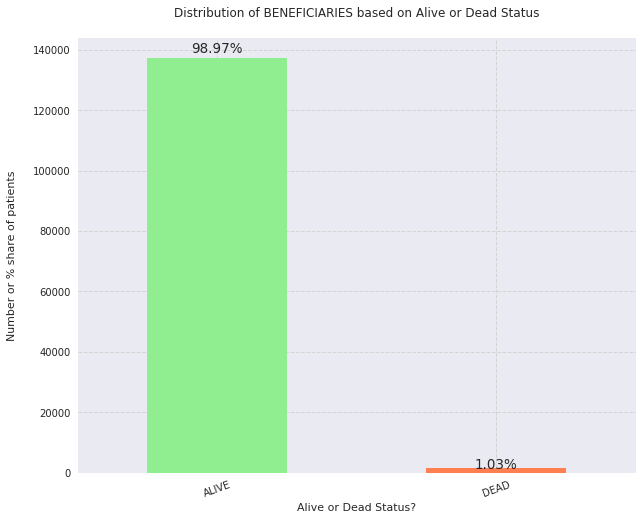

In [410]:
# Here, I'm displaying the distribution of whether BENEFICIARY is ALIVE or NOT?
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  fig = Train_Beneficiary['Dead_or_Alive'].value_counts().plot(kind='bar', color=['lightgreen','coral'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
  # Providing the labels and title to the graph
  plt.xlabel("Alive or Dead Status?")
  plt.xticks(labels=["ALIVE","DEAD"], ticks=[0,1], rotation=20)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES based on Alive or Dead Status\n")

The point of understanding this features is to find the relationship between a beneficiary and claim. in this dataset we can understand that beneficaries with DOD as NA are alive. 
- For example, A patient gets successfully operated for Cardiac Failure but couldnt't survived after the prosedure. The claims for this person should be dead or alive indicator as false whereas this person can get other claims such as death allowance. 

The other reason is that generally when an organized fraud happens then healthcare providers falsely diagnose, misdiagnose, or overdiagnose a disease, which can lead to harmful courses of medication, treatments, or prosedures being prescribed or performed. 

## Age Distribution

In [411]:
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'], format="%Y-%m-%d")
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'], format="%Y-%m-%d")

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'], format="%Y-%m-%d")
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'], format="%Y-%m-%d")

In [412]:
Train_Beneficiary['DOD'].fillna(value=Train_Beneficiary['DOD'].max(), inplace=True)

Test_Beneficiary['DOD'].fillna(value=Test_Beneficiary['DOD'].max(), inplace=True)

In [413]:
Train_Beneficiary['AGE'] = np.round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365.0,1)

Test_Beneficiary['AGE'] = np.round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB']).dt.days)/365.0,1)

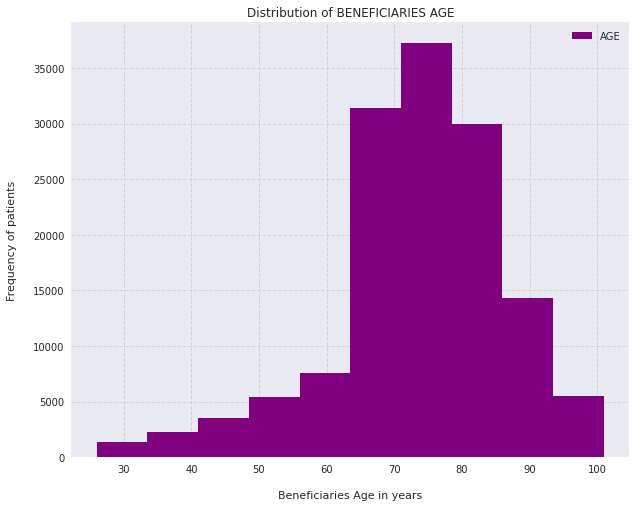

In [414]:
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  Train_Beneficiary['AGE'].plot(kind='hist', color='purple')
  # Providing the labels and title to the graph
  plt.xlabel("\nBeneficiaries Age in years")
  plt.ylabel("Frequency of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES AGE")
  plt.legend();

The above graph show that the majority of the beneficiaries are between 65 - 85 years old.

Reason :
    The main reason of elderly get sick is because of immune systems are weakene. This also goes straight with the purpose of insurance. Where a long term insurance is the main focus which can help to pay for nursing home stays, and other necessity that can become very expensive from time to time.

## Human Race Distribution

Race is a physical traits inherited from DNA, in the world population we devided race into 4 major races: 
- white/Caucasian
- Mongoloid/Asian
- Negroid/Black
- Australoid.

This is based on a racial classification made by Carleton S. Coon in 1962.

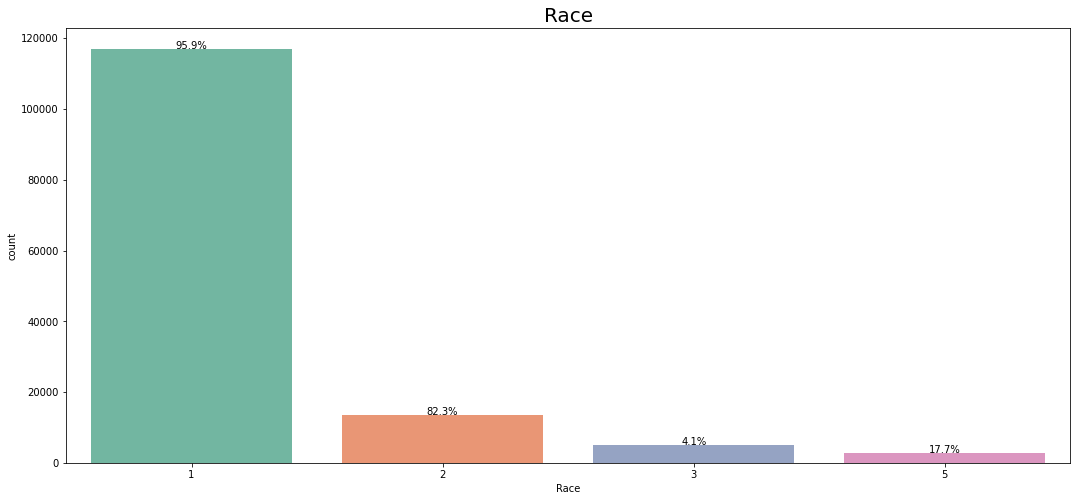

In [415]:
fig_countplot(Train_Beneficiary, 'Race',1)

The above graph show the most race population on dataset is Race_1, which also show as an imbalanced data on the record of the human race categories. 

## Renal Disease Indicator

Kedney deasease is the ninth leading cause of death in US as show in kidney disease statistics. The percentage of Renal disease among US adults aged 18 from 2015 - 2018 around 15% or 37 million people, estrimated to have renal disease. 

Source : https://www.cdc.gov/kidneydisease/publications-resources/ckd-national-facts.html

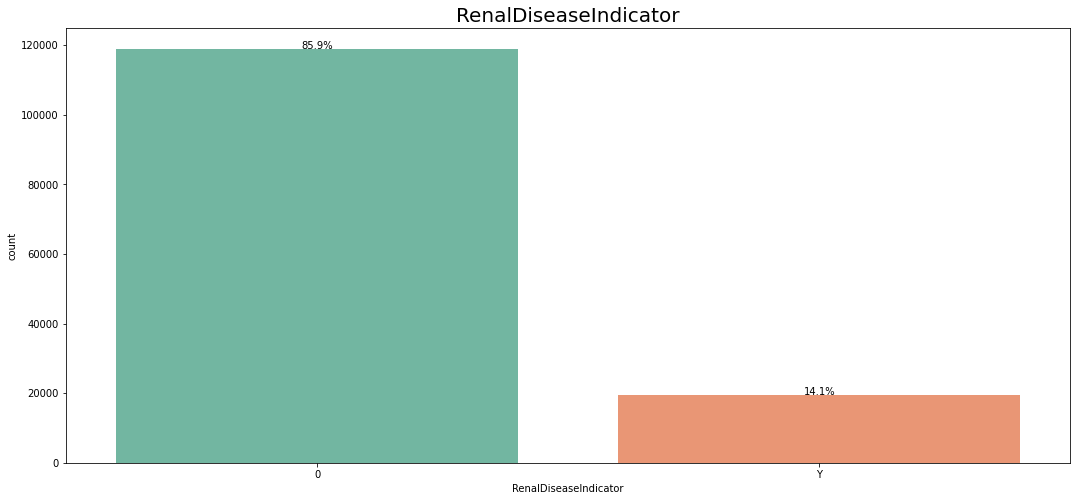

In [416]:
fig_countplot(Train_Beneficiary, 'RenalDiseaseIndicator',1)

The above graph show around 14 % of beneficiaries had chronic kedney disease. This diagnose can be use as a considerations of insurance claims.


In beneficary dataset, we have 2 coloumns :
- RenalDiseaseIndicator
- ChronicCond_KidneyDisease

This 2 features indicates of 2 mind kind of kedney disease
- short-term (acute kidney injury) 
- lifelong (chronic)

Where can be Distinguished by the characteristic one of them is from the length of time of occurrence of the disease generally if the disease occur >= 3 months it can be categorized as Chronic illness. 

Source : https://www.kidney.org/atoz/content/know-your-kidney-numbers-two-simple-tests 

## States Distribution 

In [417]:
Train_Beneficiary['State'].unique()

array([39, 52, 24, 23, 45, 15, 44, 41,  1, 14,  7, 13, 34, 31,  5, 49, 46,
        6, 38, 10, 26,  3, 20, 33, 18, 27, 51, 29, 42, 36, 11, 12, 30, 19,
        4, 25, 17, 16, 32,  2, 21, 50, 22, 54, 28, 43, 35, 37, 47,  8,  9,
       53])

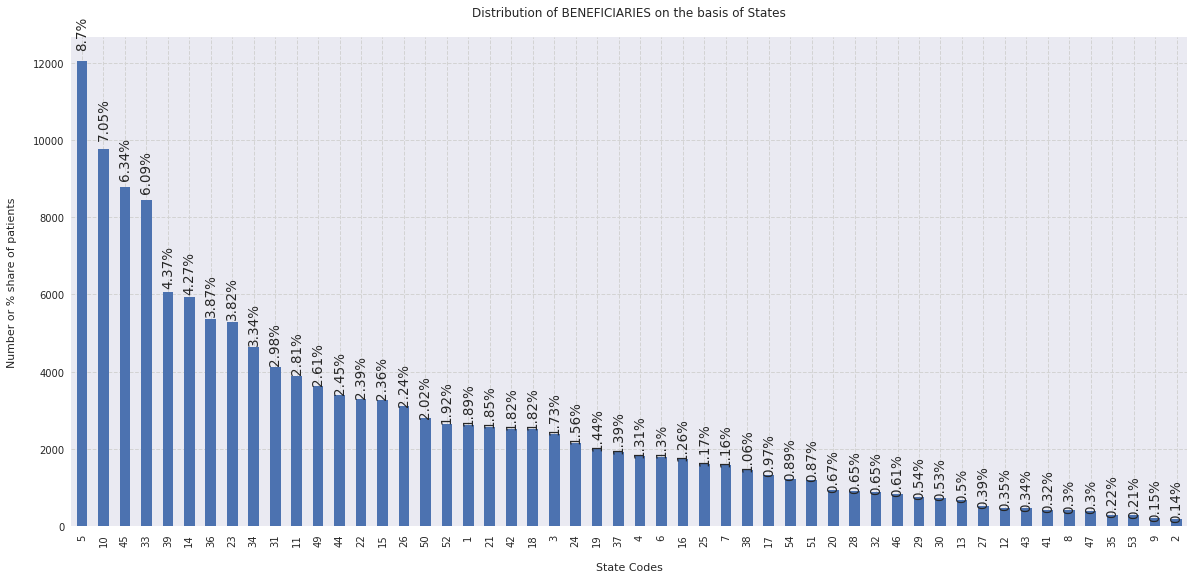

In [418]:
with plt.style.context('seaborn'):
  plt.figure(figsize=(20,9))
  fig = Train_Beneficiary['State'].value_counts().plot(kind='bar')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=13.5, rotation=90)
  # Providing the labels and title to the graph
  plt.xlabel("\nState Codes")
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of States\n")

The above graph show the maximum number of beneficiaries are from state-5 and the lowest are from state-2.

## Country Distribution

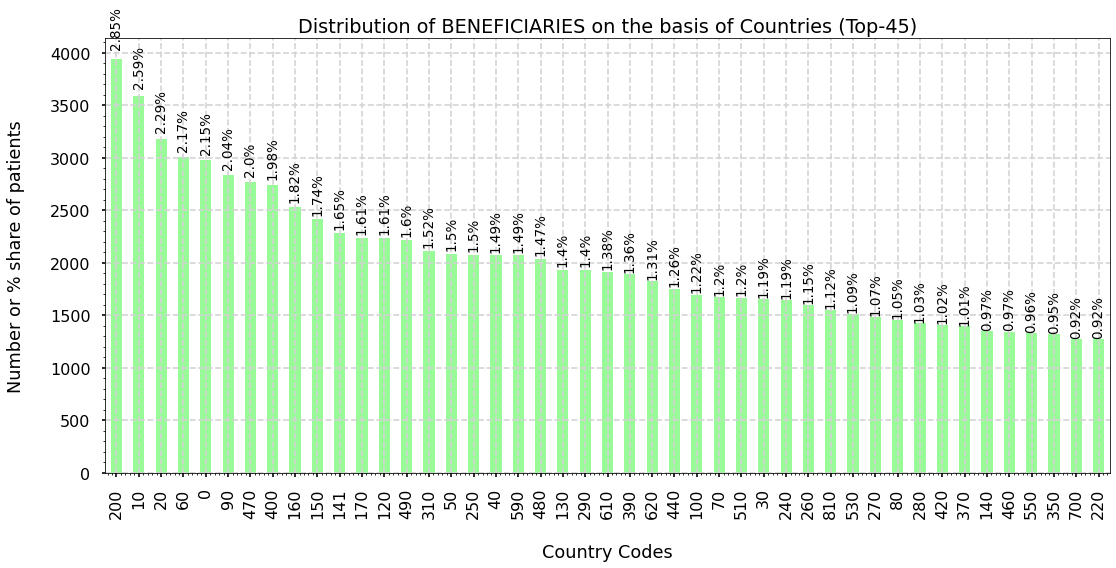

In [419]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(18,8))
  fig = Train_Beneficiary['County'].value_counts()[0:45].plot(kind='bar', color='palegreen')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=13.5, rotation=90)
  # Providing the labels and title to the graph
  plt.xlabel("\nCountry Codes")
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of Countries (Top-45)")

The above graph show the top 45 country on dataset based upon on country codes. The highst number is on country code - 200 and the least is on country code 220. 

The main evaluation on this feature is to find which country with the highst number of fraud. 

## Part A Coverage Distribution

Part A coverage is a covers for inpatient stays, providing invalueable assitance with potentially crippling bills on age 65 and older and people who have paid for at least 10 years. 

This features will explain the number of coverage per month.

Source : https://www.gohealth.com/medicare/medicare-part-a/coverage/ 

In [420]:
Train_Beneficiary['NoOfMonths_PartACov'].unique()

array([12,  0,  3,  7, 10, 11,  8,  4,  1,  6,  2,  9,  5])

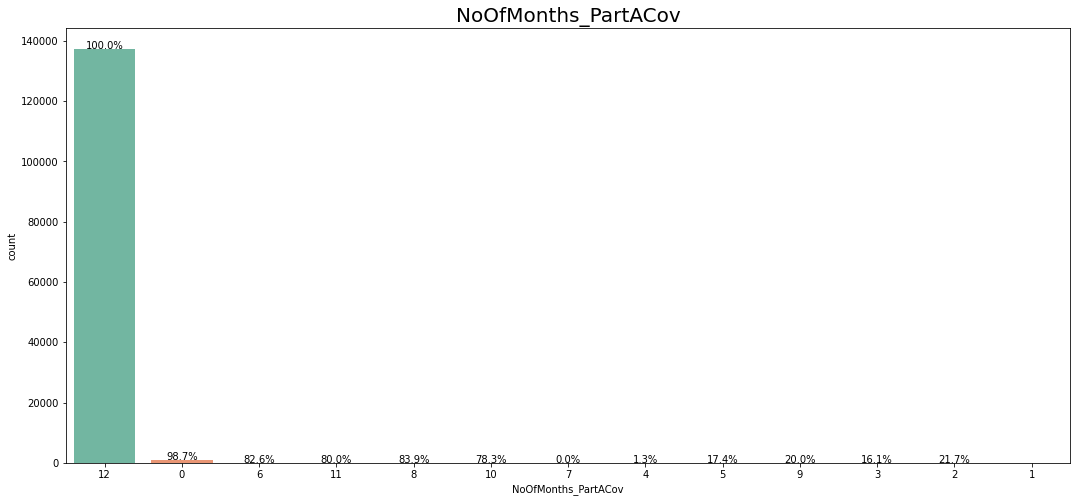

In [421]:
fig_countplot(Train_Beneficiary, 'NoOfMonths_PartACov',1)

The above graph show that 100% of beneficiaries have 12 months Part-A Coverage.

## Part B Coverage Distribution

Part B coverage is a federal health insurance programfor those who is 65 or more, to use to cover carious outpatient services. The claims will cover more around 67% of outpatient payments. 

Source : https://www.healthline.com/health/medicare/medicare-part-b#part-b-coverage

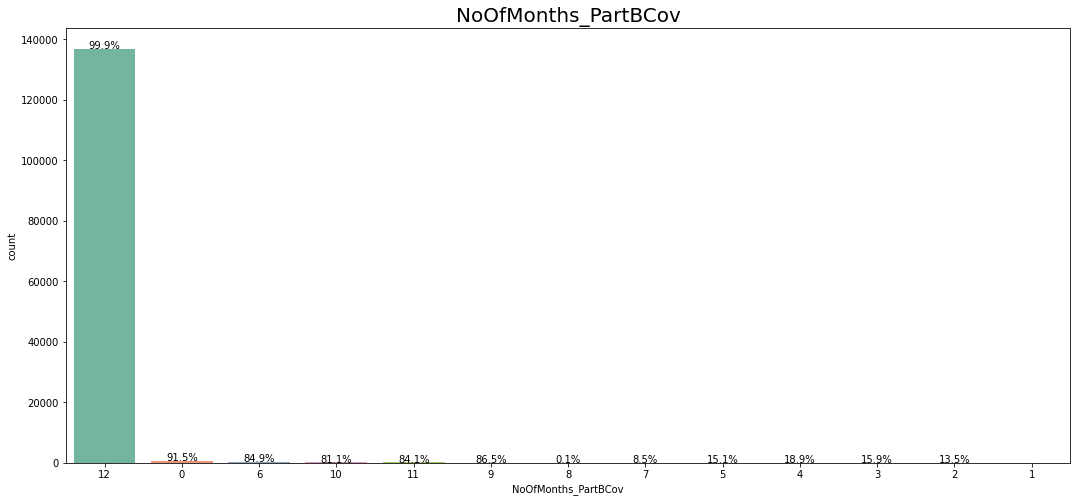

In [422]:
fig_countplot(Train_Beneficiary, 'NoOfMonths_PartBCov',1)

The above graph show that 99.9% of beneficiaries have 12 months Part-B Coverage.

## Chronic Condition

### Patient with Alzeimer Diagnose 

   ChronicCond_Alzheimer
2                  92530
1                  46026 



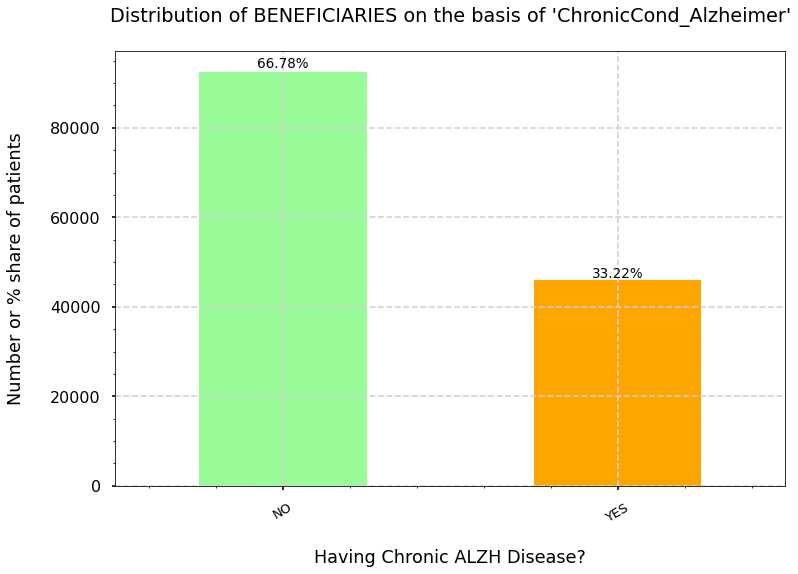

In [423]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_Alzheimer'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xlabel("\nHaving Chronic ALZH Disease?")
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_Alzheimer'\n")

# 1 means +ve with Chronic ALZH Disease
# 2 means -ve with Chronic ALZH Disease
print(pd.DataFrame(Train_Beneficiary['ChronicCond_Alzheimer'].value_counts()),"\n")

The above graph show that 33.2% of beneficiaries had diagnosed with Chronic Alzeimer 

#### How much expenditure on patients with alzeimer? 

In [424]:
alz = ['OPAnnualReimbursementAmt','IPAnnualReimbursementAmt']
alz_d = ['OPAnnualDeductibleAmt','IPAnnualDeductibleAmt']

###### Annual Reimburssement

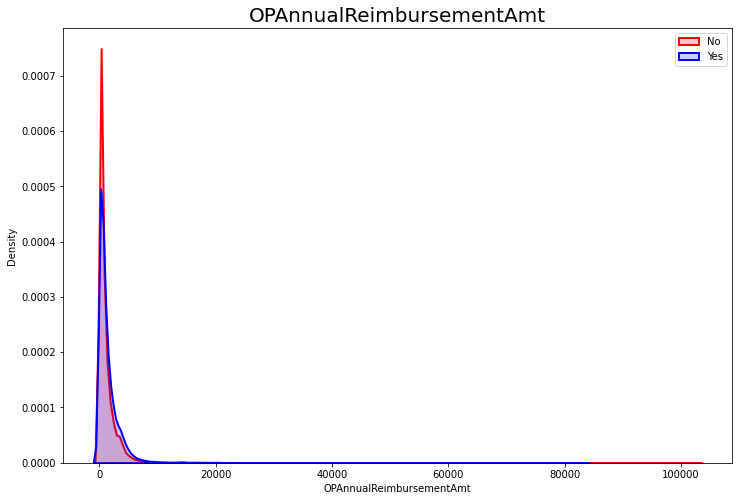

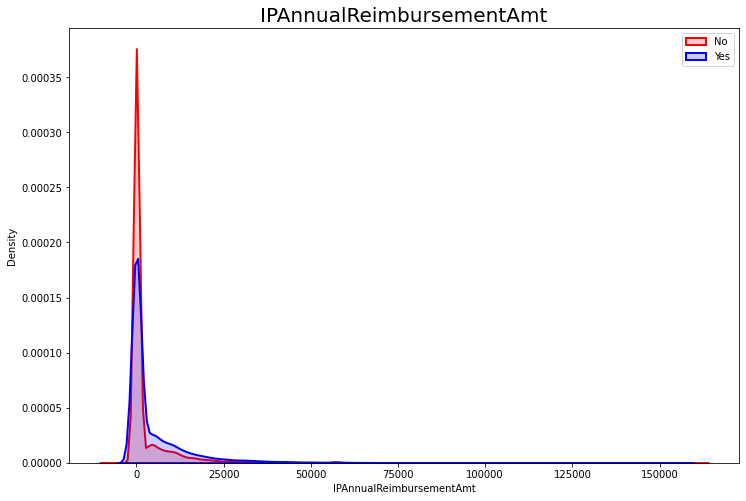

                       IPAnnualReimbursementAmt
ChronicCond_Alzheimer                          
1                                     247213280
2                                     259949690 

                       OPAnnualReimbursementAmt
ChronicCond_Alzheimer                          
1                                      74721530
2                                     105154550 



In [425]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Alzheimer'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Alzheimer'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show :
- The highest number of patients is from outpatients with significant differences. Looking at the state of Alzeimer patients who do not always need intrensive care but rather regular ongoing care. 
- The patient with alzeimer disease get admitted the annual reimbutsement paid where the reimbursement given is around 25 million and although the number of patients is more in outpatients but the largest expenditure remains on patients with hospitalization considering equipment usage and other maintenance needs. 
- There is no significat amount of reimbursement from patient with or without alzeimer in OP nor IP 



###### Co Paid by Patient

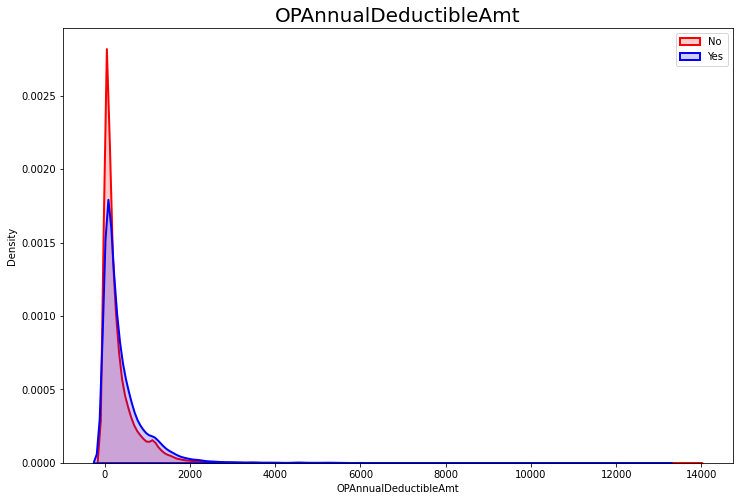

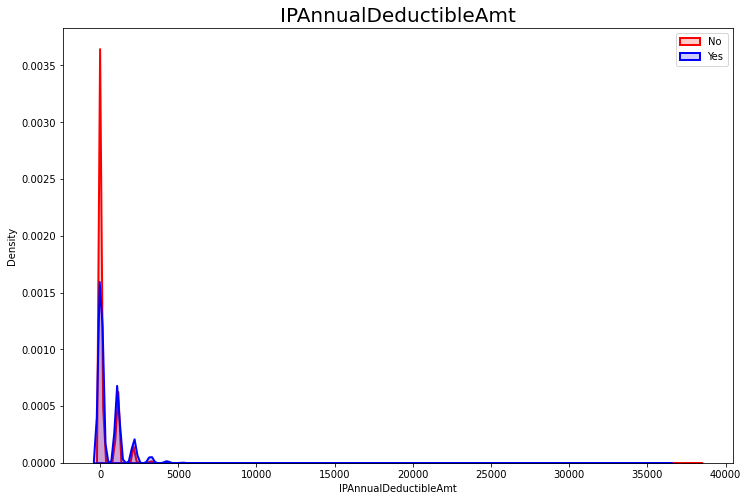

                       OPAnnualDeductibleAmt
ChronicCond_Alzheimer                       
1                                   21502981
2                                   30832150 

                       IPAnnualDeductibleAmt
ChronicCond_Alzheimer                       
1                                   28200854
2                                   27200388 



In [426]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Alzheimer'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Alzheimer'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show :
- The most Alzeimer patients are still the outpatients. 
- Where the Co payment pay by patient mostly paid under 5 million, still lower than the annuall reimbursement. 

##### Average Expendeture on patient with alzeimer

In [427]:
CC_ALZH_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_OP_D.columns = ['AVG OP Co-payment Amt']
CC_ALZH_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_IP_D.columns = ['AVG IP Co-payment Amt']
CC_ALZH_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_ALZH_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Alzheimer'])['BeneID'].count())
CC_ALZH_IP_R.columns = ['AVG IP Reimbursement Amt']

In [428]:
CC_ALZH_all_amts = pd.concat([CC_ALZH_IP_R, CC_ALZH_OP_R, CC_ALZH_IP_D, CC_ALZH_OP_D], axis=1)
CC_ALZH_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Alzheimer                                                       
1                                   5371.165863               1623.463477   
2                                   2809.355777               1136.437372   

                       AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Alzheimer                                                
1                                 612.715726             467.192044  
2                                 293.962909             333.212472

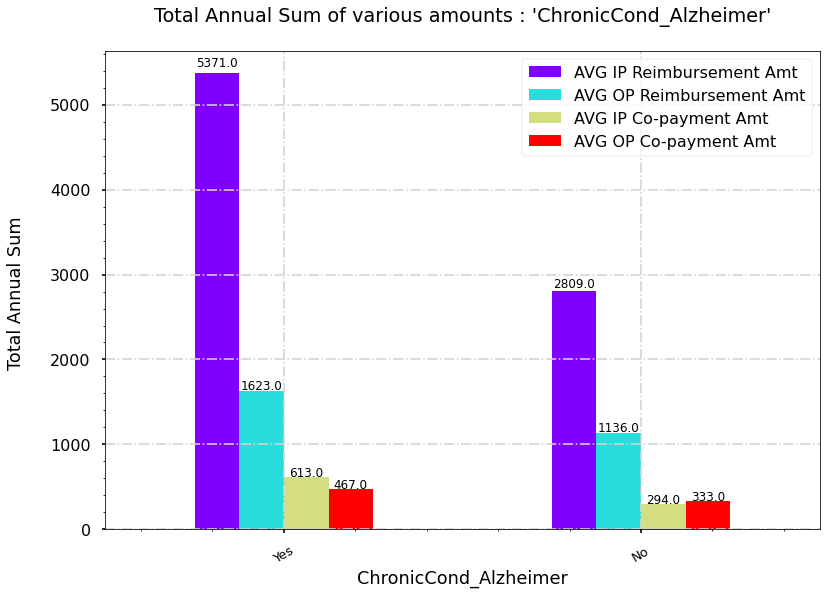

In [429]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_ALZH_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Alzheimer'\n")

The Graph Above show :
- As we can predict the most expendeture is on inpatient reimbursement
- Patient with Chronic alzeimer get 50% reinmbursement more than other patient without the diagnosis 
- But there is not so much difference in other comparations 

### Patient with Hearh Failure

   ChronicCond_Heartfailure
2                     70154
1                     68402 



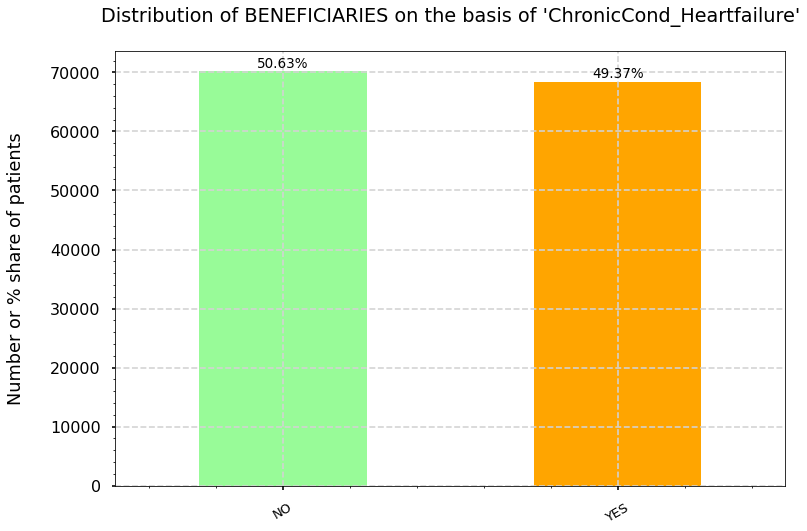

In [430]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_Heartfailure'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_Heartfailure'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_Heartfailure'].value_counts()),"\n")

The beneficaries with chronic HF are almost equal to the patient without HF disease. 

##### How much expendeture on patient with Heart Failure? 

###### Annual Reimbursement

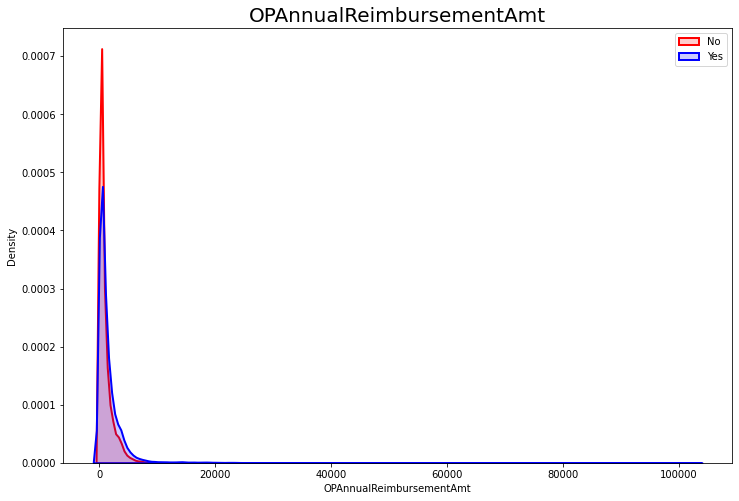

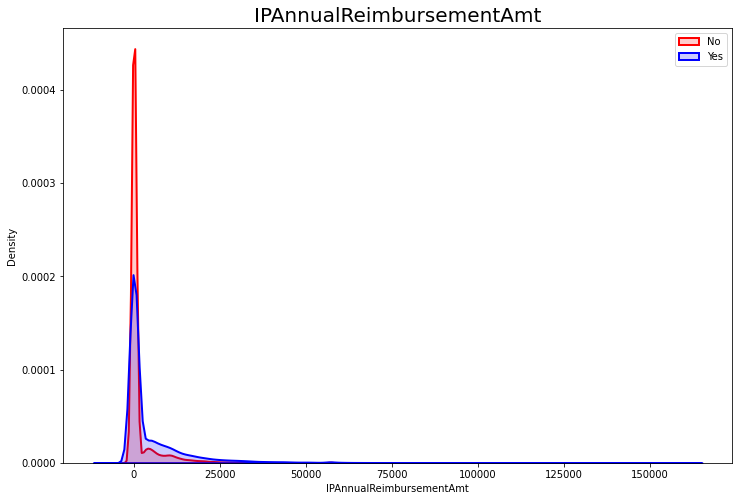

                          IPAnnualReimbursementAmt
ChronicCond_Heartfailure                          
1                                        370856140
2                                        136306830 

                          OPAnnualReimbursementAmt
ChronicCond_Heartfailure                          
1                                        114280500
2                                         65595580 



In [431]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Heartfailure'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Heartfailure'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show : 
- The highest number of patients is from outpatients 
- The reimbursement of inpantient with HF is quite significat around 37 million compared with reimbursement in patient without HF it's almost a half amount, which can potentially a fraud. 
- As well as the reimbursement of outpatient with HF show almost a half of it, this again can potential sign of fraud. 


###### Co Paid by Patient

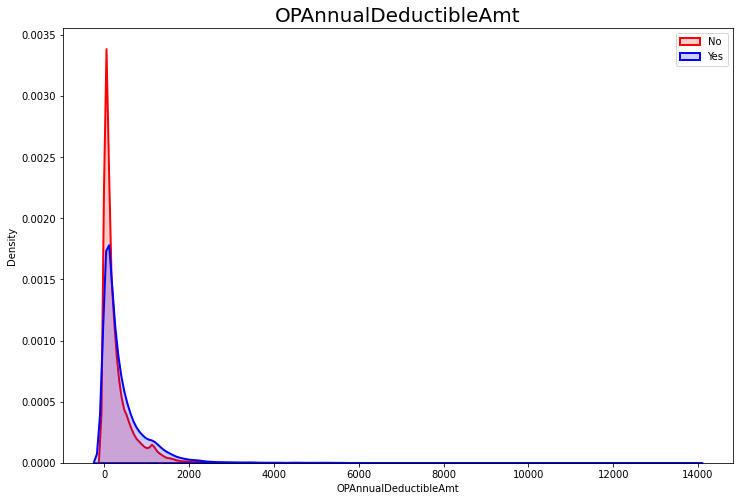

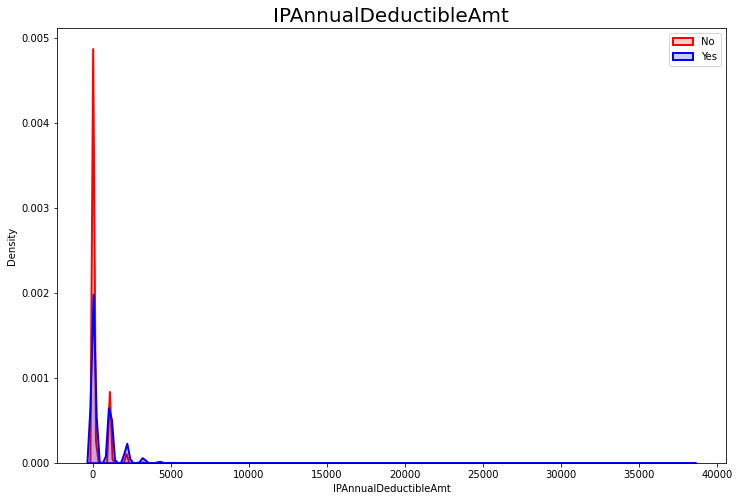

                          OPAnnualDeductibleAmt
ChronicCond_Heartfailure                       
1                                      32649838
2                                      19685293 

                          IPAnnualDeductibleAmt
ChronicCond_Heartfailure                       
1                                      40303650
2                                      15097592 



In [432]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Heartfailure'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Heartfailure'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show : 
- The highest number of patients is from outpatients 
- The reimbursement of outpatient with HF is quite significat around 32 million compared with reimbursement in patient without HF it's almost a half amount, which also can potentially fraud. 
- As well as the reimbursement of inpatient with HF show almost a half of it, this again can potential sign of fraud. 

###### Average Expendeture on patient with Heart Failure

In [433]:
CC_HF_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_OP_D.columns = ['AVG OP Co-payment Amt']
CC_HF_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_IP_D.columns = ['AVG IP Co-payment Amt']
CC_HF_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_HF_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Heartfailure'])['BeneID'].count())
CC_HF_IP_R.columns = ['AVG IP Reimbursement Amt']

In [434]:
CC_HF_all_amts = pd.concat([CC_HF_IP_R, CC_HF_OP_R, CC_HF_IP_D, CC_HF_OP_D], axis=1)
CC_HF_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Heartfailure                                                       
1                                      5421.714862               1670.718692   
2                                      1942.965904                935.022664   

                          AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Heartfailure                                                
1                                    589.217421             477.322856  
2                                    215.206432             280.601149

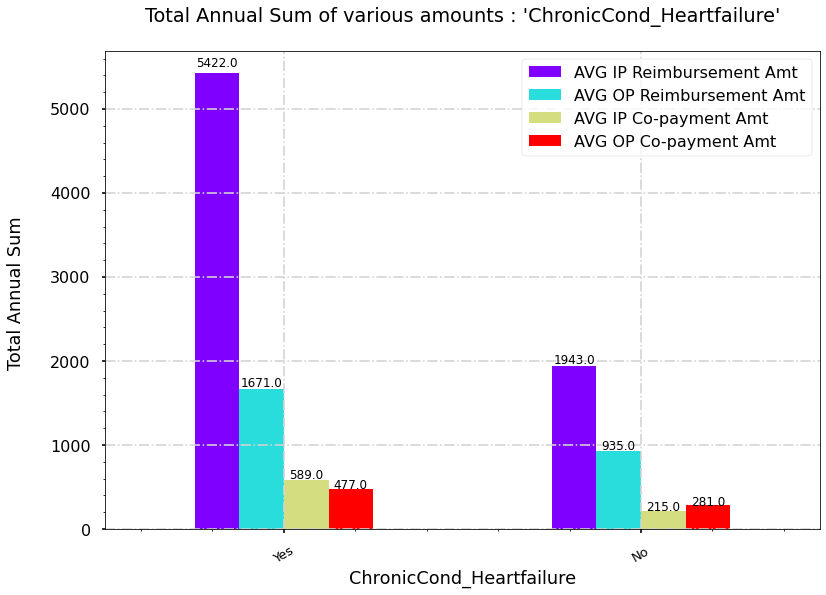

In [435]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_HF_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Heartfailure'\n")

Above Graph show :
There is a significant difference between inpatient reimbursement and the other which almost 50% diference, which can potentially fraud. 

### Patient with Pulmonary obstruction

   ChronicCond_ObstrPulmonary
2                      105697
1                       32859 



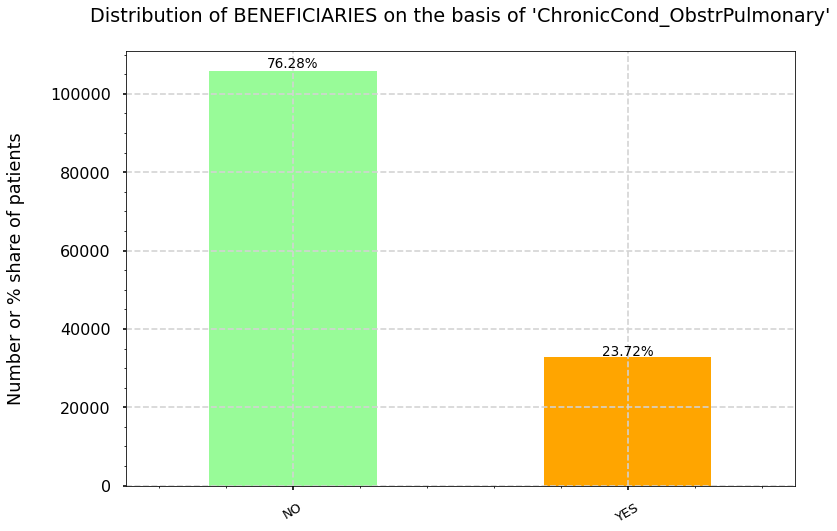

In [436]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_ObstrPulmonary'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_ObstrPulmonary'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_ObstrPulmonary'].value_counts()),"\n")

The above graph show that 23.4% of beneficiaries had diagnosed with Chronic Pulmonary Obstruction

##### How much expenditure on patient with Pulmonary Obstruction? 

###### Annual Reimburssement

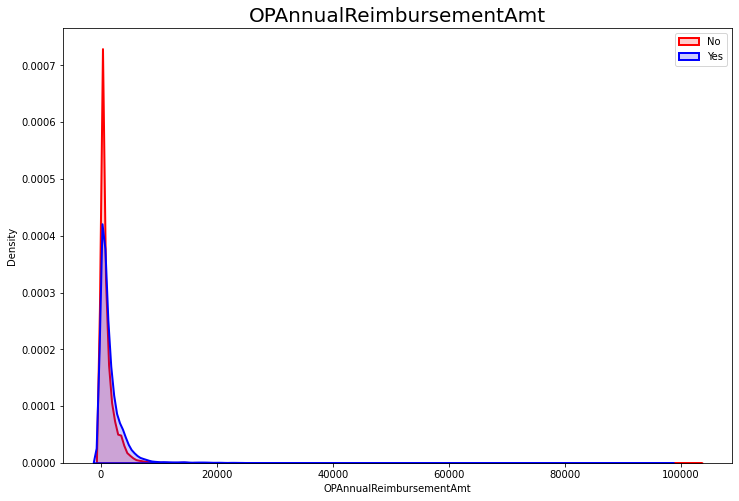

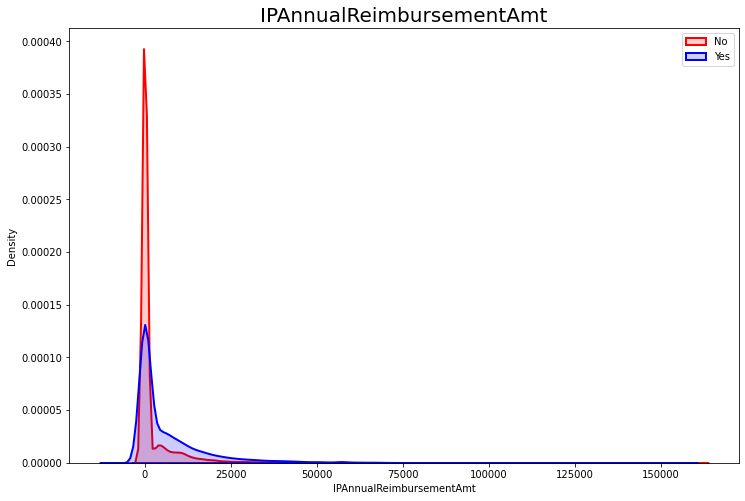

                            IPAnnualReimbursementAmt
ChronicCond_ObstrPulmonary                          
1                                          241900480
2                                          265262490 

                            OPAnnualReimbursementAmt
ChronicCond_ObstrPulmonary                          
1                                           59503210
2                                          120372870 



In [437]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_ObstrPulmonary'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_ObstrPulmonary'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show that :
- The highest number of patients is from outpatients. 
- The patient with OP disease get admitted the annual reimbutsement paid where the reimbursement given is around 24-26 million.
- There is a significat amount of reimbursement on outpatient without PO diagnose more than 40% where can indicate fraud. 

###### Co Paid by Patient

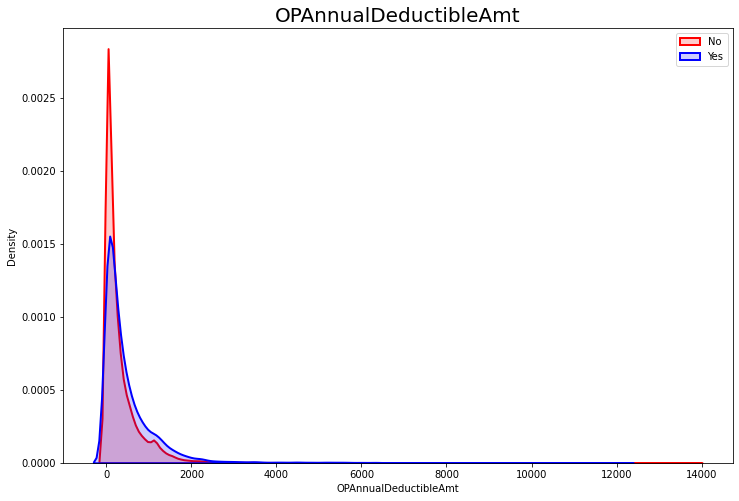

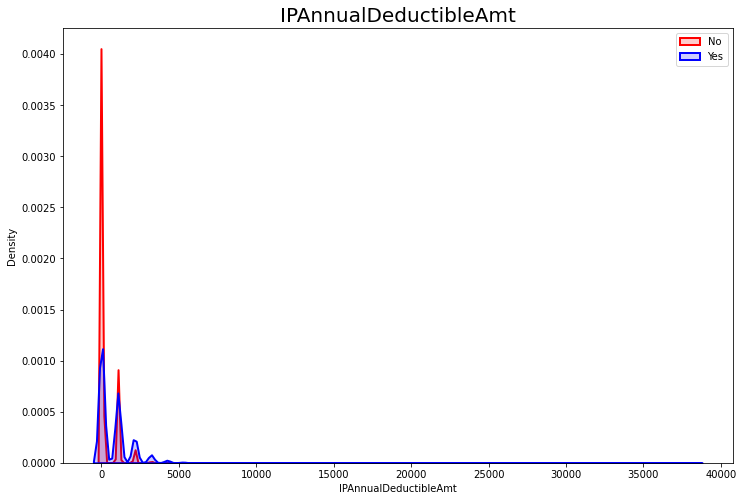

                            OPAnnualDeductibleAmt
ChronicCond_ObstrPulmonary                       
1                                        17068531
2                                        35266600 

                            IPAnnualDeductibleAmt
ChronicCond_ObstrPulmonary                       
1                                        26886184
2                                        28515058 



In [438]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_ObstrPulmonary'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_ObstrPulmonary'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show that :

- The highest number of patients is from outpatients.
- There is a significat amount of reimbursement on outpatient without PO diagnose more than 40% where can indicate fraud.

In [439]:
CC_OP_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['BeneID'].count())
CC_OP_OP_D.columns = ['AVG OP Co-payment Amt']
CC_OP_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['BeneID'].count())
CC_OP_IP_D.columns = ['AVG IP Co-payment Amt']
CC_OP_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['BeneID'].count())
CC_OP_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_OP_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_ObstrPulmonary'])['BeneID'].count())
CC_OP_IP_R.columns = ['AVG IP Reimbursement Amt']

In [440]:
CC_OP_all_amts = pd.concat([CC_OP_IP_R, CC_OP_OP_R, CC_OP_IP_D, CC_OP_OP_D], axis=1)
CC_OP_all_amts

AVG IP Reimbursement Amt  \
ChronicCond_ObstrPulmonary                             
1                                        7361.772422   
2                                        2509.650132   

                            AVG OP Reimbursement Amt  AVG IP Co-payment Amt  \
ChronicCond_ObstrPulmonary                                                    
1                                        1810.864908             818.228917   
2                                        1138.848501             269.781148   

                            AVG OP Co-payment Amt  
ChronicCond_ObstrPulmonary                         
1                                       519.44767  
2                                       333.65753

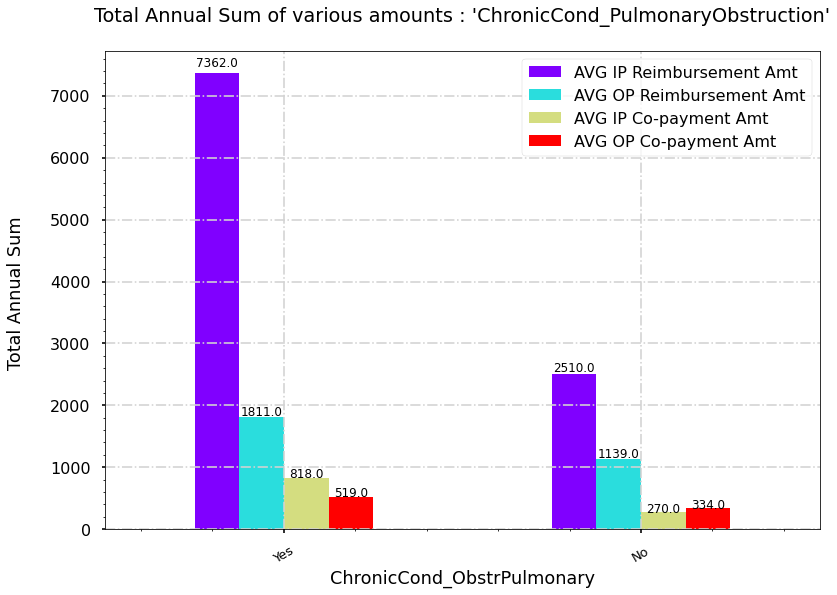

In [441]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_OP_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_PulmonaryObstruction'\n")

Above Graph show :
There is a significant difference between inpatient reimbursement and the other which almost 50% diference, which can be a potential fraud. 

### Patient with Kidney Disease

   ChronicCond_KidneyDisease
2                      95277
1                      43279 



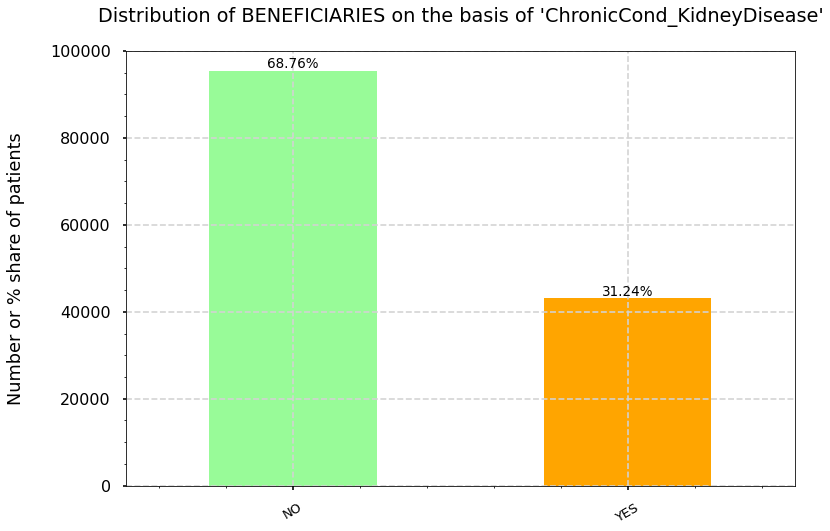

In [442]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_KidneyDisease'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_KidneyDisease'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_KidneyDisease'].value_counts()),"\n")

The above graph show that 31,2% of beneficiaries had diagnosed with Chronic Kidney Disease

##### How much expenditure on patient with Kidney Disease? 

###### Annual Reimburssement

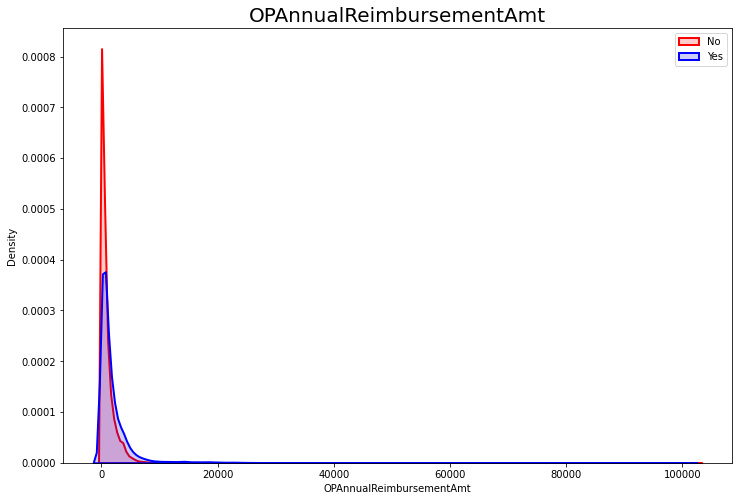

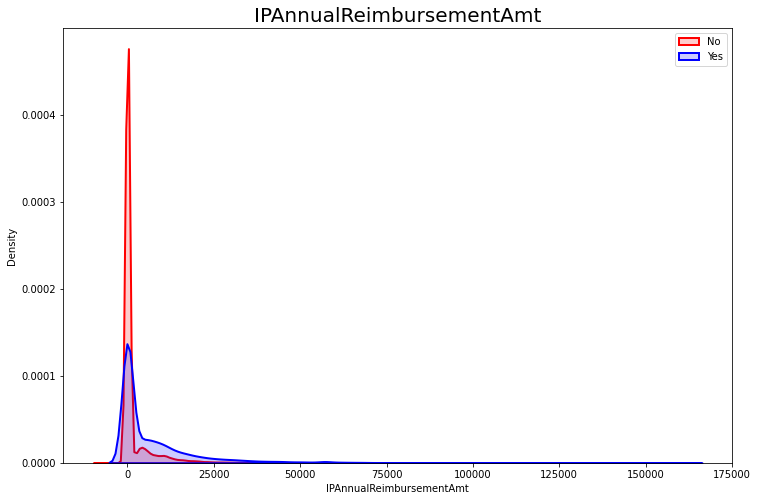

                           IPAnnualReimbursementAmt
ChronicCond_KidneyDisease                          
1                                         324625740
2                                         182537230 

                           OPAnnualReimbursementAmt
ChronicCond_KidneyDisease                          
1                                          89224100
2                                          90651980 



In [443]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_KidneyDisease'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_KidneyDisease'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show that :
- The highest number of patients is from outpatients. 
- The inpatient with CKD disease get admitted the annual reimbutsement paid where the reimbursement given is around 32 - 18 million which quite significant.
- There is no significat amount on other. 

###### Co Paid by Patient

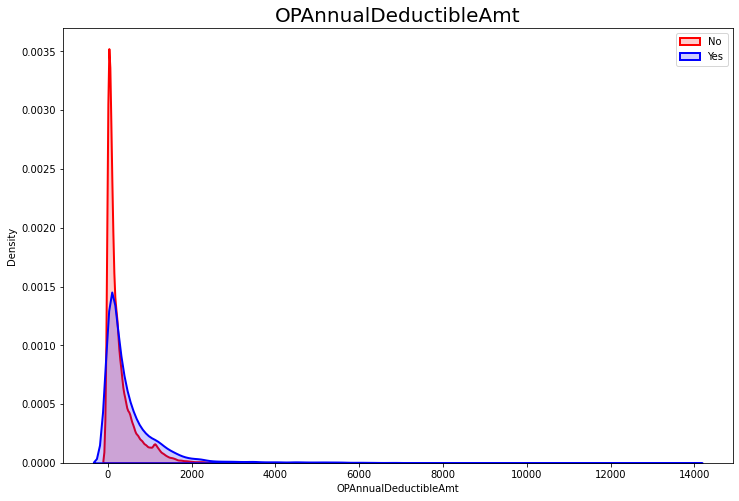

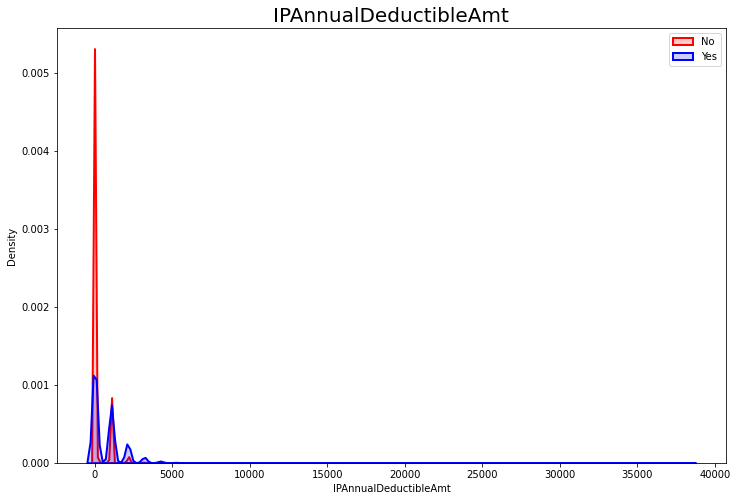

                           OPAnnualDeductibleAmt
ChronicCond_KidneyDisease                       
1                                       25218951
2                                       27116180 

                           IPAnnualDeductibleAmt
ChronicCond_KidneyDisease                       
1                                       33990708
2                                       21410534 



In [444]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_KidneyDisease'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_KidneyDisease'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show that :

- The highest number of patients is from outpatients.
- There is not so much difference in other comparations 

###### Average Expendeture on patient with Kidney Disease

In [445]:
CC_CKD_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['BeneID'].count())
CC_CKD_OP_D.columns = ['AVG OP Co-payment Amt']
CC_CKD_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['BeneID'].count())
CC_CKD_IP_D.columns = ['AVG IP Co-payment Amt']
CC_CKD_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['BeneID'].count())
CC_CKD_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_CKD_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_KidneyDisease'])['BeneID'].count())
CC_CKD_IP_R.columns = ['AVG IP Reimbursement Amt']

In [446]:
CC_CKD_all_amts = pd.concat([CC_CKD_IP_R, CC_CKD_OP_R, CC_CKD_IP_D, CC_CKD_OP_D], axis=1)
CC_CKD_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_KidneyDisease                                                       
1                                       7500.768040               2061.602625   
2                                       1915.858287                951.457120   

                           AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_KidneyDisease                                                
1                                     785.385707             582.706417  
2                                     224.718809             284.603629

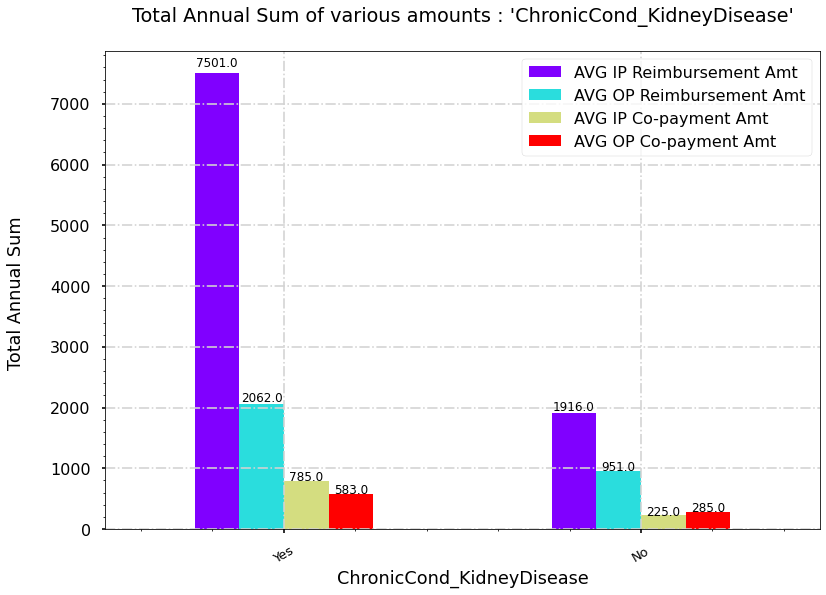

In [447]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_CKD_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_KidneyDisease'\n")

Above Graph show :
There is a significant difference between inpatient reimbursement and the other which more than 50% diference, where more reimbursement in patients without OP.

### Patient with Cancer

   ChronicCond_Cancer
2              121935
1               16621 



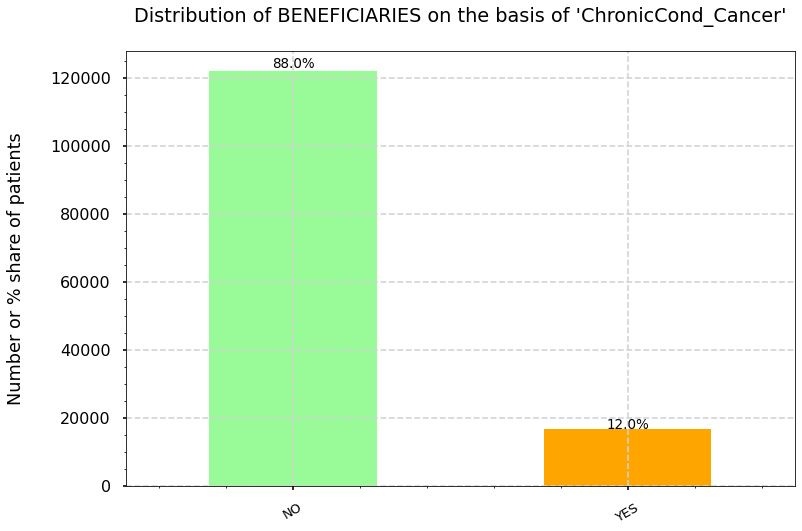

In [448]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_Cancer'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_Cancer'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_Cancer'].value_counts()),"\n")

The above graph show that, there is a small amount of patient diagnose with cancer as much as 12%. 

##### How much expenditure on patient with Cancer? 

###### Annual Reimburssement

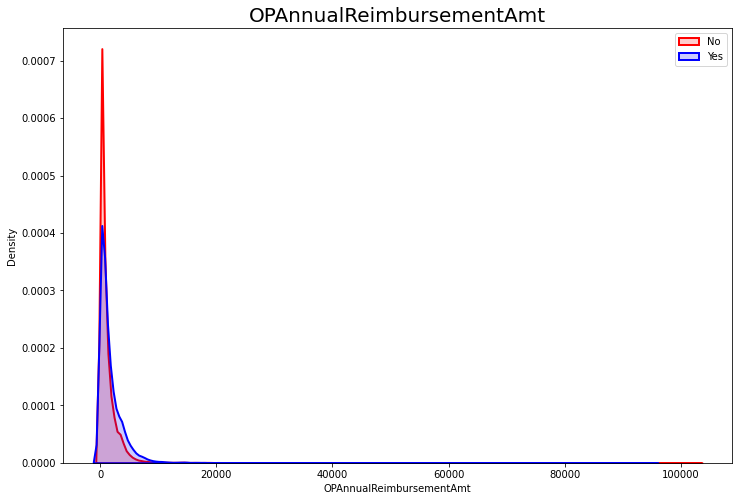

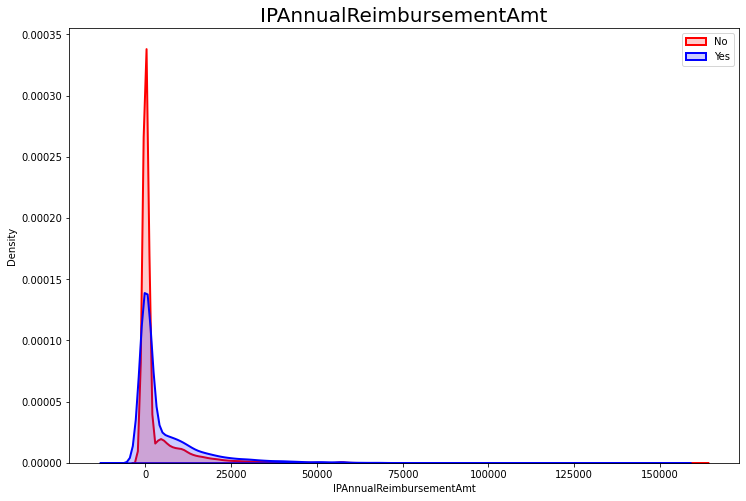

                    IPAnnualReimbursementAmt
ChronicCond_Cancer                          
1                                  100848450
2                                  406314520 

                    OPAnnualReimbursementAmt
ChronicCond_Cancer                          
1                                   29725450
2                                  150150630 



In [449]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Cancer'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Cancer'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Cancer'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Cancer'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show that :
- The highest number of patients is from inpatient. 
- The inpatient with cancer get admitted the annual reimbutsement paid where the reimbursement given is around 10 - 40 million which quite significant.
- As well as the outpatint around 29 - 159 million which also significant. 
- This can be a potential fraud, but we will search about the reason behind it more, this can be cause by the hospitalize, or drug price or other.  

###### Co Paid by Patient

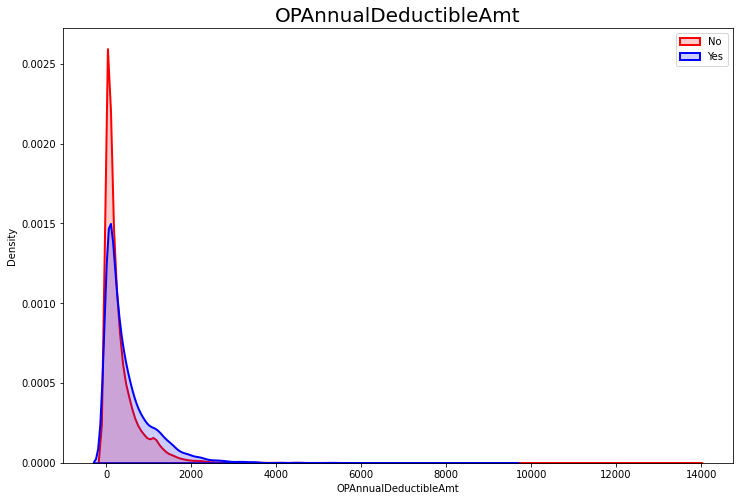

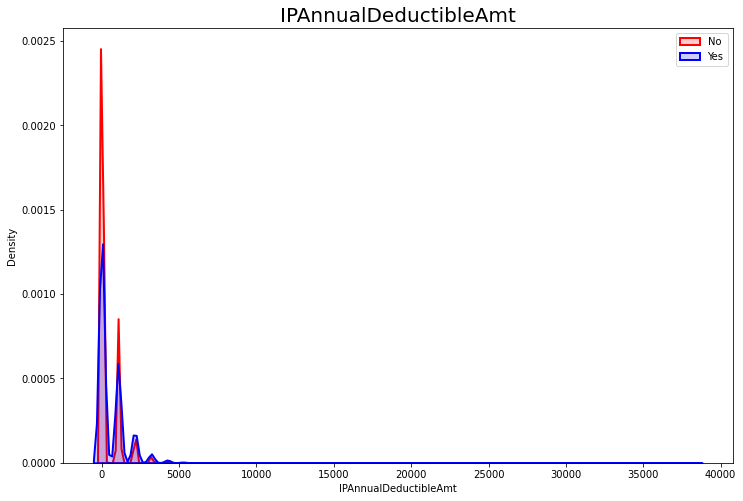

                    OPAnnualDeductibleAmt
ChronicCond_Cancer                       
1                                 8656760
2                                43678371 

                    IPAnnualDeductibleAmt
ChronicCond_Cancer                       
1                                10576604
2                                44824638 



In [450]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Cancer'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Cancer'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Cancer'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Cancer'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show that :

- The highest number of patients is from inpatinet.
- There is also a quite significant amount of annual deduction that can be potentially fraud. 

###### Average Expendeture on patient with Cancer

In [451]:
CC_C_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Cancer'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_C_OP_D.columns = ['AVG OP Co-payment Amt']
CC_C_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Cancer'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_C_IP_D.columns = ['AVG IP Co-payment Amt']
CC_C_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Cancer'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_C_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_C_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Cancer'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_C_IP_R.columns = ['AVG IP Reimbursement Amt']

In [452]:
CC_C_all_amts = pd.concat([CC_C_IP_R, CC_C_OP_R, CC_C_IP_D, CC_C_OP_D], axis=1)
CC_C_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Cancer                                                       
1                                6067.532038               1788.427291   
2                                3332.222250               1231.398942   

                    AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Cancer                                                
1                              636.339811             520.832682  
2                              367.610924             358.210284

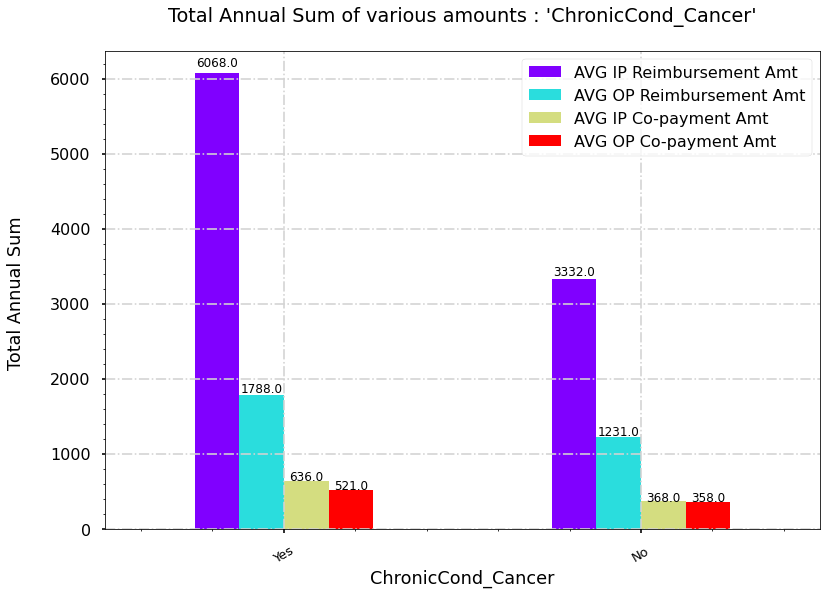

In [453]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_C_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Cancer'\n")

Above Graph show :
There is a significant difference between inpatient reimbursement and the other which more than 50% diference.

### Patient with Depression

   ChronicCond_Depression
2                   89296
1                   49260 



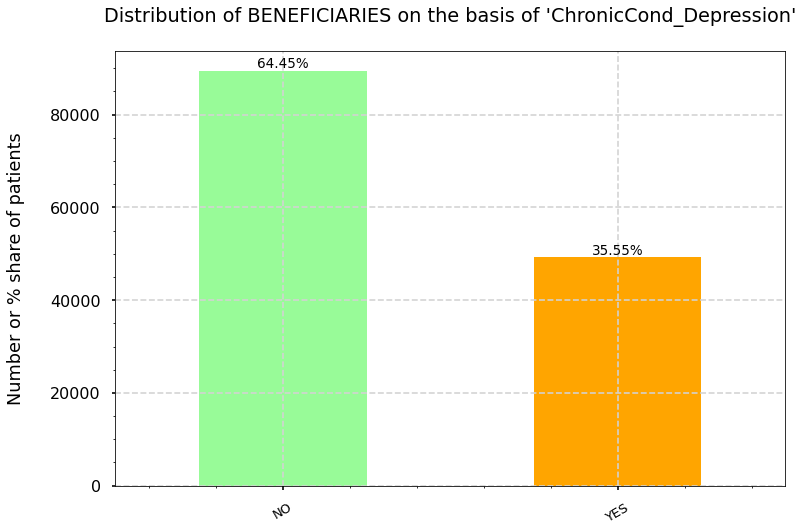

In [454]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_Depression'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_Depression'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_Depression'].value_counts()),"\n")

The above graph show that, there is a 35.5% patient diagnose with depression.

##### How much expenditure on patient with Depression? 

###### Annual Reimburssement

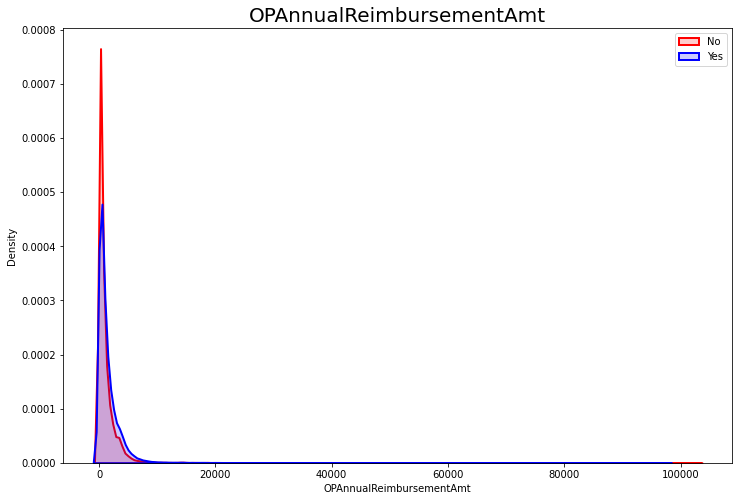

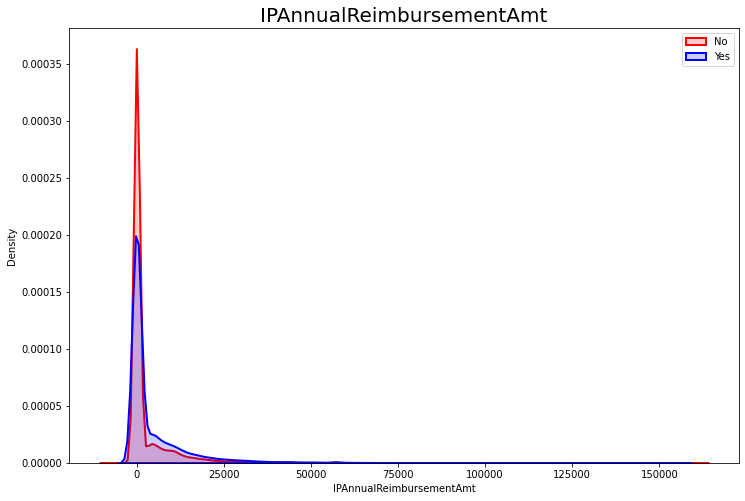

                        IPAnnualReimbursementAmt
ChronicCond_Depression                          
1                                      247391740
2                                      259771230 

                        OPAnnualReimbursementAmt
ChronicCond_Depression                          
1                                       79006720
2                                      100869360 



In [455]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Depression'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Depression'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Depression'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Depression'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show that :
- The highest number of patients is from inpatient. 
- The inpatient with cancer get admitted the annual reimbutsement paid where the reimbursement given is around 10 - 40 million which quite significant.
- As well as the outpatint around 29 - 159 million which also significant. 
- This can be a potential fraud, but we will search about the reason behind it more, this can be cause by the hospitalize, or drug price or other.  

###### Co Paid by Patient

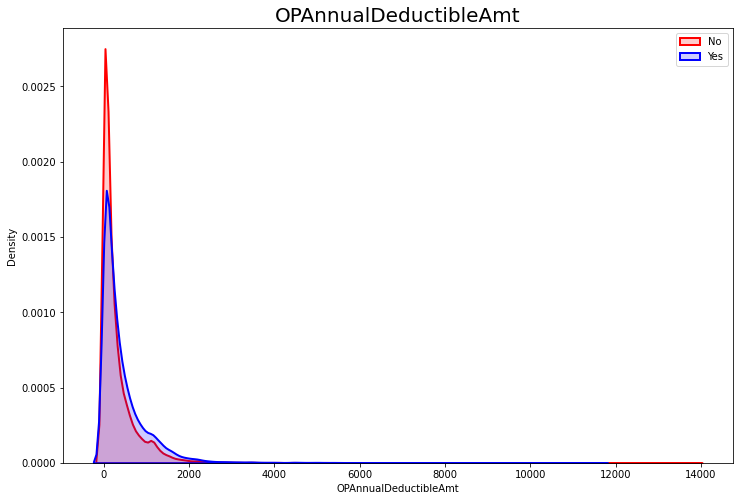

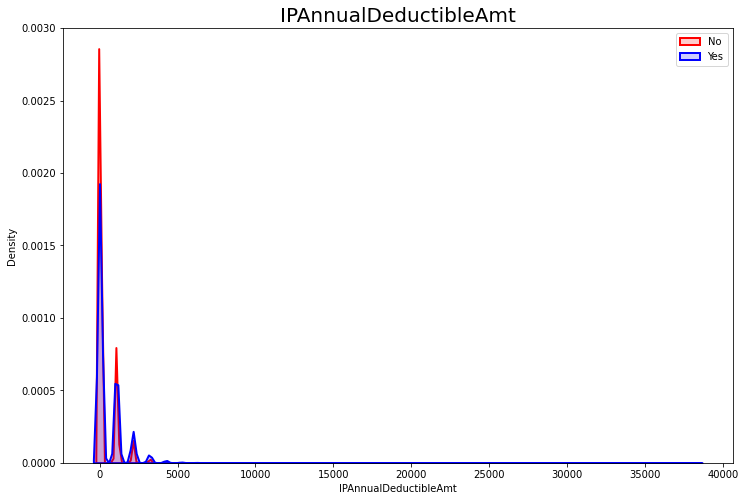

                        OPAnnualDeductibleAmt
ChronicCond_Depression                       
1                                    22870714
2                                    29464417 

                        IPAnnualDeductibleAmt
ChronicCond_Depression                       
1                                    28080898
2                                    27320344 



In [456]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Depression'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Depression'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Depression'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Depression'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show that :

- The highest number of patients is from inpatinet.
- There is also a quite significant amount of annual deduction that can be potentially fraud. 

###### Average Expendeture on patient with Depression

In [457]:
CC_D_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Depression'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Depression'])['BeneID'].count())
CC_D_OP_D.columns = ['AVG OP Co-payment Amt']
CC_D_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Depression'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Depression'])['BeneID'].count())
CC_D_IP_D.columns = ['AVG IP Co-payment Amt']
CC_D_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Depression'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Depression'])['BeneID'].count())
CC_D_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_D_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Depression'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Depression'])['BeneID'].count())
CC_D_IP_R.columns = ['AVG IP Reimbursement Amt']

In [458]:
CC_D_all_amts = pd.concat([CC_D_IP_R, CC_D_OP_R, CC_D_IP_D, CC_D_OP_D], axis=1)
CC_D_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Depression                                                       
1                                    5022.162810               1603.871701   
2                                    2909.102647               1129.606701   

                        AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Depression                                                
1                                  570.054771             464.285708  
2                                  305.952607             329.963459

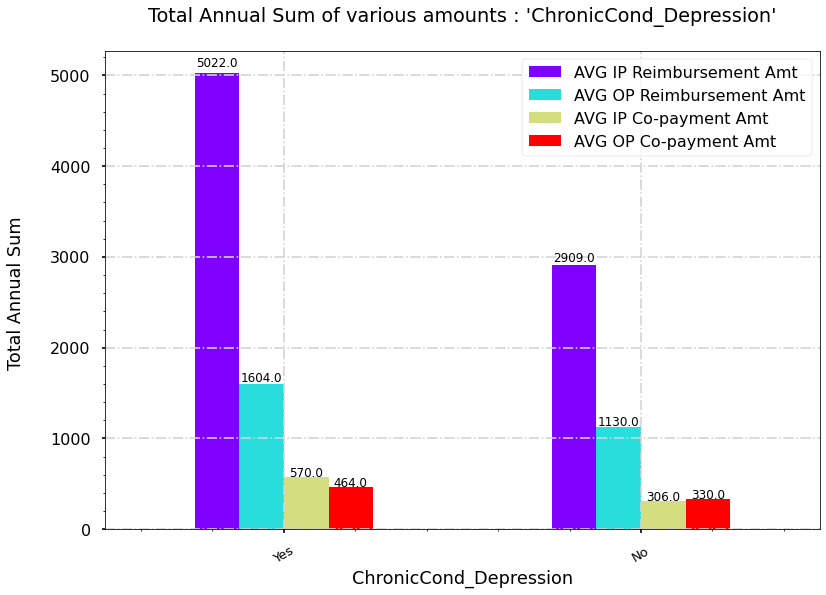

In [459]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_D_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Depression'\n")

Above Graph show :
There is a significant difference between inpatient reimbursement and the other which more than 50% diference.

### Patient with Diabetes

   ChronicCond_Diabetes
1                 83391
2                 55165 



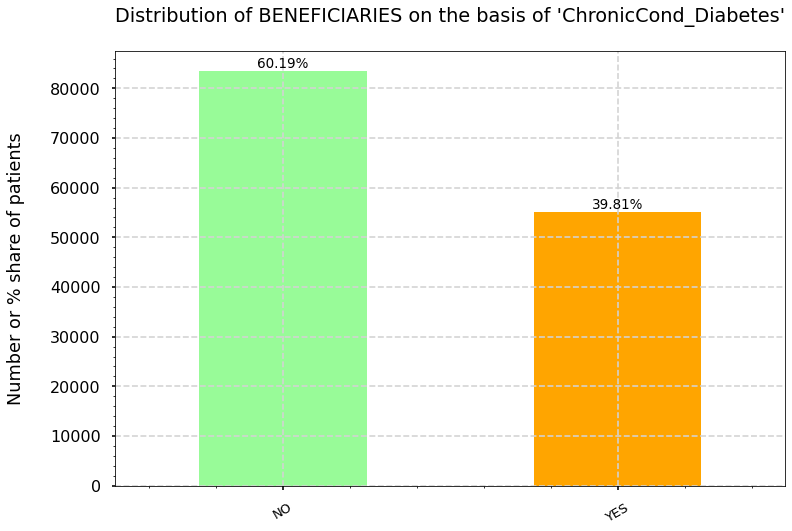

In [460]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_Diabetes'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_Diabetes'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_Diabetes'].value_counts()),"\n")

The above graph show that, there is 39,8% patient diagnose with diabetes.

##### How much expenditure on patient with Diabetes? 

###### Annual Reimburssement

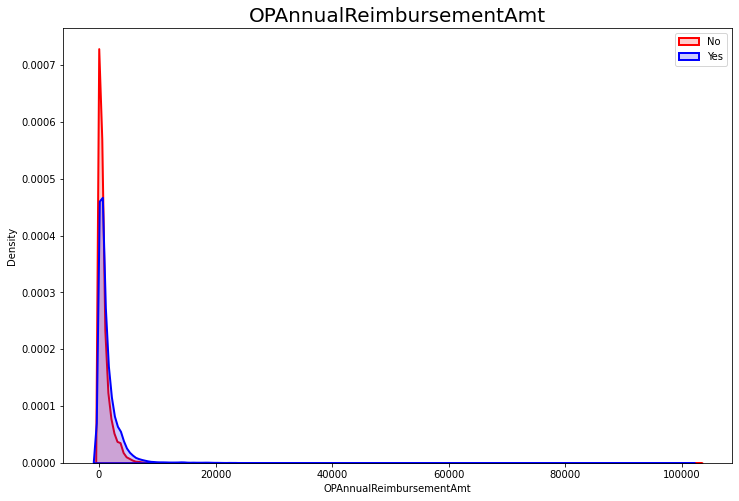

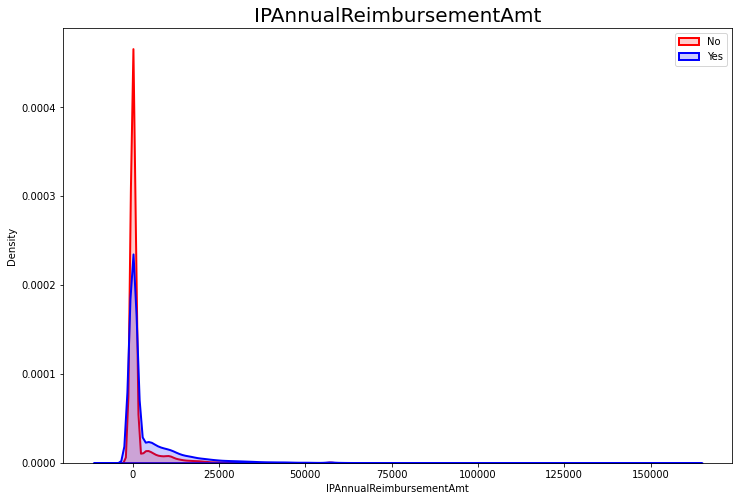

                      IPAnnualReimbursementAmt
ChronicCond_Diabetes                          
1                                    406166040
2                                    100996930 

                      OPAnnualReimbursementAmt
ChronicCond_Diabetes                          
1                                    134030980
2                                     45845100 



In [461]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Diabetes'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Diabetes'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show that :
- The highest number of patients is from outpatient. 
- There is a significant diference of reimbursement either in inpatient or outpetinet more than 50%, which can be potential fraud.   

###### Co Paid by Patient

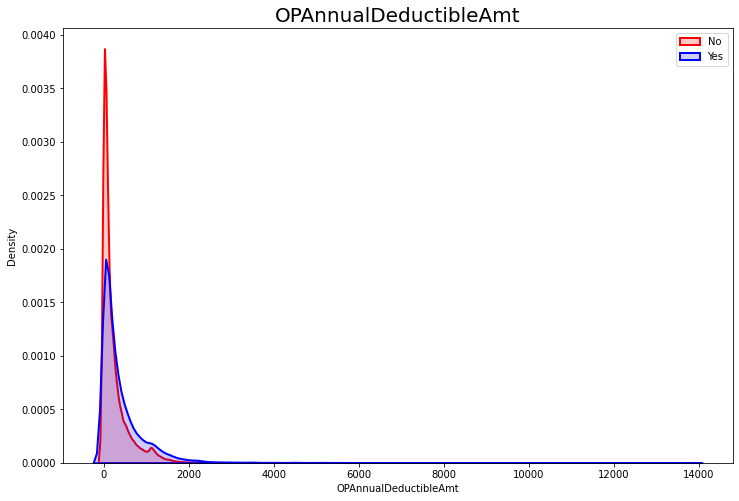

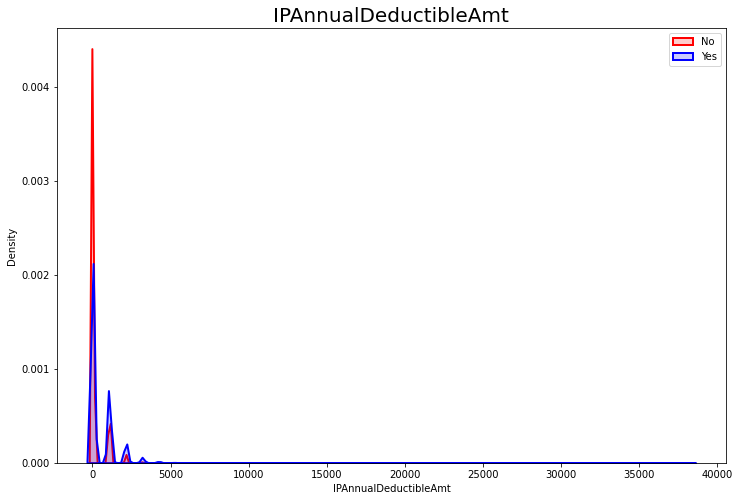

                      OPAnnualDeductibleAmt
ChronicCond_Diabetes                       
1                                  38722229
2                                  13612902 

                      IPAnnualDeductibleAmt
ChronicCond_Diabetes                       
1                                  44552032
2                                  10849210 



In [462]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Diabetes'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Diabetes'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show that :

- The highest number of patients is from outpatient.
- There is also a quite significant amount of annual deduction that can be potentially fraud. 

###### Average Expendeture on patient with Diabetes

In [463]:
CC_Dia_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['BeneID'].count())
CC_Dia_OP_D.columns = ['AVG OP Co-payment Amt']
CC_Dia_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['BeneID'].count())
CC_Dia_IP_D.columns = ['AVG IP Co-payment Amt']
CC_Dia_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['BeneID'].count())
CC_Dia_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_Dia_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Diabetes'])['BeneID'].count())
CC_Dia_IP_R.columns = ['AVG IP Reimbursement Amt']

In [464]:
CC_Dia_all_amts = pd.concat([CC_Dia_IP_R, CC_Dia_OP_R, CC_Dia_IP_D, CC_Dia_OP_D], axis=1)
CC_Dia_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Diabetes                                                       
1                                  4870.622010               1607.259536   
2                                  1830.815372                831.054110   

                      AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Diabetes                                                
1                                534.254680             464.345421  
2                                196.668359             246.767008

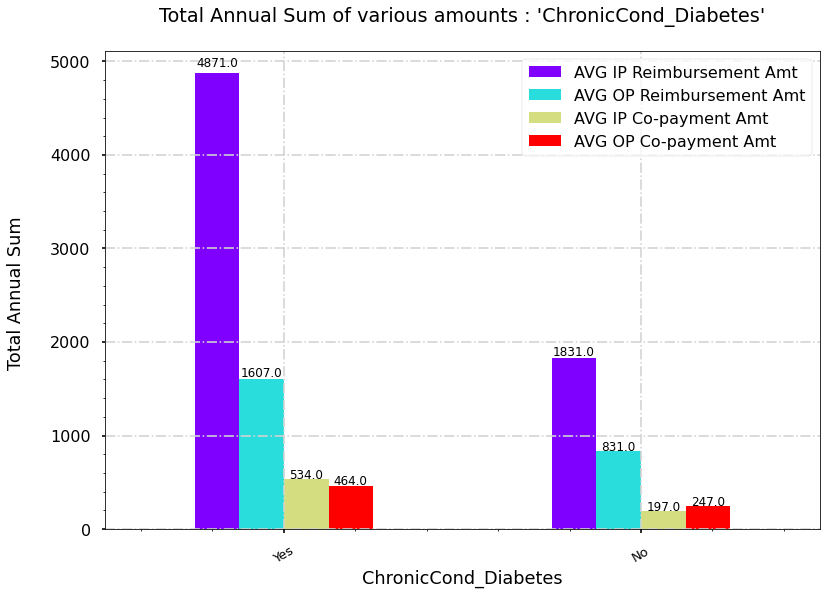

In [465]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_Dia_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Diabetes'\n")

Above Graph show :
There is a significant difference between inpatient reimbursement and the other which more than 50% diference.

### Patient with Heart Ischemic

   ChronicCond_IschemicHeart
1                      93644
2                      44912 



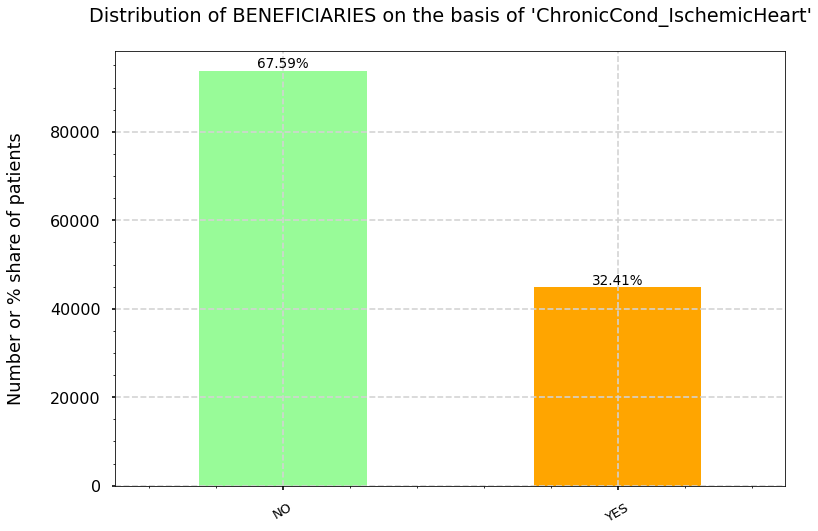

In [466]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_IschemicHeart'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_IschemicHeart'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_IschemicHeart'].value_counts()),"\n")

The above graph show that, there is 32,4% patient diagnose with diabetes.

##### How much expenditure on patient with Heart Ischemic? 

###### Annual Reimburssement

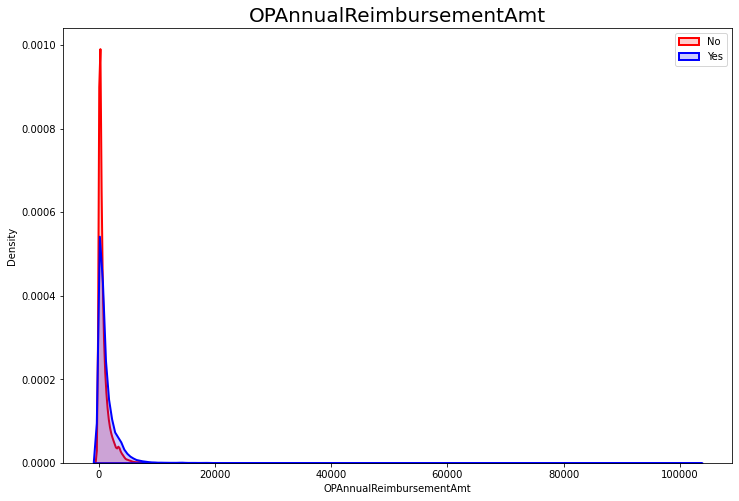

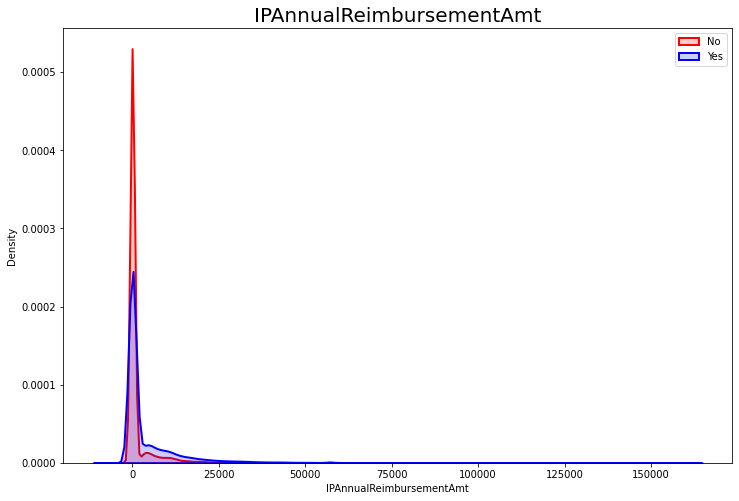

                           IPAnnualReimbursementAmt
ChronicCond_IschemicHeart                          
1                                         439909830
2                                          67253140 

                           OPAnnualReimbursementAmt
ChronicCond_IschemicHeart                          
1                                         142439780
2                                          37436300 



In [467]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_IschemicHeart'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_IschemicHeart'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show that :
- The highest number of patients is from outpatient. 
- There is a significant diference of reimbursement either in inpatient or outpetinet more than 50%, which can be potential fraud.   

###### Co Paid by Patient

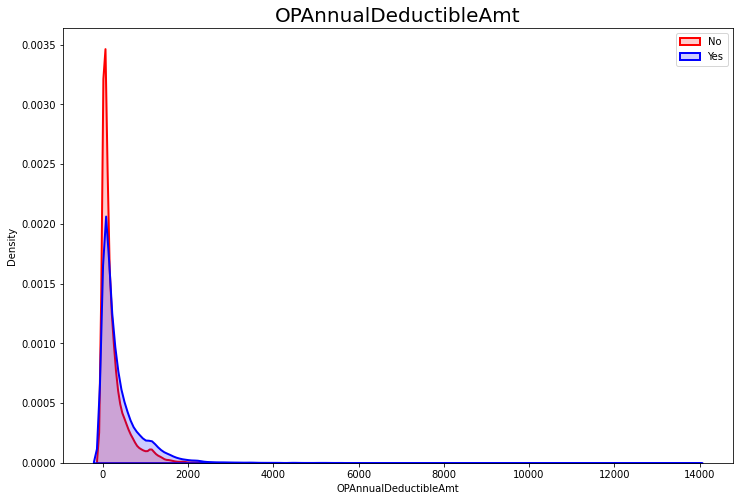

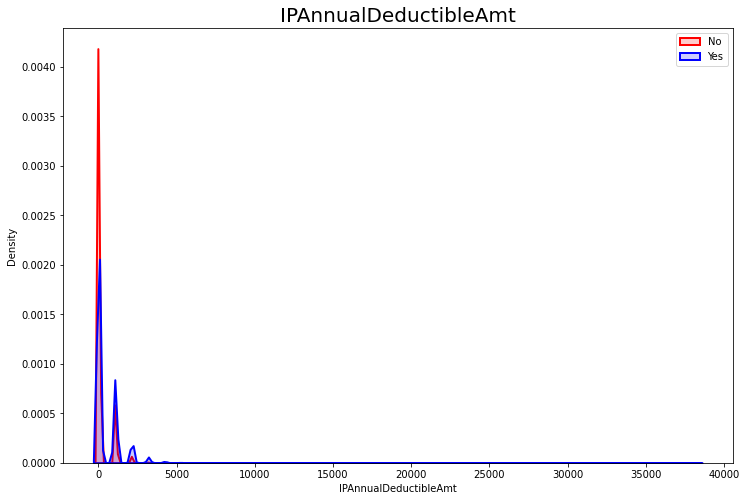

                           OPAnnualDeductibleAmt
ChronicCond_IschemicHeart                       
1                                       41338913
2                                       10996218 

                           IPAnnualDeductibleAmt
ChronicCond_IschemicHeart                       
1                                       47445826
2                                        7955416 



In [468]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_IschemicHeart'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_IschemicHeart'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show that :

- There is also a quite significant amount of annual deduction that can be potentially fraud. 

###### Average Expendeture on patient with Heart Ischemic

In [469]:
CC_Isc_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['BeneID'].count())
CC_Isc_OP_D.columns = ['AVG OP Co-payment Amt']
CC_Isc_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['BeneID'].count())
CC_Isc_IP_D.columns = ['AVG IP Co-payment Amt']
CC_Isc_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['BeneID'].count())
CC_Isc_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_Isc_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_IschemicHeart'])['BeneID'].count())
CC_Isc_IP_R.columns = ['AVG IP Reimbursement Amt']

In [470]:
CC_Isc_all_amts = pd.concat([CC_Isc_IP_R, CC_Isc_OP_R, CC_Isc_IP_D, CC_Isc_OP_D], axis=1)
CC_Isc_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_IschemicHeart                                                       
1                                       4697.683034               1521.077485   
2                                       1497.442554                833.547827   

                           AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_IschemicHeart                                                
1                                     506.661676             441.447535  
2                                     177.133416             244.839197

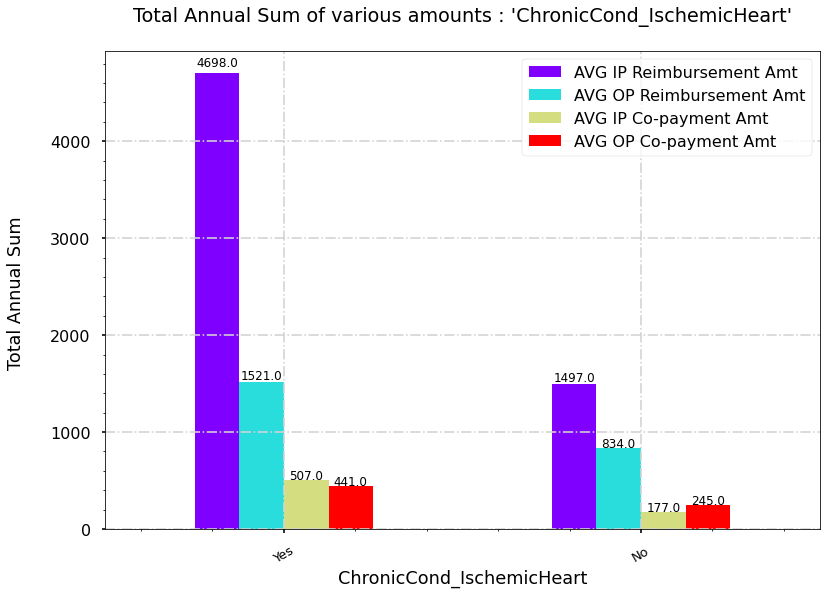

In [471]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_Isc_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_IschemicHeart'\n")

Above Graph show :
There is a significant difference between inpatient reimbursement and the other which more than 50% diference.

### Patient with Osteoporasis

   ChronicCond_Osteoporasis
2                    100497
1                     38059 



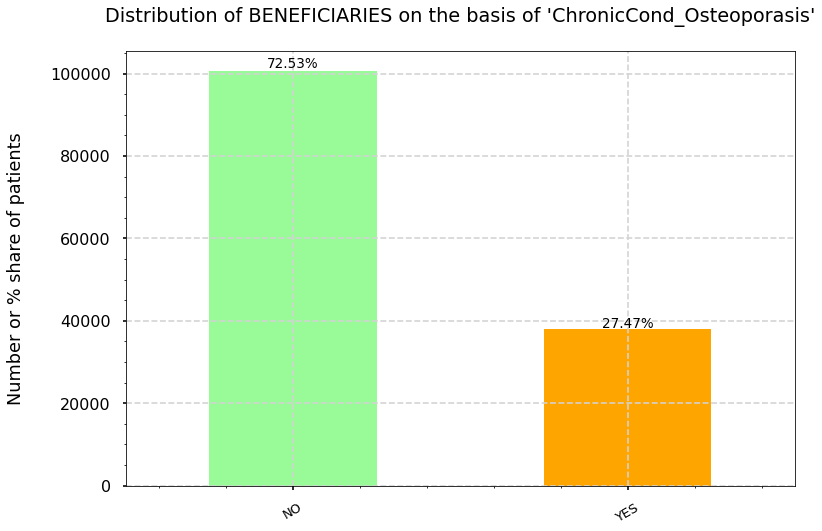

In [472]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_Osteoporasis'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_Osteoporasis'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_Osteoporasis'].value_counts()),"\n")

The above graph show that, there is 27,4% patient diagnose with diabetes.

##### How much expenditure on patient with osteoporosis? 

###### Annual Reimburssement

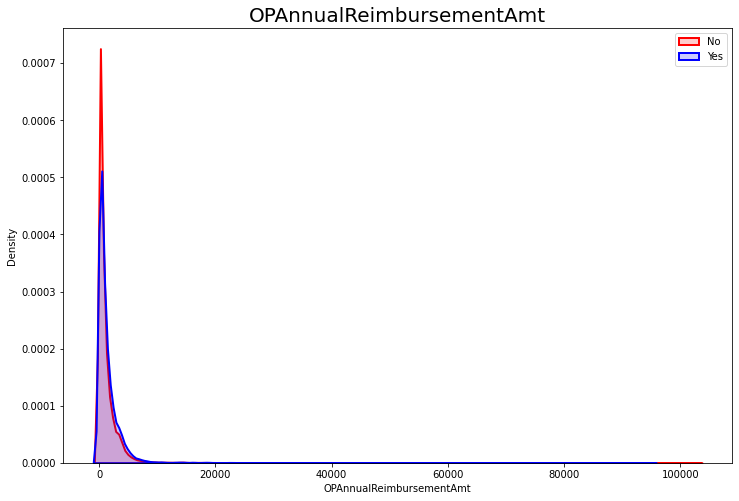

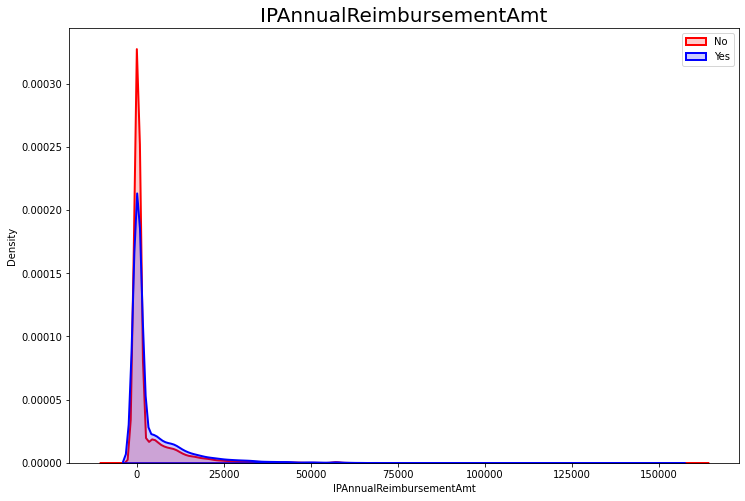

                          IPAnnualReimbursementAmt
ChronicCond_Osteoporasis                          
1                                        175391850
2                                        331771120 

                          OPAnnualReimbursementAmt
ChronicCond_Osteoporasis                          
1                                         56887130
2                                        122988950 



In [473]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Osteoporasis'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Osteoporasis'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show that :
- The highest number of patients is from inpatient. 
- There is a significant diference of reimbursement either in inpatient or outpetinet more than 50%, which can be potential fraud.   

###### Co Paid by Patient

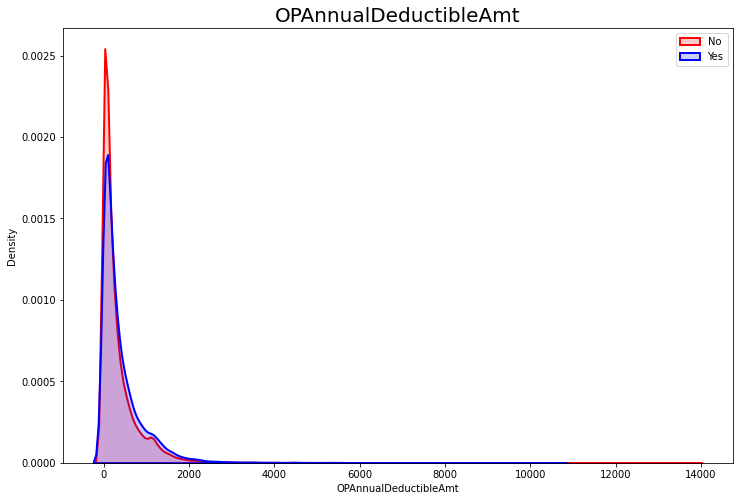

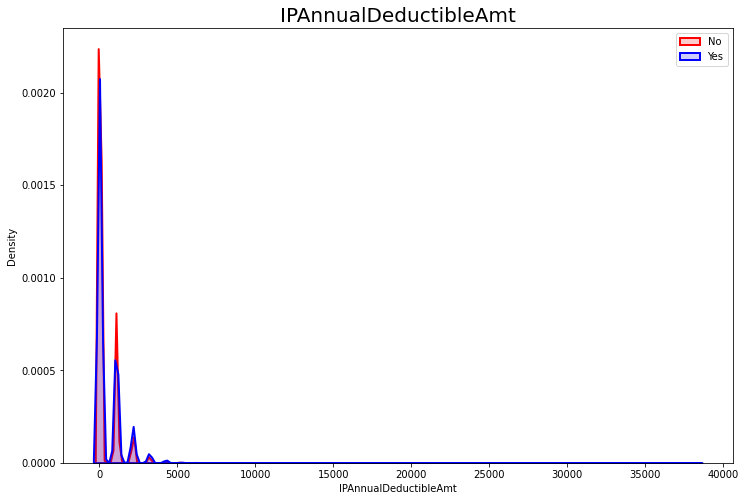

                          OPAnnualDeductibleAmt
ChronicCond_Osteoporasis                       
1                                      16603211
2                                      35731920 

                          IPAnnualDeductibleAmt
ChronicCond_Osteoporasis                       
1                                      19487662
2                                      35913580 



In [474]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Osteoporasis'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_Osteoporasis'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show that :

- There is also a quite significant amount of annual deduction that can be potentially fraud. 

###### Average Expendeture on patient with Osteoporosis

In [475]:
CC_ost_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['BeneID'].count())
CC_ost_OP_D.columns = ['AVG OP Co-payment Amt']
CC_ost_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['BeneID'].count())
CC_ost_IP_D.columns = ['AVG IP Co-payment Amt']
CC_ost_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['BeneID'].count())
CC_ost_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_ost_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_Osteoporasis'])['BeneID'].count())
CC_ost_IP_R.columns = ['AVG IP Reimbursement Amt']

In [476]:
CC_ost_all_amts = pd.concat([CC_ost_IP_R, CC_ost_OP_R, CC_ost_IP_D, CC_ost_OP_D], axis=1)
CC_ost_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Osteoporasis                                                       
1                                      4608.419822               1494.709004   
2                                      3301.303721               1223.807178   

                          AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Osteoporasis                                                
1                                    512.038204             436.249271  
2                                    357.359722             355.552106

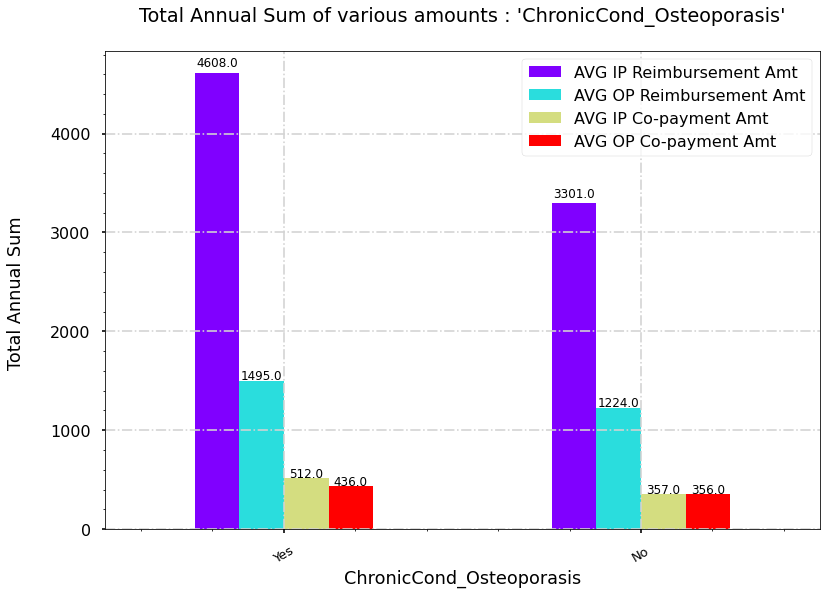

In [477]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_ost_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Osteoporasis'\n")

Above Graph show :
There is not so much diferent reimbursement or co paid by patient from patient with or without osteoporosis or not.

### Patient with Rheumatoid Arthritis

   ChronicCond_rheumatoidarthritis
2                           102972
1                            35584 



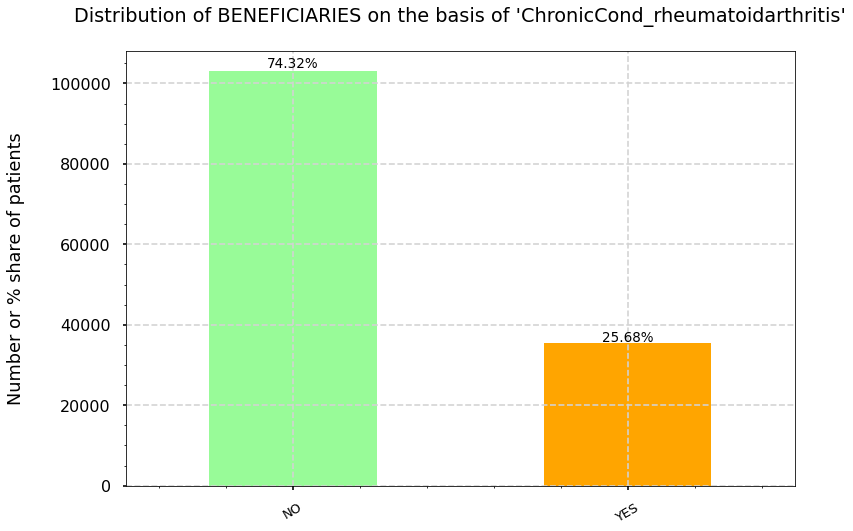

In [478]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_rheumatoidarthritis'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_rheumatoidarthritis'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_rheumatoidarthritis'].value_counts()),"\n")

The above graph show that, there is 25,6% patient diagnose with diabetes.

##### How much expenditure on patient with Rheumatoid Arthritis? 




###### Annual Reimburssement

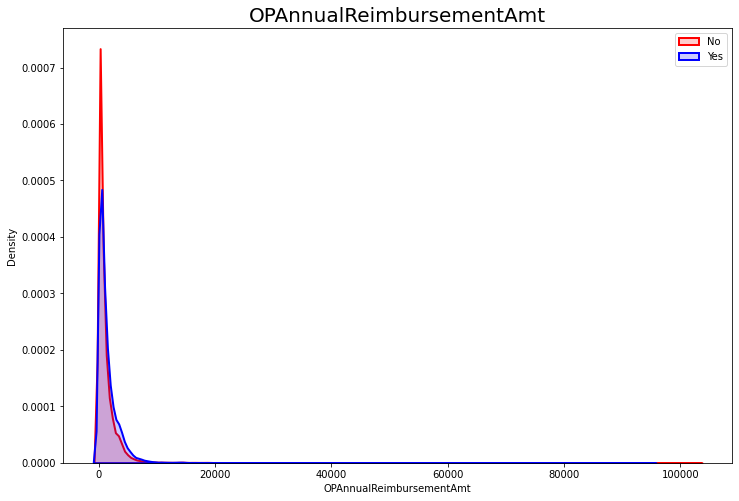

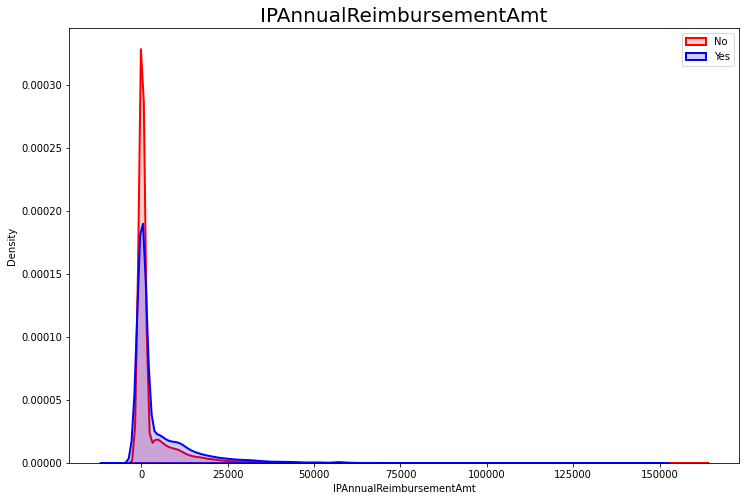

                                 IPAnnualReimbursementAmt
ChronicCond_rheumatoidarthritis                          
1                                               181550550
2                                               325612420 

                                 OPAnnualReimbursementAmt
ChronicCond_rheumatoidarthritis                          
1                                                55086090
2                                               124789990 



In [479]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_rheumatoidarthritis'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_rheumatoidarthritis'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show that :
- The highest number of patients is from inpatinet. 
- There is a significant diference of reimbursement either in inpatient or outpetinet more than 50%, which can be potential fraud.   

###### Co Paid by Patient

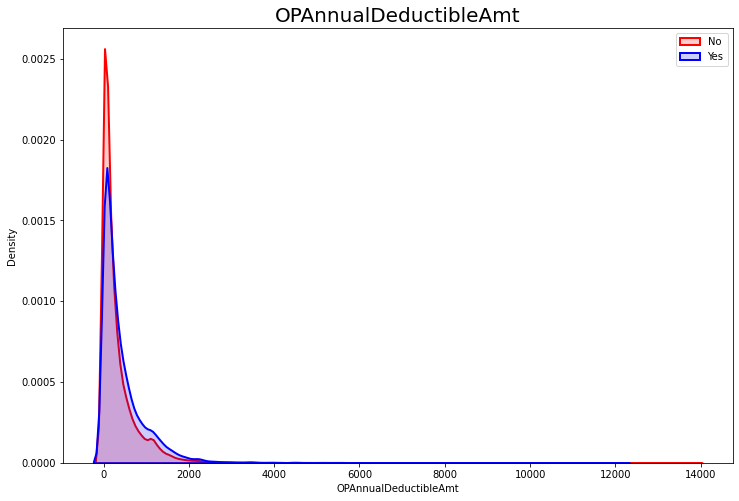

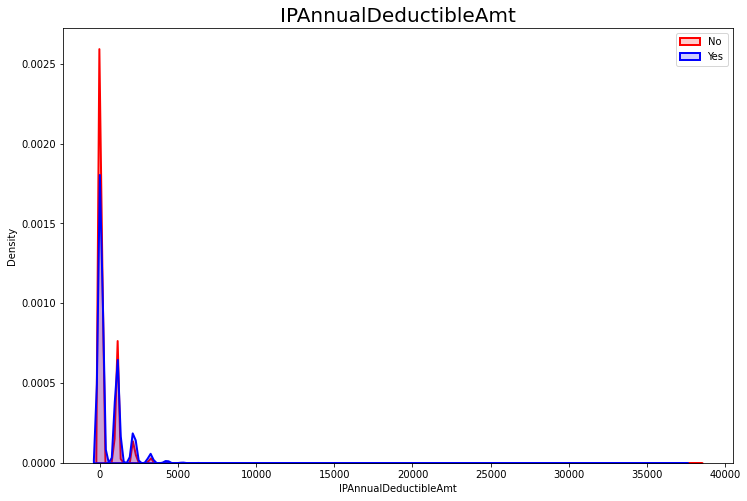

                                 OPAnnualDeductibleAmt
ChronicCond_rheumatoidarthritis                       
1                                             16134611
2                                             36200520 

                                 IPAnnualDeductibleAmt
ChronicCond_rheumatoidarthritis                       
1                                             20020654
2                                             35380588 



In [480]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_rheumatoidarthritis'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_rheumatoidarthritis'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show that :

- There is not so much diferent from 1 or 2. 

###### Average Expendeture on patient with Rheumatoid Arthritis

In [481]:
CC_RTD_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['BeneID'].count())
CC_RTD_OP_D.columns = ['AVG OP Co-payment Amt']
CC_RTD_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['BeneID'].count())
CC_RTD_IP_D.columns = ['AVG IP Co-payment Amt']
CC_RTD_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['BeneID'].count())
CC_RTD_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_RTD_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_rheumatoidarthritis'])['BeneID'].count())
CC_RTD_IP_R.columns = ['AVG IP Reimbursement Amt']

In [482]:
CC_RTD_all_amts = pd.concat([CC_RTD_IP_R, CC_RTD_OP_R, CC_RTD_IP_D, CC_RTD_OP_D], axis=1)
CC_RTD_all_amts

AVG IP Reimbursement Amt  \
ChronicCond_rheumatoidarthritis                             
1                                             5102.027597   
2                                             3162.145243   

                                 AVG OP Reimbursement Amt  \
ChronicCond_rheumatoidarthritis                             
1                                             1548.057835   
2                                             1211.882745   

                                 AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_rheumatoidarthritis                                                
1                                           562.630789             453.423196  
2                                           343.594259             351.556928

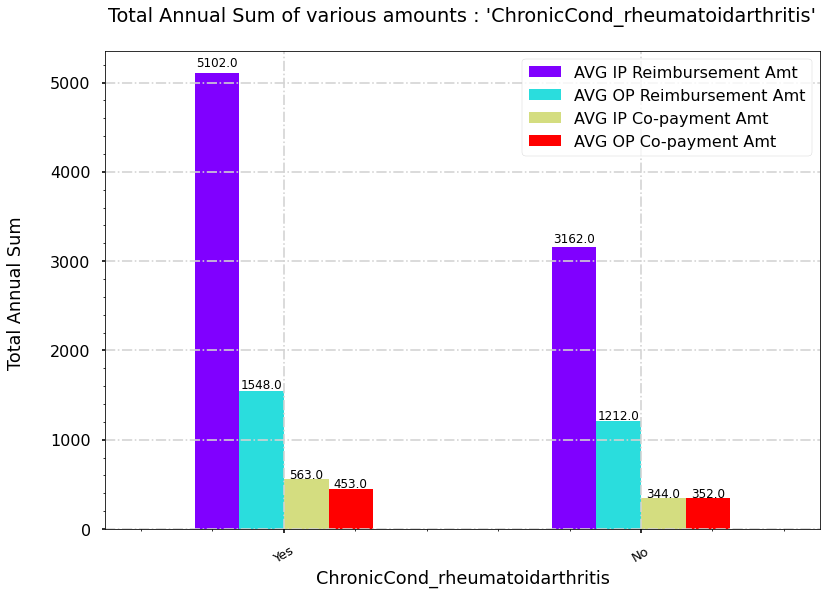

In [483]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_RTD_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_rheumatoidarthritis'\n")

Above Graph show :
There is a significant difference between inpatient reimbursement and the other which more than 50% diference.

### Patient with Stroke

   ChronicCond_stroke
2              127602
1               10954 



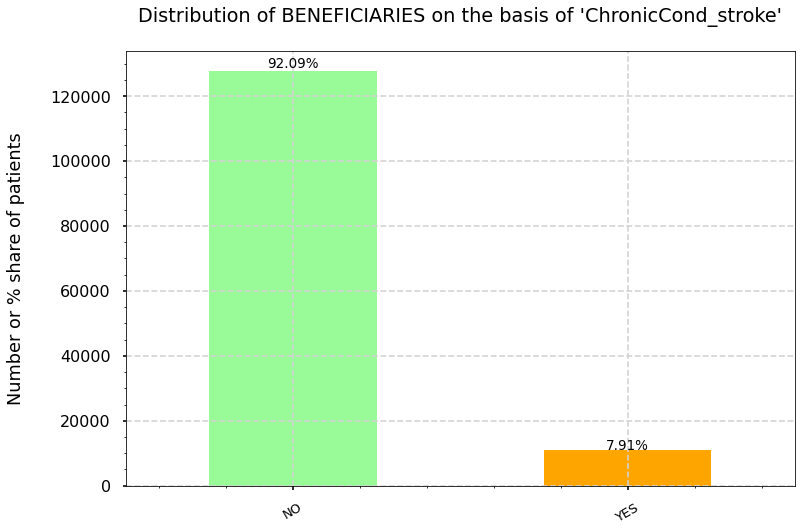

In [484]:
with plt.style.context('seaborn-poster'):
  plt.figure(figsize=(12,8))
  fig = Train_Beneficiary['ChronicCond_stroke'].value_counts().plot(kind='bar', color=['palegreen','orange'])
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)
  plt.xticks(ticks=[0,1], labels=['NO', 'YES'], fontsize=13, rotation=30)
  plt.ylabel("Number or % share of patients\n")
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES on the basis of 'ChronicCond_stroke'\n")

# 1 means +ve 
# 2 means -ve
print(pd.DataFrame(Train_Beneficiary['ChronicCond_stroke'].value_counts()),"\n")

The above graph show that, there is just 7,9 % patient diagnose with stroke.

##### How much expenditure on patient with Stroke? 




###### Annual Reimburssement

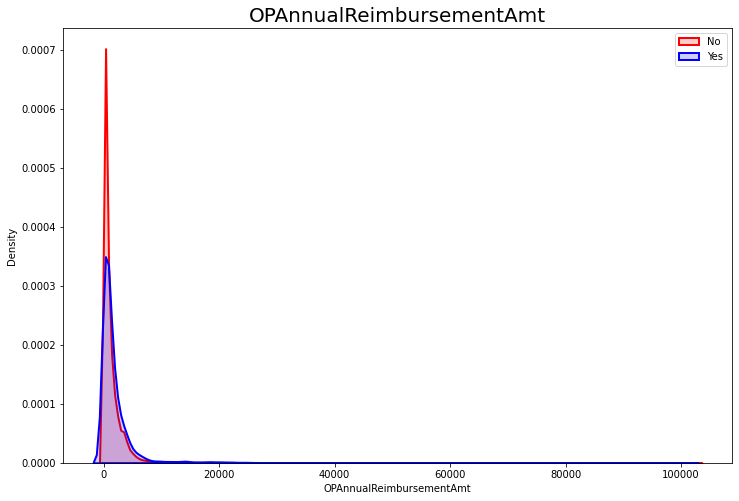

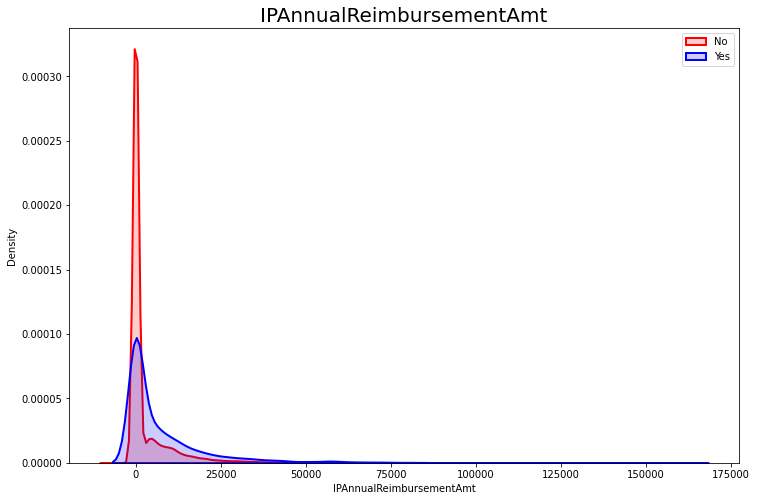

                    IPAnnualReimbursementAmt
ChronicCond_stroke                          
1                                   88853100
2                                  418309870 

                    OPAnnualReimbursementAmt
ChronicCond_stroke                          
1                                   21088610
2                                  158787470 



In [485]:
for col in alz : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_stroke'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_stroke'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_stroke'])['IPAnnualReimbursementAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_stroke'])['OPAnnualReimbursementAmt'].sum()),"\n")

The above graph show that :
- The highest number of patients is from inpatinet. 
- There is a significant diference of reimbursement either in inpatient or outpetinet more than 50%, which can be potential fraud.   

###### Co Paid by Patient

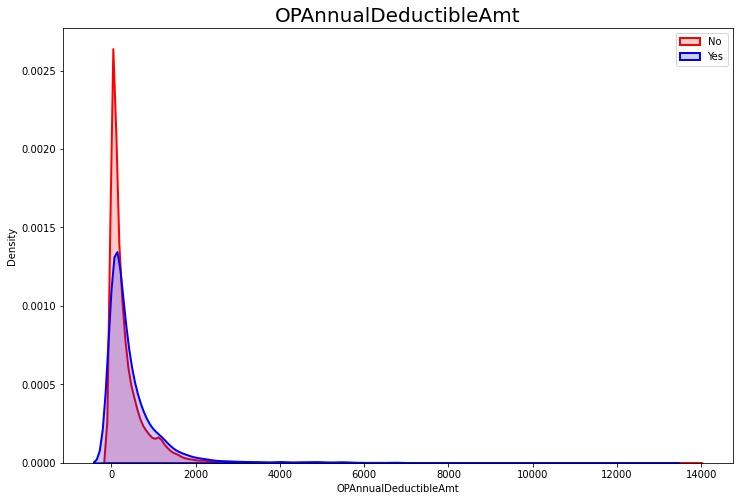

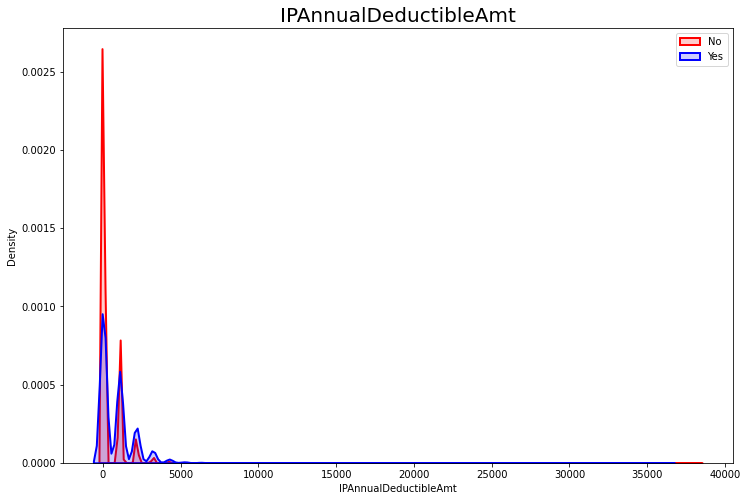

                    OPAnnualDeductibleAmt
ChronicCond_stroke                       
1                                 5870769
2                                46464362 

                    IPAnnualDeductibleAmt
ChronicCond_stroke                       
1                                 9435770
2                                45965472 



In [486]:
for col in alz_d : 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_stroke'] == 2]), shade=True, alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=Train_Beneficiary, x=(Train_Beneficiary[col][Train_Beneficiary['ChronicCond_stroke'] == 1]), shade=True, alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_stroke'])['OPAnnualDeductibleAmt'].sum()),"\n")
print(pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_stroke'])['IPAnnualDeductibleAmt'].sum()),"\n")

The above graph show that :

The highest number of patients is from inpatinet.
There is also a quite significant amount of annual deduction that can be potentially fraud.

###### Average Expendeture on patient with Stroke

In [487]:
CC_STR_OP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_stroke'])['OPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_stroke'])['BeneID'].count())
CC_STR_OP_D.columns = ['AVG OP Co-payment Amt']
CC_STR_IP_D = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_stroke'])['IPAnnualDeductibleAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_stroke'])['BeneID'].count())
CC_STR_IP_D.columns = ['AVG IP Co-payment Amt']
CC_STR_OP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_stroke'])['OPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_stroke'])['BeneID'].count())
CC_STR_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_STR_IP_R = pd.DataFrame(Train_Beneficiary.groupby(['ChronicCond_stroke'])['IPAnnualReimbursementAmt'].sum() / Train_Beneficiary.groupby(['ChronicCond_stroke'])['BeneID'].count())
CC_STR_IP_R.columns = ['AVG IP Reimbursement Amt']

In [488]:
CC_STR_all_amts = pd.concat([CC_STR_IP_R, CC_STR_OP_R, CC_STR_IP_D, CC_STR_OP_D], axis=1)
CC_STR_all_amts

AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_stroke                                                       
1                                8111.475260               1925.197188   
2                                3278.239134               1244.396404   

                    AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_stroke                                                
1                              861.399489             535.947508  
2                              360.225326             364.135061

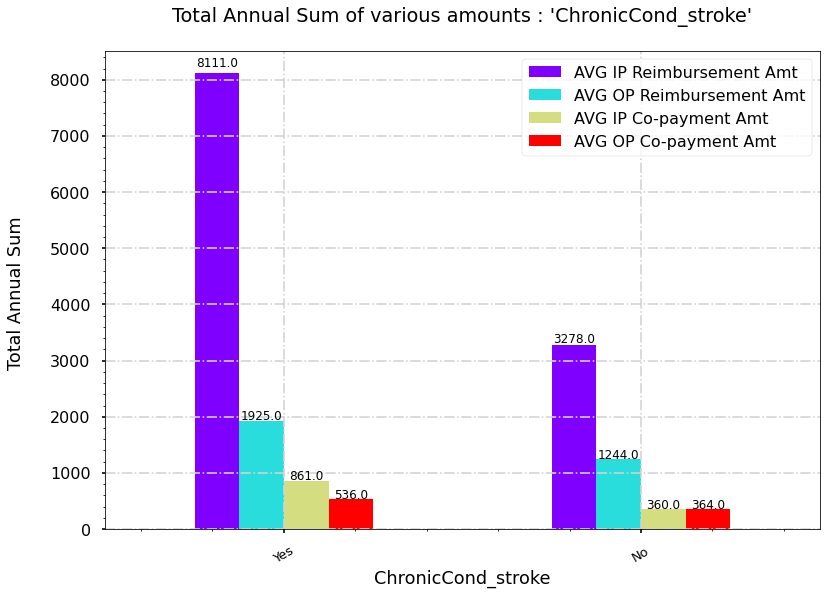

In [489]:
# Here, I'm displaying the Total Annual Sum of IP Co-payment for 'ChronicCond_Alzheimer'
with plt.style.context('seaborn-poster'):
  fig = CC_STR_all_amts.plot(kind='bar', colormap='rainbow')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xticks(ticks=[0,1], labels=['Yes', 'No'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n")
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_stroke'\n")

Above Graph show :
There is a significant difference between inpatient reimbursement and the other which more than 50% diference.

## Chronic Condition Distribution 

In [490]:
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

Train_Beneficiary = Train_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
Train_Beneficiary = Train_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [491]:
Test_Beneficiary = Test_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
Test_Beneficiary = Test_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [492]:
# change into numerical 
Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)


In [493]:
# change into numerical 
Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)


In [494]:
Train_Beneficiary['Chronic_cond'] = Train_Beneficiary['ChronicCond_Alzheimer'] + Train_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Train_Beneficiary['ChronicCond_KidneyDisease'] + Train_Beneficiary['ChronicCond_Cancer'] +\
                                        Train_Beneficiary['ChronicCond_ObstrPulmonary'] + Train_Beneficiary['ChronicCond_Depression'] +\
                                    Train_Beneficiary['ChronicCond_Diabetes'] + Train_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Train_Beneficiary['ChronicCond_Osteoporasis'] + Train_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Train_Beneficiary['ChronicCond_stroke'] + Train_Beneficiary['RenalDiseaseIndicator']

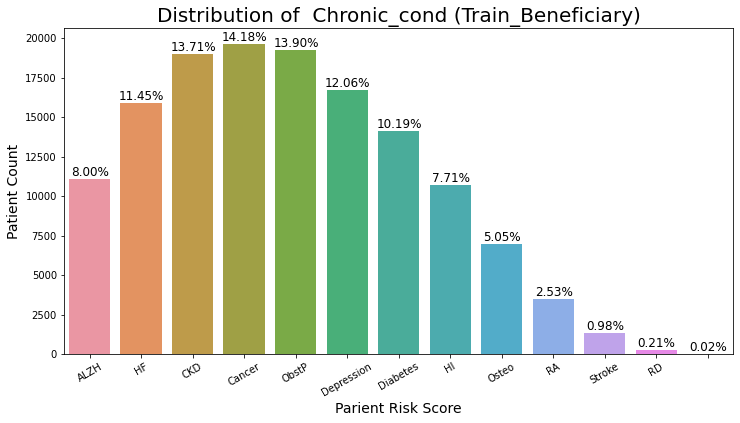

In [495]:
# Distribition of patient risk score
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Chronic_cond',y=None, data=Train_Beneficiary, orient ="v")
plt.title('Distribution of  Chronic_cond (Train_Beneficiary)', fontsize=20)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=['ALZH', 'HF' ,'CKD','Cancer','ObstP','Depression','Diabetes','HI','Osteo','RA','Stroke','RD'], fontsize=13, rotation=30)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Parient Risk Score', size = 14)
plt.ylabel('Patient Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Chronic_cond'], 0.01, 200,12)

The graph above shows :
- The highest number or chronic conditions is CKD, Cancer, ObstPulmo, and Depression.
- The least number of chronic conditions is RA, Stroke,and RD. 

## Inpatient and Outpatient Distribution

In [496]:
BENE = set(Train_Beneficiary['BeneID'])  
IP = set(Train_Inpatient['BeneID'])
OP = set(Train_Outpatient['BeneID'])

In [497]:
len(IP), len(OP), len(BENE)

(31289, 133980, 138556)

The number above is the comparison of the number of patients who have been treated either for inpatient or outpatient, from the number above we can see that not all patient with BeneID have been treated. 

In [498]:
only_in = IP.intersection(OP)
len(only_in)

26713

In [499]:
only_op = OP.difference(IP)
len(only_op)

107267

In [500]:
to = len(only_in) + len(only_op)
to

133980

In [501]:
patients_counts = pd.DataFrame([len(only_in), len(only_op)]).T
patients_counts.columns = ['Only In-patients', 'Only Out-patients']
patients_counts

Only In-patients  Only Out-patients
0             26713             107267

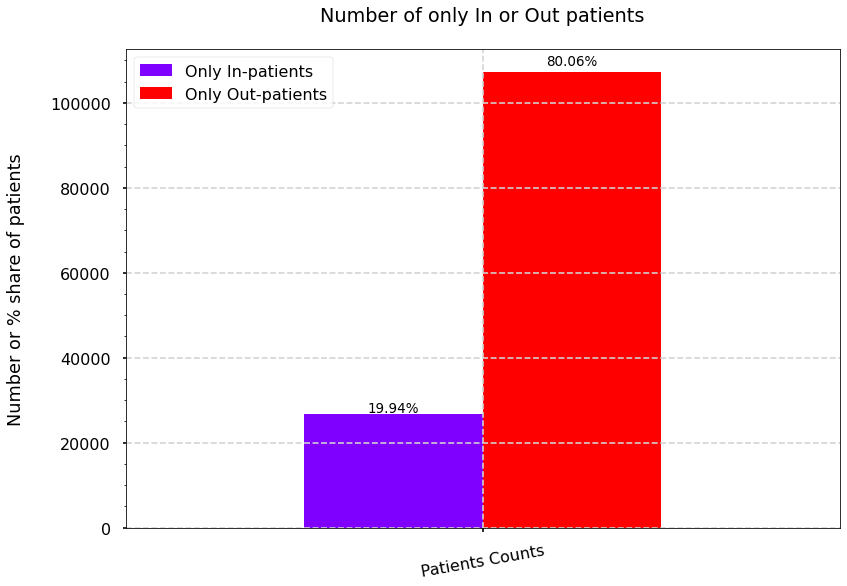

In [502]:
# Here, I'm displaying the number of only in-patients and out-patients
with plt.style.context('seaborn-poster'):
    fig = patients_counts.plot(kind='bar',colormap='rainbow')
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/to,2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    plt.xticks(labels=["Patients Counts"], ticks=[0], rotation=10)
    plt.ylabel("Number or % share of patients\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Number of only In or Out patients\n")
    plt.plot();

The number above showing the number of patient who only ever receives outpatient and who only accepts inpatient. We can see there is 80% more outpatient than inpatient. 

## Physician Distribution 

### Inpatient

In [503]:
Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]

AttendingPhysician OperatingPhysician OtherPhysician
0              PHY390922                NaN            NaN
1              PHY318495          PHY318495            NaN
2              PHY372395                NaN      PHY324689
3              PHY369659          PHY392961      PHY349768
4              PHY379376          PHY398258            NaN
...                  ...                ...            ...
40469          PHY345332          PHY319565            NaN
40470          PHY342806          PHY365497            NaN
40471          PHY423220          PHY332752            NaN
40472          PHY353156                NaN            NaN
40473          PHY431177          PHY352941            NaN

[40474 rows x 3 columns]

In [504]:
Train_Inpatient[['AttendingPhysician','OperatingPhysician', 'OtherPhysician']].describe()

AttendingPhysician OperatingPhysician OtherPhysician
count               40362              23830           4690
unique              11604               8287           2877
top             PHY422134          PHY429430      PHY416093
freq                  386                225             81

There is a various kind of phycisian attendent, the highest number ot physician is Ateendingphysician. 

### Outpatient

In [505]:
Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]

AttendingPhysician OperatingPhysician OtherPhysician
0               PHY326117                NaN            NaN
1               PHY362868                NaN            NaN
2               PHY328821                NaN            NaN
3               PHY334319                NaN            NaN
4               PHY403831                NaN            NaN
...                   ...                ...            ...
517732          PHY364188          PHY364188      PHY385752
517733          PHY423019          PHY332284            NaN
517734          PHY361063                NaN            NaN
517735          PHY403198                NaN      PHY419379
517736          PHY419379                NaN      PHY419379

[517737 rows x 3 columns]

In [506]:
Train_Outpatient[['AttendingPhysician','OperatingPhysician', 'OtherPhysician']].describe()

AttendingPhysician OperatingPhysician OtherPhysician
count              516341              90617         195046
unique              74109              28532          44388
top             PHY330576          PHY330576      PHY412132
freq                 2534                424           1247

## Admit for Days

### Inpatient 

In [507]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'])
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'])
Train_Inpatient['AdmitForDays'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days.abs())+1


Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'])
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'])
Test_Inpatient['AdmitForDays'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days.abs())+1

In [508]:
Train_Inpatient['AdmitForDays'].describe()

count    40474.000000
mean         6.665168
std          5.638538
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         36.000000
Name: AdmitForDays, dtype: float64

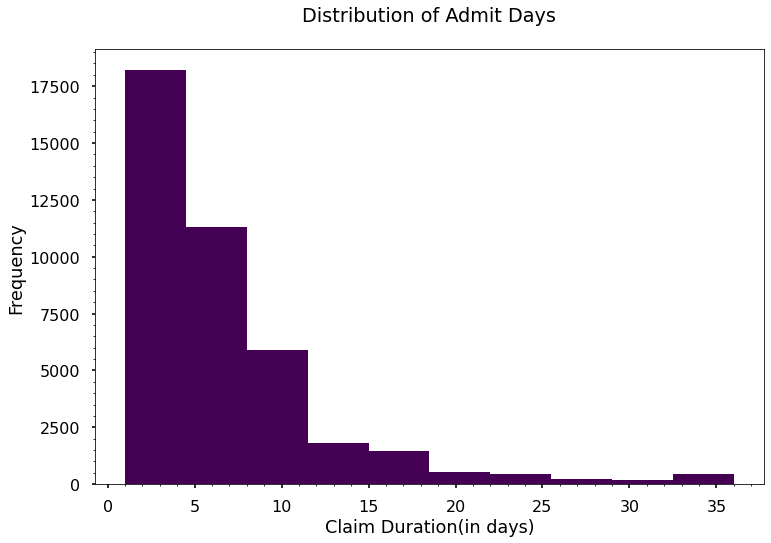

In [509]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    Train_Inpatient['AdmitForDays'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)")
    plt.minorticks_on()
    plt.title("Distribution of Admit Days\n")
    plt.plot();

## Claim Duration

In [510]:
Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'], format="%Y-%m-%d")
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'], format="%Y-%m-%d")
Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'], format="%Y-%m-%d")
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'], format="%Y-%m-%d")

In [511]:
Train_Inpatient['Claim_Duration'] = (Train_Inpatient['ClaimEndDt'] - Train_Inpatient['ClaimStartDt']).dt.days
Train_Outpatient['Claim_Duration'] = (Train_Outpatient['ClaimEndDt'] - Train_Outpatient['ClaimStartDt']).dt.days

In [512]:
Train_Inpatient['Claim_Duration'].describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_Duration, dtype: float64

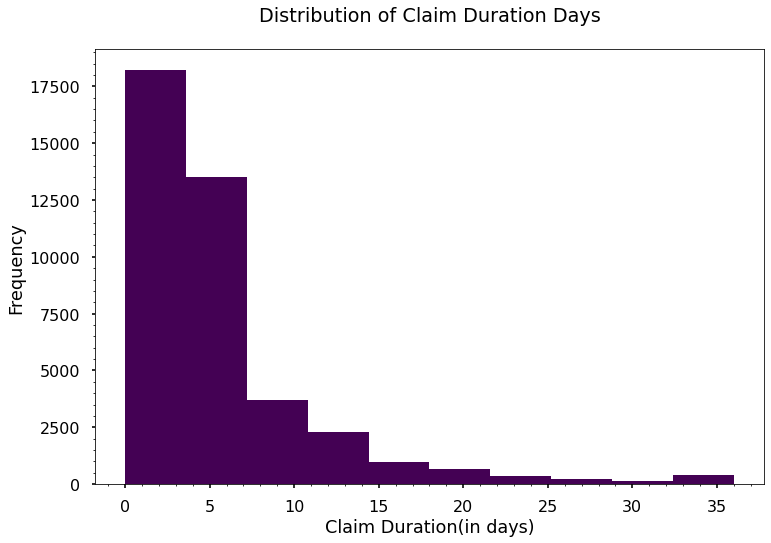

In [513]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    Train_Inpatient['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)")
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n")
    plt.plot();

The diagram above shows most claim durations under 10 days, and the maximum durations is 36 days. 

In [514]:
Train_Outpatient['Claim_Duration'].describe()

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: Claim_Duration, dtype: float64

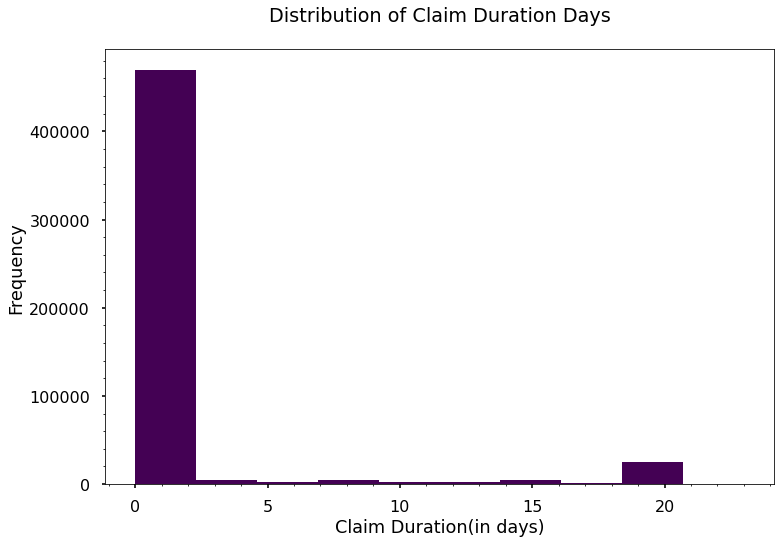

In [515]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    Train_Outpatient['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)")
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n")
    plt.plot();

The diagram above shows most claim durations under 3 days, and the maximum durations is 23 days. 

## Relationship between claim durations and amount of reimbursement

### Inpatient

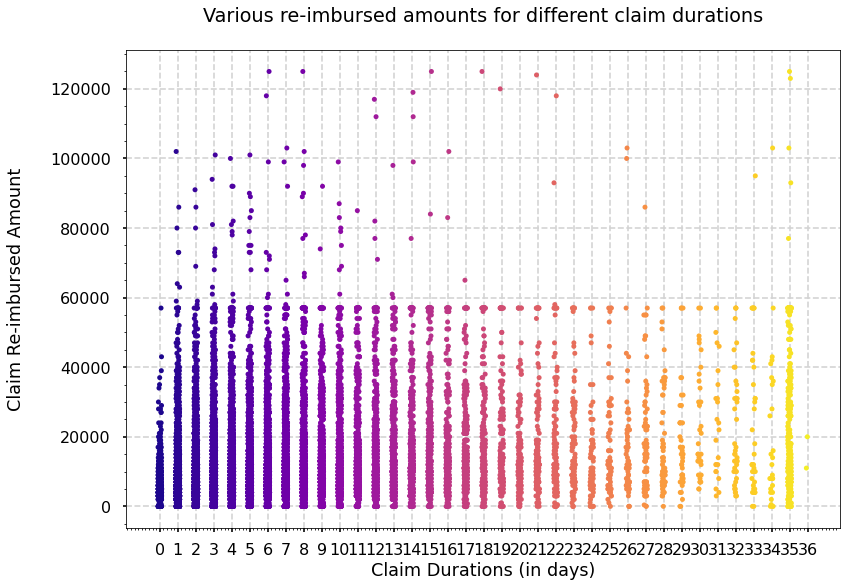

In [516]:
with plt.style.context("seaborn-poster"):
    sns.stripplot(x="Claim_Duration", y="InscClaimAmtReimbursed", data=Train_Inpatient, palette="plasma")
    # Providing the labels and title to the graph
    plt.xlabel("Claim Durations (in days)")
    plt.ylabel("Claim Re-imbursed Amount\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Various re-imbursed amounts for different claim durations\n")
    plt.plot()

The graph above shows that on average from day 1 - day 36 the reimbursement around 0 - 60 million, but there are also some with claimsmore than 120 million. 

In [517]:
total_per_days = pd.DataFrame(Train_Inpatient.groupby(['Claim_Duration'])['ClaimID'].count())
total_per_days.head()


ClaimID
Claim_Duration         
0                   605
1                  4599
2                  6119
3                  6899
4                  4993

In [518]:
total_per_claims = pd.DataFrame(Train_Inpatient.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
total_per_claims.head()

InscClaimAmtReimbursed
Claim_Duration                        
0                              3925000
1                             33356000
2                             43987610
3                             56477460
4                             43932690

In [519]:
claim_amts = pd.merge(left=total_per_days, right=total_per_claims,
                                how='inner',
                                left_on=total_per_days.index,
                                right_on=total_per_claims.index)
claim_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount
0                        0           605                  3925000
1                        1          4599                 33356000
2                        2          6119                 43987610
3                        3          6899                 56477460
4                        4          4993                 43932690

In [520]:
claim_amts['Avg_Claim_Insc_Amount'] = np.round(claim_amts['All_Claims_Total_Amount']/claim_amts['Total_claims'],2)

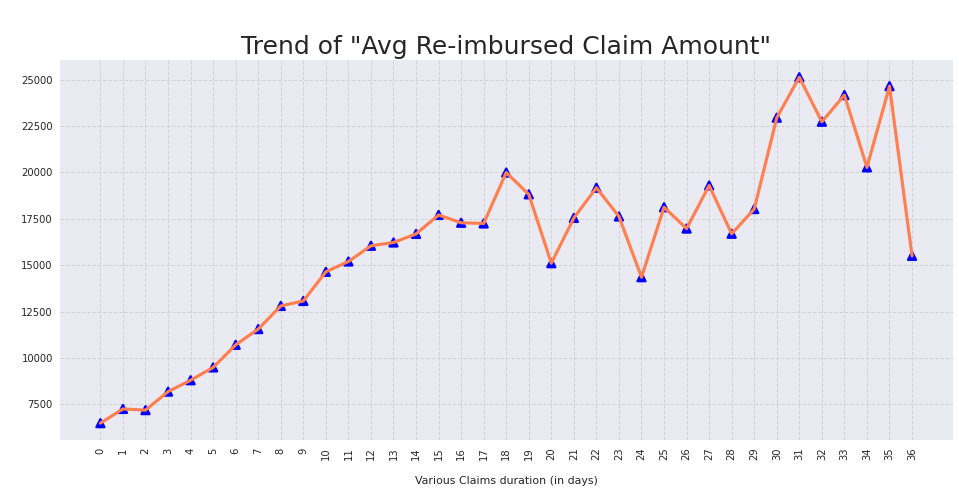

In [521]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)")
    plt.ylabel(" ")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Avg Re-imbursed Claim Amount"', fontsize = 25)
    plt.plot();

Thegraph above shows that the bigger amount of claim will increase the duration of claims, and also we can see above the duratins between 30 - 36 almost reach the maximum amount of reimbursement. 

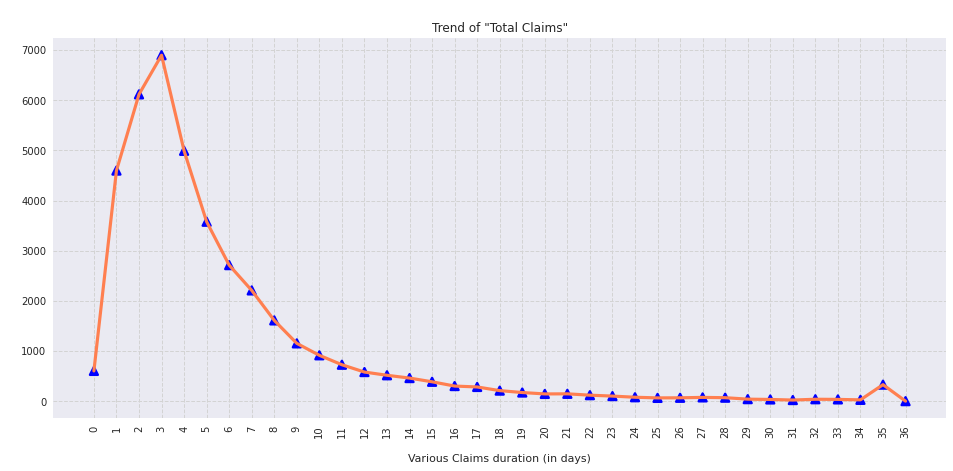

In [522]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_amts, x='Claim_durations_in_days', y='Total_claims', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_amts, x='Claim_durations_in_days', y='Total_claims', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)")
    plt.ylabel(" ")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Total Claims"')
    plt.plot();

The above graph shows :  
- The highst re imbursement is in days 3.
- From day 12 - 34 is very less.
- At day 35 there is a spike or reimbursement this can be a potential fraud. 

### Outpatient

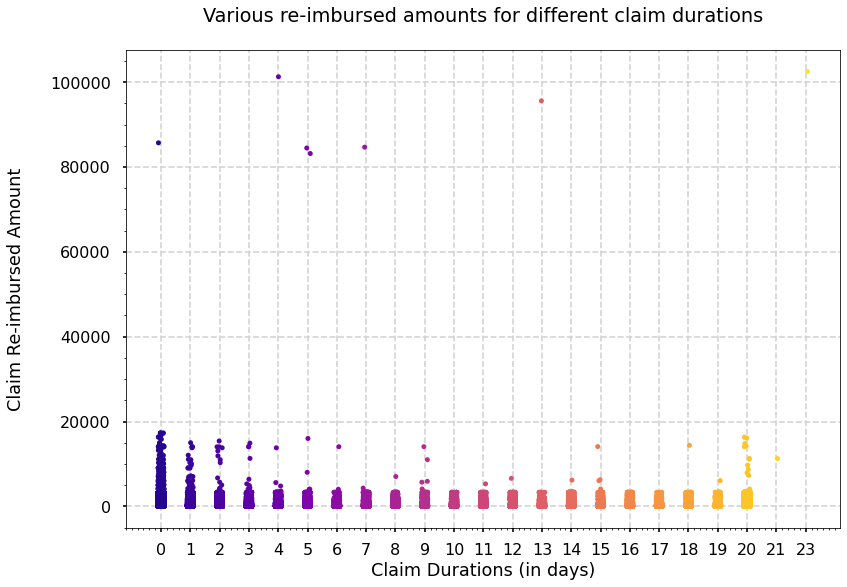

In [523]:
with plt.style.context("seaborn-poster"):
    sns.stripplot(x="Claim_Duration", y="InscClaimAmtReimbursed", data=Train_Outpatient, palette="plasma")
    # Providing the labels and title to the graph
    plt.xlabel("Claim Durations (in days)")
    plt.ylabel("Claim Re-imbursed Amount\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Various re-imbursed amounts for different claim durations\n")
    plt.plot()

The graph above shows that on average from day 1 - day 23 the reimbursement around 0 - 20 million, and there is some more than 80 million 

In [524]:
total_per_days = pd.DataFrame(Train_Outpatient.groupby(['Claim_Duration'])['ClaimID'].count())
total_per_days.head()


ClaimID
Claim_Duration         
0                453348
1                 11960
2                  4366
3                  2597
4                  2238

In [525]:
total_per_claims = pd.DataFrame(Train_Outpatient.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
total_per_claims.head()

InscClaimAmtReimbursed
Claim_Duration                        
0                            105624910
1                              5381060
2                              2227230
3                              1272800
4                              1270910

In [526]:
claim_amts = pd.merge(left=total_per_days, right=total_per_claims,
                                how='inner',
                                left_on=total_per_days.index,
                                right_on=total_per_claims.index)
claim_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_amts.head()

Claim_durations_in_days  Total_claims  All_Claims_Total_Amount
0                        0        453348                105624910
1                        1         11960                  5381060
2                        2          4366                  2227230
3                        3          2597                  1272800
4                        4          2238                  1270910

In [527]:
claim_amts['Avg_Claim_Insc_Amount'] = np.round(claim_amts['All_Claims_Total_Amount']/claim_amts['Total_claims'],2)

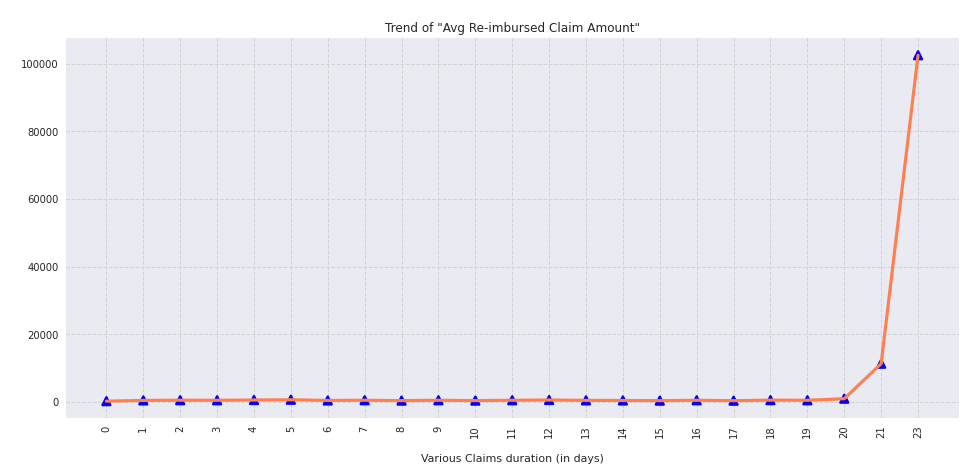

In [528]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)")
    plt.ylabel(" ")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Avg Re-imbursed Claim Amount"')
    plt.plot();

The graph above show the average or reimbersement is the same but there is a spike in day 21 - 23 days, this can be a potential fraud. 

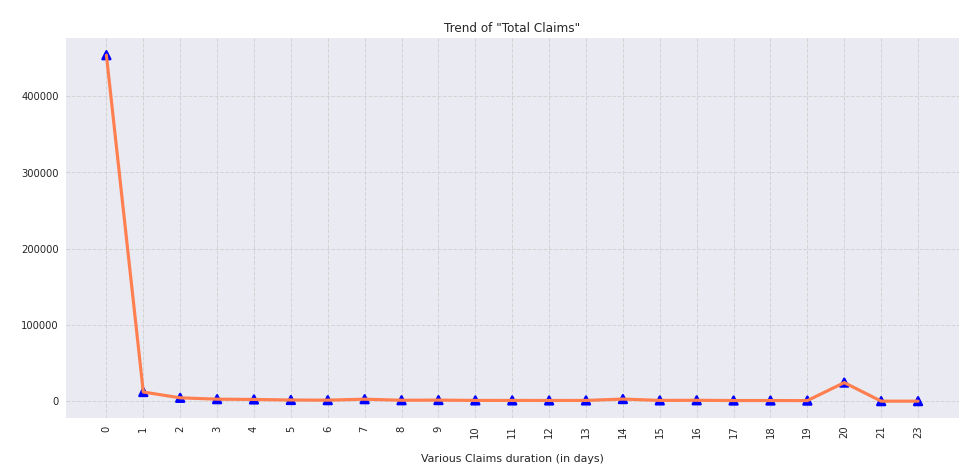

In [529]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_amts, x='Claim_durations_in_days', y='Total_claims', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_amts, x='Claim_durations_in_days', y='Total_claims', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)")
    plt.ylabel(" ")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Total Claims"')
    plt.plot();

The graph above show :
- the high number of claims is in days 0 - 1, this make sense since the data showing outpatient when outpatient patient will registered and treated in the same day. 
- Looking at day 19 - 21 there is a spike that can be a potential fraud.  

## Claim Diagnose Distribution 

### Inpatient 

In [530]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

In [531]:
# We will drop missing value on DiagnoseCode
ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Train_Inpatient["ClmDiagnosisCode_1"], 
                                           Train_Inpatient["ClmDiagnosisCode_2"], 
                                           Train_Inpatient["ClmDiagnosisCode_3"], 
                                           Train_Inpatient["ClmDiagnosisCode_4"],
                                           Train_Inpatient["ClmDiagnosisCode_5"], 
                                           Train_Inpatient["ClmDiagnosisCode_6"],
                                           Train_Inpatient["ClmDiagnosisCode_7"],
                                           Train_Inpatient["ClmDiagnosisCode_8"],
                                           Train_Inpatient["ClmDiagnosisCode_9"],
                                           Train_Inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

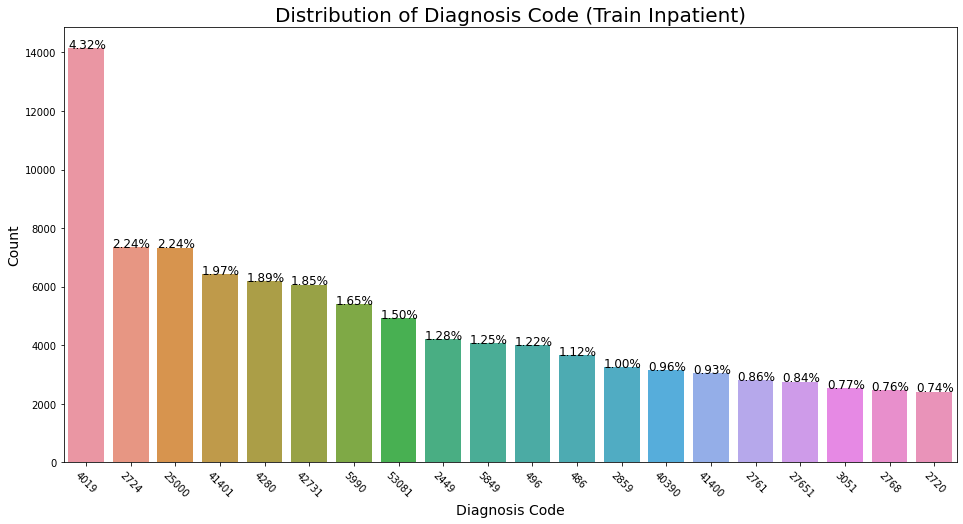

In [532]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_IP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Inpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_IP_df['DiagnosisCode'], 0.02, 0.01, 12)

The highest number of diagnose is 4019, followed by 2724, 25000 and so on. Refering to ICD-10 4019 is for hypertension, 2724 Hyperlipidemia, 25000 for Diabetes mellitus and so on. 

We can check the code on : https://www.icd10data.com/Convert/250.00

### Outpatient

In [533]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

In [534]:
# We will drop missing value on DiagnoseCode
ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([Train_Outpatient["ClmDiagnosisCode_1"], 
                                           Train_Outpatient["ClmDiagnosisCode_2"], 
                                           Train_Outpatient["ClmDiagnosisCode_3"], 
                                           Train_Outpatient["ClmDiagnosisCode_4"],
                                           Train_Outpatient["ClmDiagnosisCode_5"], 
                                           Train_Outpatient["ClmDiagnosisCode_6"],
                                           Train_Outpatient["ClmDiagnosisCode_7"],
                                           Train_Outpatient["ClmDiagnosisCode_8"],
                                           Train_Outpatient["ClmDiagnosisCode_9"],
                                           Train_Outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

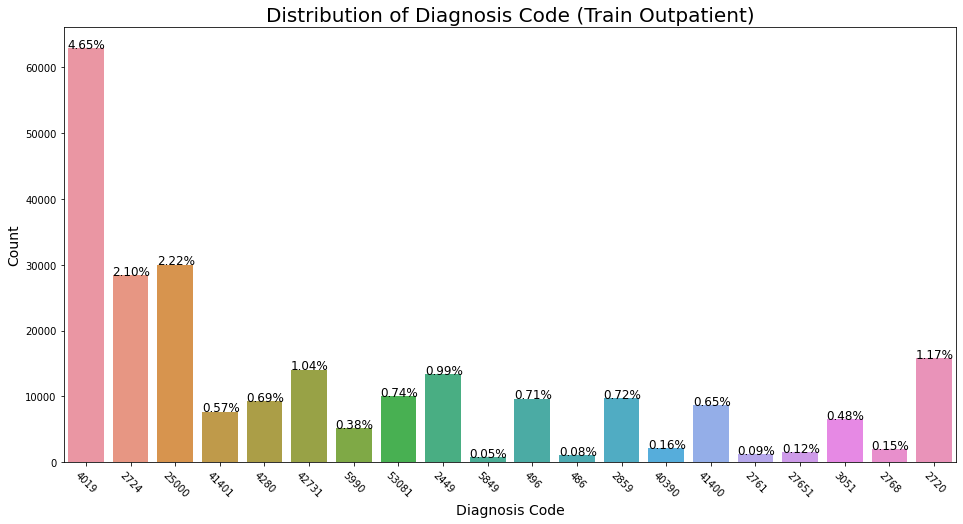

In [535]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_OP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Outpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_OP_df['DiagnosisCode'], 0.02, 0.01, 12)

The highest number of diagnose is 4019, followed by 2724, 25000 and so on. Refering to ICD-10 4019 is for hypertension, 2724 Hyperlipidemia, 25000 for Diabetes mellitus and so on. 

We can check the code on : https://www.icd10data.com/Convert/250.00

## EDA Summary

1. The value NoOfMonths_PartACov and NoOfMonths_PartBCov seems showing the same value and probably won't help on detecting fraud, so we will drop the fetures from Train_Beneficiary dataset. 
2. Since we already have Age and Dead_or_alive features we will drop DOD columns. 


New features :
- AGE 
- Dead or Alive 
- Claim Duration
- Chronic_cond
- DiagnosisCode

Dropped features : 
- DOD 

# E. EDA Questions 

In [536]:
Train_patient_merge_id = [i for i in Train_Outpatient.columns if i in Train_Inpatient.columns]

# Merge Inpatient, Outpatient and beneficiary dataframe into a single patient dataset
Train_Patient_data = pd.merge(Train_Inpatient, Train_Outpatient,
                    left_on = Train_patient_merge_id,
                    right_on = Train_patient_merge_id,
                    how = 'outer').\
          merge(Train_Beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [537]:
train_df = pd.merge(Train_Patient_data, Train)

### Q1. Top 20 Poviders with fraudulent case

In [538]:
tmp = pd.DataFrame(train_df.groupby(['Provider','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['Provider', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
tmp.head()

Provider Fraud?  Num_of_cases   Cases  Percentage
0  PRV51459    Yes          8240  212796        3.87
1  PRV53797    Yes          4739  212796        2.23
2  PRV51574    Yes          4444  212796        2.09
3  PRV53918    Yes          3588  212796        1.69
4  PRV54895    Yes          3436  212796        1.61

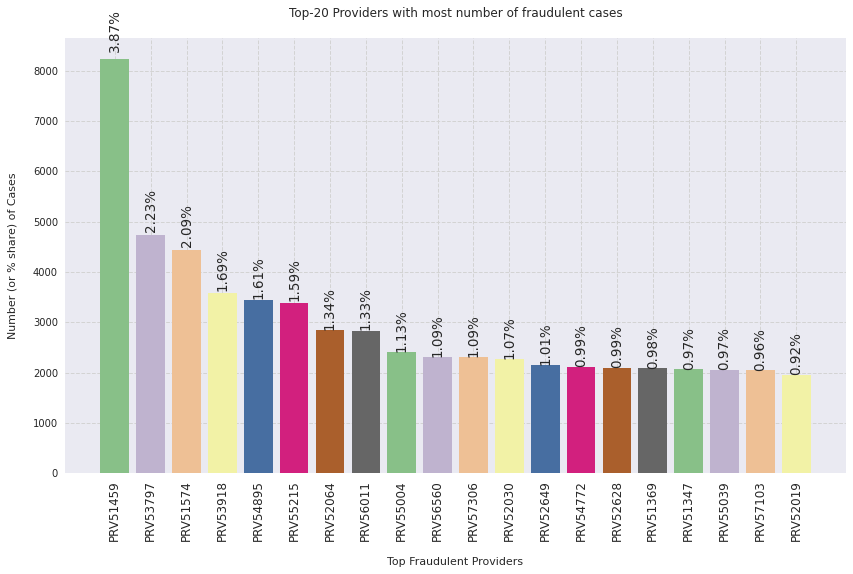

In [539]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp.iloc[0:20], x="Provider", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-20 Providers with most number of fraudulent cases\n")
    plt.plot();

## Q2. Top 20 Poviders with non-fraudulent case

In [540]:
tmp_no = pd.DataFrame(train_df.groupby(['Provider','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_no.columns = ['Provider', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_no['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_no['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp_no = tmp_no[tmp_no['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
tmp_no.head()

Provider Fraud?  Num_of_cases     Cases  Percentage
0  PRV51001     No            25  212796.0        3.87
1  PRV51004     No           149  212796.0        2.09
2  PRV51007     No            72  212796.0        1.61
3  PRV51008     No            43  212796.0        1.59
4  PRV51011     No            58  212796.0        1.34

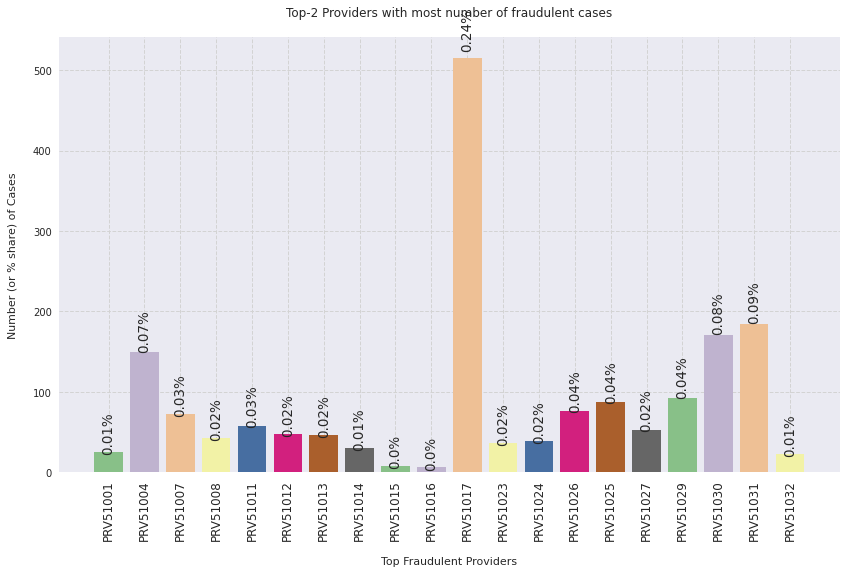

In [541]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_no.iloc[0:20], x="Provider", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-2 Providers with most number of fraudulent cases\n")
    plt.plot();

## Q3. Top-20 `DiagnosisGroupCode` of fraudulent cases

In [542]:
tmp_D = pd.DataFrame(train_df.groupby(['DiagnosisGroupCode','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_D.columns = ['DiagnosisGroupCode', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_D['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_D['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp_D.head()

DiagnosisGroupCode Fraud?  Num_of_cases     Cases  Percentage
0                000     No            57  212796.0        3.87
1                000    Yes            77  212796.0        2.23
2                001     No             2  212796.0        2.09
3                001    Yes             8  212796.0        1.69
4                002     No             9  212796.0        1.61

In [543]:
tmp_D = tmp_D[tmp_D['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

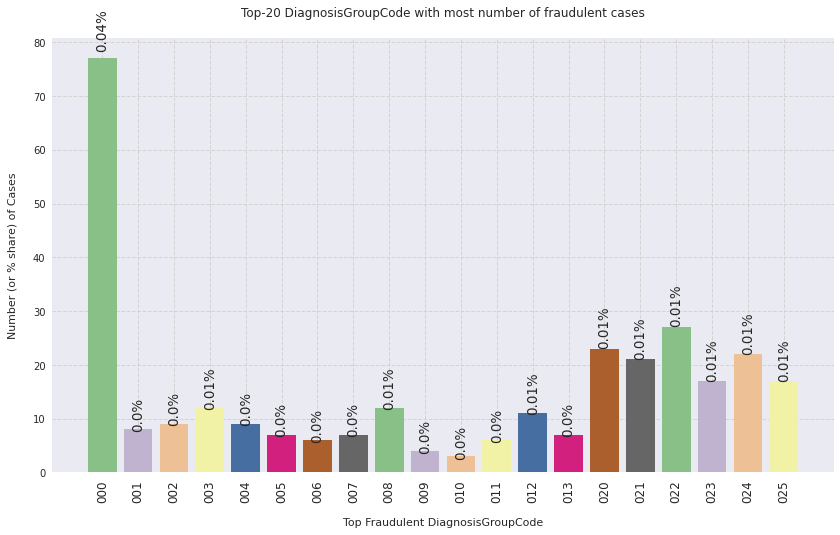

In [544]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_D.iloc[0:20], x="DiagnosisGroupCode", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent DiagnosisGroupCode")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-20 DiagnosisGroupCode with most number of fraudulent cases\n")
    plt.plot();

## Q4. Top-20 `DiagnosisGroupCode` of non-fraudulent cases

In [545]:
tmp_DN = pd.DataFrame(train_df.groupby(['DiagnosisGroupCode','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_DN.columns = ['DiagnosisGroupCode', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_DN['Cases'] = tmp_DN['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_DN['Percentage'] = round(((tmp_DN['Num_of_cases'] / tmp_DN['Cases']) * 100),2)

tmp.head()

Provider Fraud?  Num_of_cases   Cases  Percentage
0  PRV51459    Yes          8240  212796        3.87
1  PRV53797    Yes          4739  212796        2.23
2  PRV51574    Yes          4444  212796        2.09
3  PRV53918    Yes          3588  212796        1.69
4  PRV54895    Yes          3436  212796        1.61

In [546]:
tmp_DN = tmp_DN[tmp_DN['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

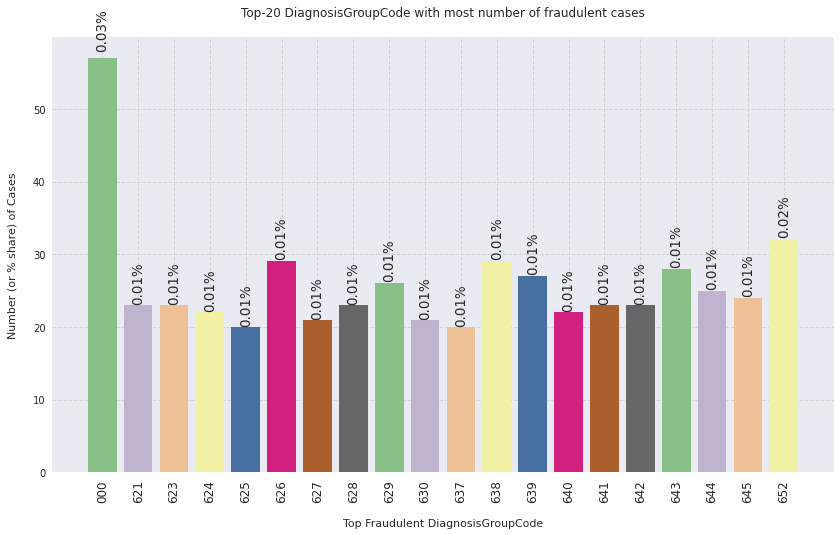

In [547]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_DN.iloc[0:20], x="DiagnosisGroupCode", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent DiagnosisGroupCode")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-20 DiagnosisGroupCode with most number of fraudulent cases\n")
    plt.plot();

In [548]:

# Here we are finding out each DignosisGroupCode Count

Count_DiagnosisGroupCode=train_df['DiagnosisGroupCode'].value_counts()
Count_DiagnosisGroupCode=Count_DiagnosisGroupCode[:20] # To show only top 20 codes 
Count_DiagnosisGroupCode

882    179
884    174
166    168
183    165
939    163
168    160
883    160
887    159
204    158
945    156
876    156
949    154
202    153
167    153
208    153
198    152
188    151
192    150
182    150
177    150
Name: DiagnosisGroupCode, dtype: int64

In [549]:
train_df['IsDiagnosisCode'] = np.where(train_df.DiagnosisGroupCode.notnull(), 1, 0)
train_df = train_df.drop(['DiagnosisGroupCode'], axis = 1) # We are droping the column "DiagnosisGroupCode"

## Q5. Top-20 `States` with fraudulent cases




In [550]:
tmp_state = pd.DataFrame(train_df.groupby(['State','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_state.columns = ['State', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_state['Cases'] = tmp_state['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_state['Percentage'] = round(((tmp_state['Num_of_cases'] / tmp_state['Cases']) * 100),2)

tmp_state.head()

State Fraud?  Num_of_cases   Cases  Percentage
0      1     No          6715       0         inf
1      1    Yes          3525  212796        1.66
2      2     No           531       0         inf
3      2    Yes           207  212796        0.10
4      3     No          7314       0         inf

In [551]:
tmp_state = tmp_state[tmp_state['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

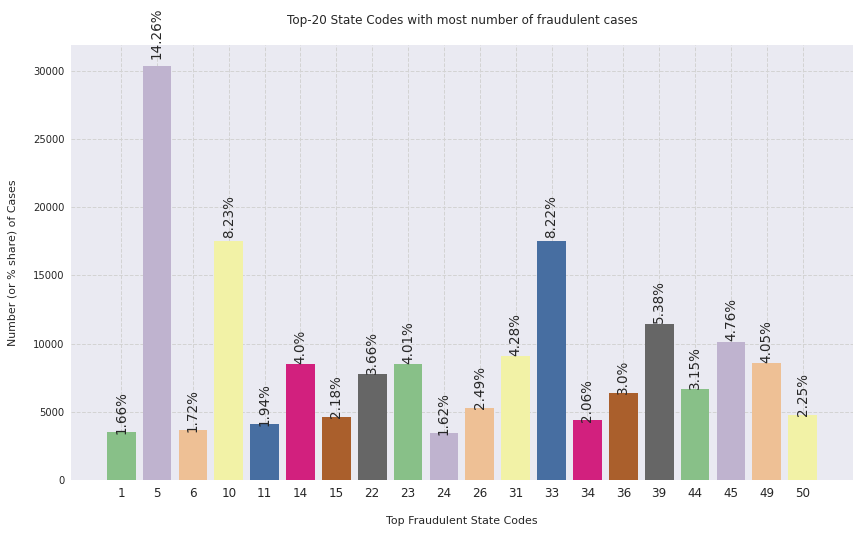

In [552]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_state.iloc[0:20], x="State", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent State Codes")
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-20 State Codes with most number of fraudulent cases\n")
    plt.plot();

## Q6. Top-20 `States` with non-fraudulent cases

In [553]:
tmp_state_n = pd.DataFrame(train_df.groupby(['State','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_state_n.columns = ['State', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_state_n['Cases'] = tmp_state_n['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_state_n['Percentage'] = round(((tmp_state_n['Num_of_cases'] / tmp_state_n['Cases']) * 100),2)

tmp_state_n.head()

State Fraud?  Num_of_cases   Cases  Percentage
0      1     No          6715       0         inf
1      1    Yes          3525  212796        1.66
2      2     No           531       0         inf
3      2    Yes           207  212796        0.10
4      3     No          7314       0         inf

In [554]:
tmp_state_n = tmp_state_n[tmp_state_n['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

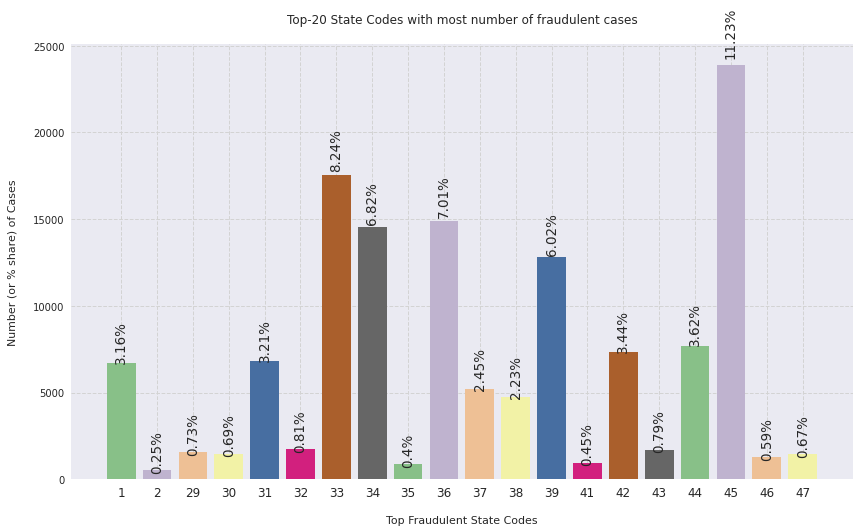

In [555]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_state_n  .iloc[0:20], x="State", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent State Codes")
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-20 State Codes with most number of fraudulent cases\n")
    plt.plot();

## Q7. Top-20 `Country` with fraudulent cases

In [556]:
tmp = pd.DataFrame(train_df.groupby(['County','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['County', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

County Fraud?  Num_of_cases   Cases  Percentage
0       0     No          6584  345415        1.91
1       0    Yes          4897  212796        2.30
2       1     No             8  345415        0.00
3       1    Yes             4  212796        0.00
4      10     No         10750  345415        3.11

In [557]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

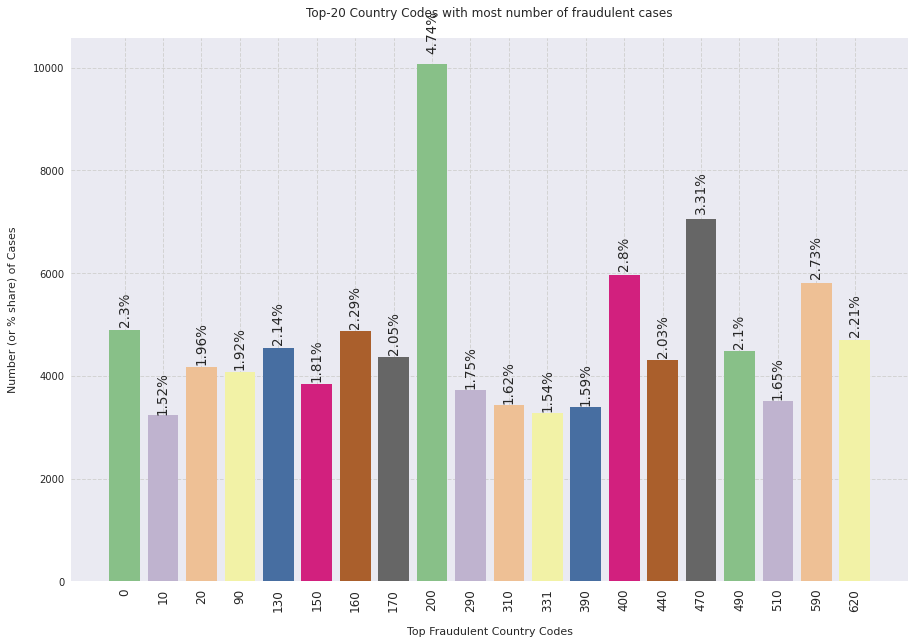

In [558]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:20], x="County", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Country Codes")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-20 Country Codes with most number of fraudulent cases\n")
    plt.plot();

## Q8. Top-20 `Country` with non-fraudulent cases

In [559]:
tmp_only_non_frauds_no = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

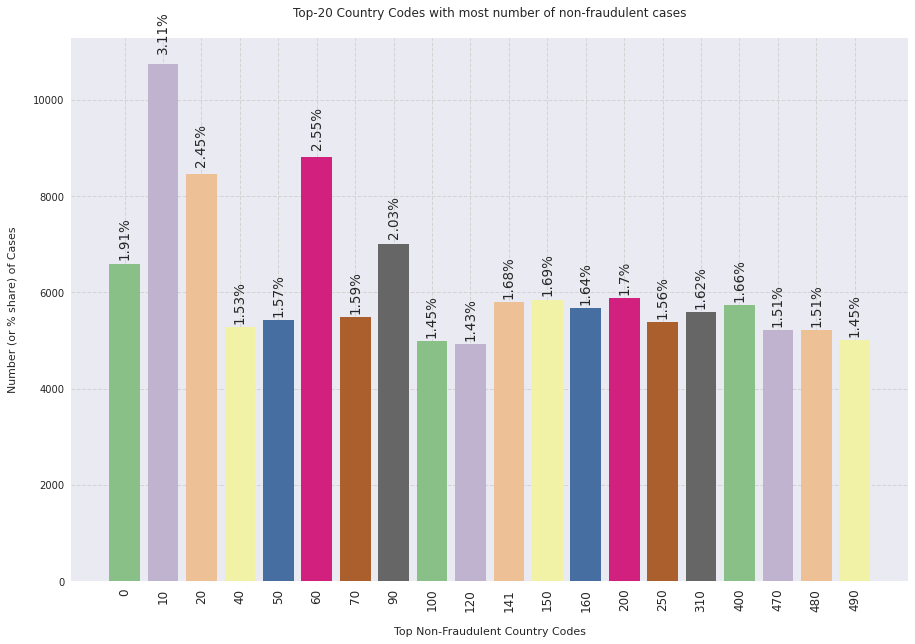

In [560]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    fig = sns.barplot(data=tmp_only_non_frauds_no.iloc[0:20], x="County", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent Country Codes")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-20 Country Codes with most number of non-fraudulent cases\n")
    plt.plot();

## Q9. How Providers rank to contributed fraud? 

There is total 5410 providers in data.

In [ ]:
train_df.groupby('PotentialFraud')['Provider'].count().reset_index()

PotentialFraud  Provider
0             No    345415
1            Yes    212796

In [ ]:
tmp_prov = pd.DataFrame(train_df.groupby(['Provider','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_prov.columns = ['Provider', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp_prov[tmp_prov['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp_prov[tmp_prov['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_prov['Cases'] = tmp_prov['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_prov['Percentage'] = round(((tmp_prov['Num_of_cases'] / tmp_prov['Cases']) * 100),2)

tmp_prov = tmp_prov[tmp_prov['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
tmp_prov.head()

Provider Fraud?  Num_of_cases   Cases  Percentage
0  PRV51459    Yes          8240  212796        3.87
1  PRV53797    Yes          4739  212796        2.23
2  PRV51574    Yes          4444  212796        2.09
3  PRV53918    Yes          3588  212796        1.69
4  PRV54895    Yes          3436  212796        1.61

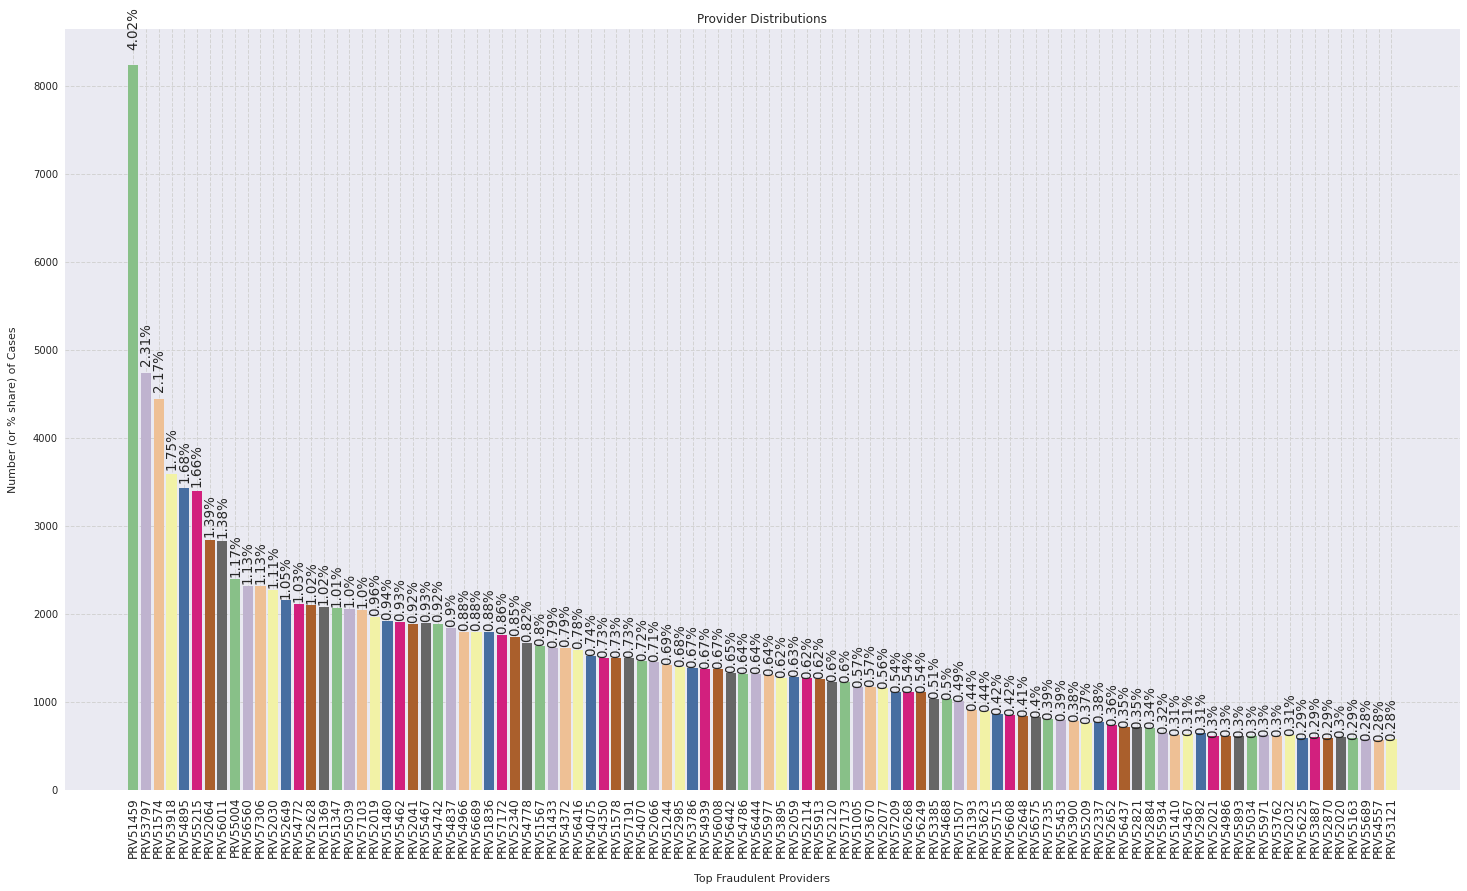

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(25,14))
    fig = sns.barplot(data=tmp_prov.iloc[0:100], x="Provider", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Provider Distributions")
    plt.plot();

The top 35 providers contributed 42,15% of all cases. The Next Top 80 contributed 24,94% of all case, and the rest of the data contributed 18,06% of all case. 

### Top 35 Providers that contributed to fraud 

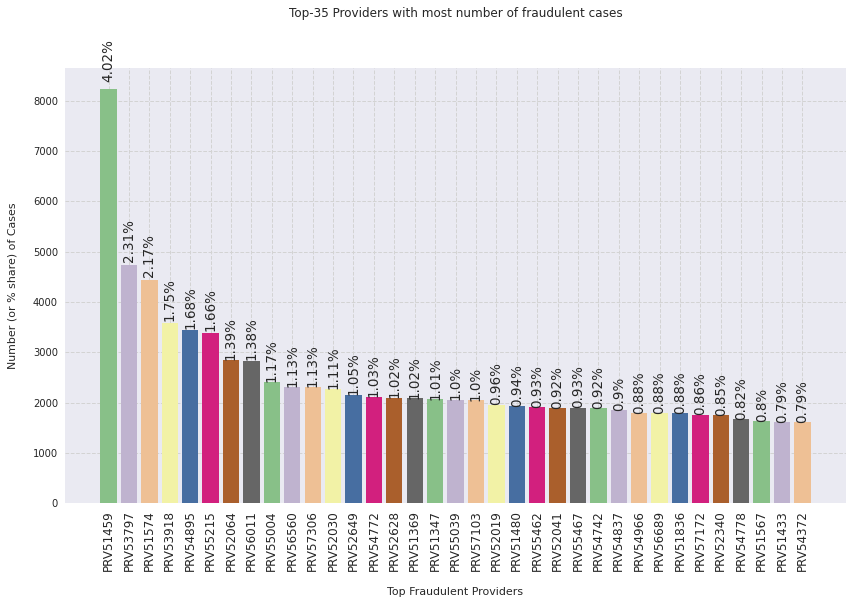

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_prov.iloc[0:35], x="Provider", y="Num_of_cases", palette='Accent', ci = None)
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-35 Providers with most number of fraudulent cases\n\n\n")
    plt.plot();

### The next top 80 Providers who contributed to fraud 

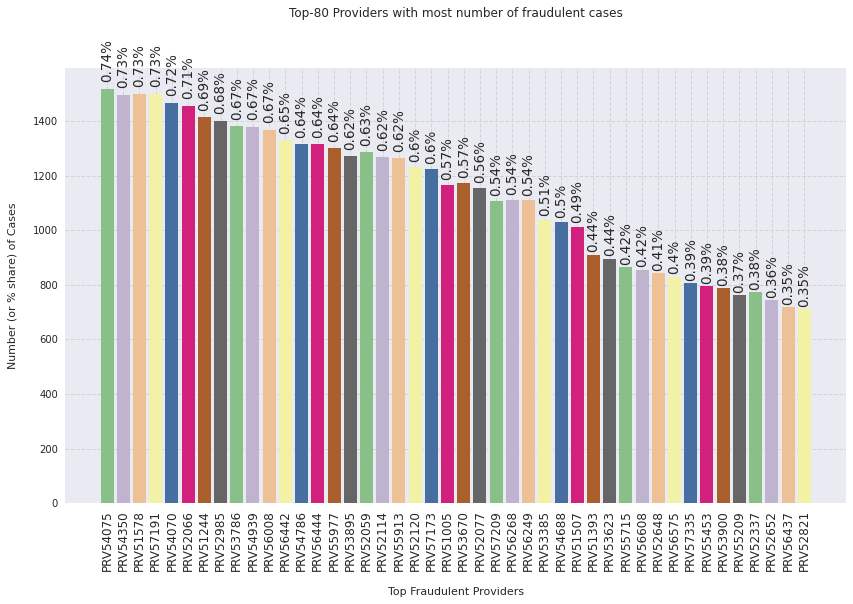

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_prov.iloc[36:80], x="Provider", y="Num_of_cases", palette='Accent', ci = None)
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-80 Providers with most number of fraudulent cases\n\n\n")
    plt.plot();

## Q10. How Fraudulent cases by medical diagnose?

In [ ]:
train_df = train_df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)



In [ ]:
# For RenalDiseaseIndicator replacing 'Y' with 1
train_df = train_df.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [ ]:
# change into numerical 
train_df[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = train_df[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

In [ ]:
train_df['Chronic_cond'] = train_df['ChronicCond_Alzheimer'] + train_df['ChronicCond_Heartfailure'] + \
                                        train_df['ChronicCond_KidneyDisease'] + train_df['ChronicCond_Cancer'] +\
                                        train_df['ChronicCond_ObstrPulmonary'] + train_df['ChronicCond_Depression'] +\
                                    train_df['ChronicCond_Diabetes'] + train_df['ChronicCond_IschemicHeart'] +\
                                    train_df['ChronicCond_Osteoporasis'] + train_df['ChronicCond_rheumatoidarthritis'] +\
                                    train_df['ChronicCond_stroke'] + train_df['RenalDiseaseIndicator']

In [ ]:
Cat = {1 : 'AlZH',
       2 : 'HF',
       3 : 'CKD',
       4 : 'Cancer',
       5 : 'ObstP',
       6 : 'Depression',
       7 : 'Diabetes',
       8 : 'HI',
       9 : 'Osteo',
       10 : 'RA',
       11 : 'Stroke',
       12 : 'RD'}

In [ ]:
train_df['co_chr'] = train_df['Chronic_cond'].map(Cat)
train_df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician AdmissionDt  ... ChronicCond_Osteoporasis  \
0            NaN  2009-04-12  ...                        0   
1            NaN         NaN  ...                        0   
2      PHY363291  2009-01-20  ...                        0   
3            NaN  2009-10-17  ...                        1   
4      PHY363291  2009-10-25  ...                        1   

   ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                                1                  1   
1                                0                  0   
2                                0                  0   
3                                0                  0   
4                                1                  0   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                    36000                  3204                       60   
1                    24000                  2136                      450   
2                    19000                  1068                      100   
3                    17000                  1068                     1050   
4                    27000                  2136                      450   

  OPAnnualDeductibleAmt PotentialFraud Chronic_cond      co_chr  
0                    70            Yes            7    Diabetes  
1                   200            Yes            4      Cancer  
2                    20            Yes            5       ObstP  
3                   540            Yes            2          HF  
4                   160            Yes            6  Depression  

[5 rows x 57 columns]

### Overall Chronic Condition Diagnose 

In [ ]:
# countplot figure
def fig_countplot(df, col, sort):
    fig = plt.figure(figsize=(18,8))
    fig.set_facecolor('white')
    if (sort): ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    else: ax = sns.countplot(data=df, x=col, palette='Set2')
    ax.set_title(col, fontsize=20)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
    # percentage
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")
    plt.title('Distribution of  Chronic Condition', fontsize=20)
    plt.show()

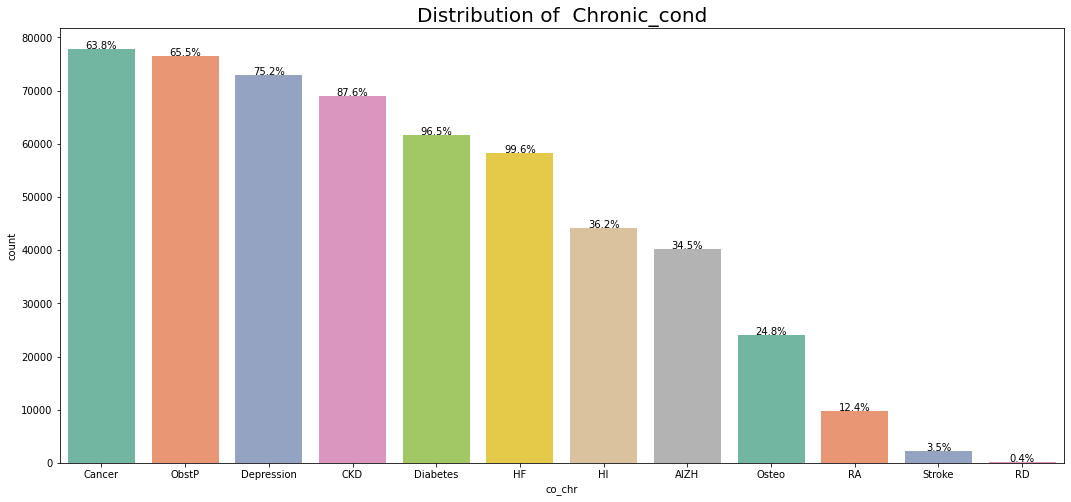

In [ ]:
fig_countplot(train_df, 'co_chr', 1)

In [ ]:
tmp_crd = pd.DataFrame(train_df.groupby(['Provider','co_chr','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_crd.columns = ['Provider','Chronic_cond', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp_crd[tmp_crd['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp_crd[tmp_crd['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_crd['Cases'] = tmp_crd['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_crd['Percentage'] = round(((tmp_crd['Num_of_cases'] / tmp_crd['Cases']) * 100),2)

tmp_crd = tmp_crd[tmp_crd['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
tmp_crd.head()

Provider Chronic_cond Fraud?  Num_of_cases   Cases  Percentage
0  PRV51459       Cancer    Yes          1219  204945        0.59
1  PRV51459        ObstP    Yes          1162  204945        0.57
2  PRV51459   Depression    Yes          1003  204945        0.49
3  PRV51459          CKD    Yes           960  204945        0.47
4  PRV51459           HF    Yes           951  204945        0.46

### Fraud Case by Chronic Conditions : Top 35

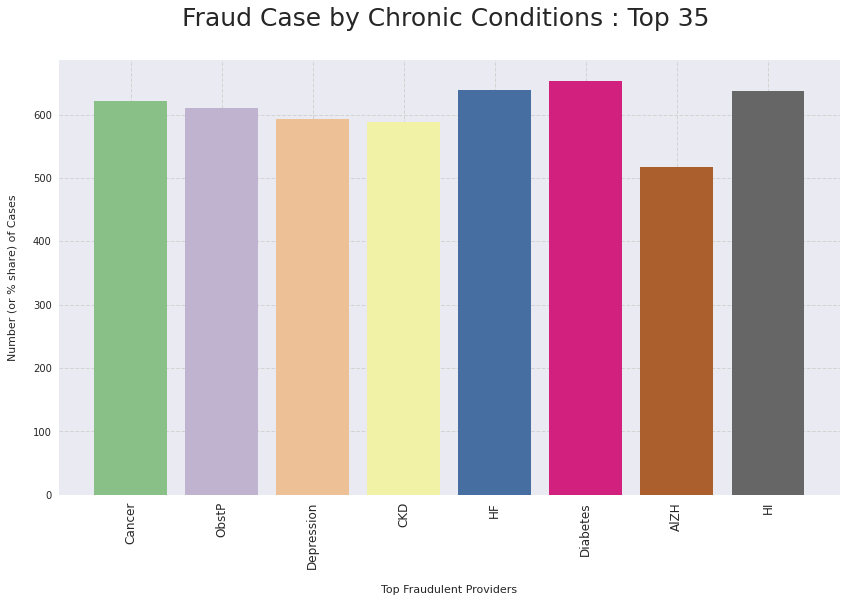

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_crd.iloc[0:35], x="Chronic_cond", y="Num_of_cases", palette='Accent', ci = None)    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Fraud Case by Chronic Conditions : Top 35 \n", fontsize = 25)
    plt.plot();

### Fraud Case by Chronic Conditions : Top 80

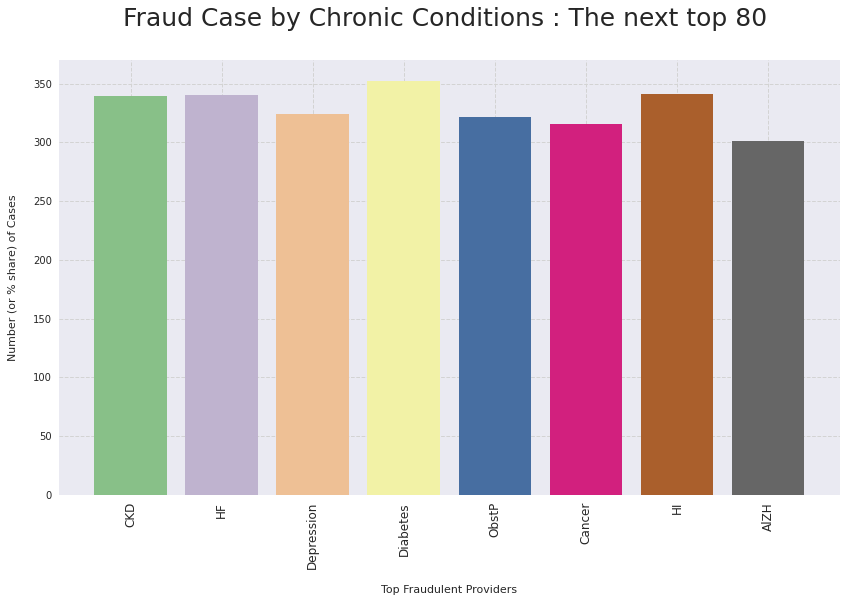

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_crd.iloc[36:80], x="Chronic_cond", y="Num_of_cases", palette='Accent', ci = None)
   
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Fraud Case by Chronic Conditions : The next top 80 \n", fontsize = 25)
    plt.plot();

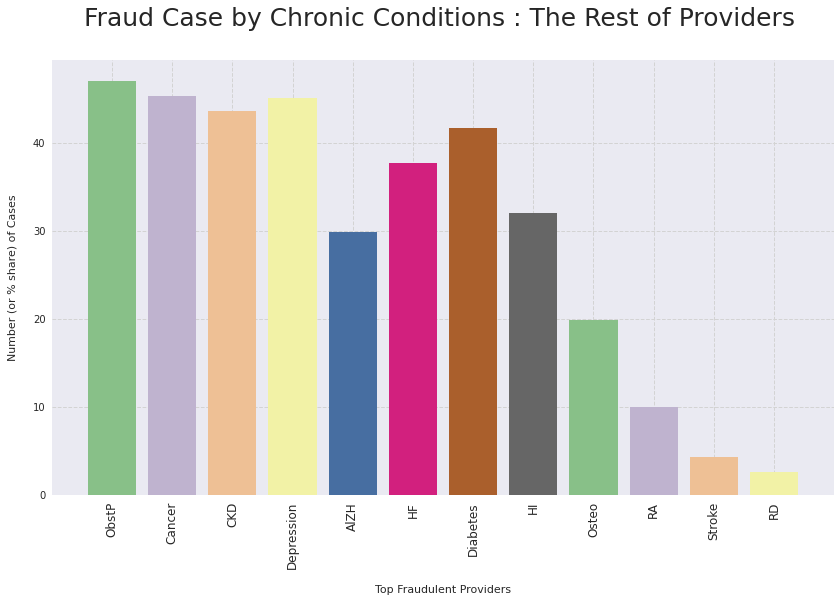

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_crd.iloc[81:], x="Chronic_cond", y="Num_of_cases", palette='Accent', ci = None)    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Fraud Case by Chronic Conditions : The Rest of Providers \n", fontsize = 25)
    plt.plot();

## Q11. How fraudulent cases effect by claim duration

In [ ]:
train_df['ClaimStartDt'] = pd.to_datetime(train_df['ClaimStartDt'], format="%Y-%m-%d")
train_df['ClaimEndDt'] = pd.to_datetime(train_df['ClaimEndDt'], format="%Y-%m-%d")
train_df['ClaimStartDt'] = pd.to_datetime(train_df['ClaimStartDt'], format="%Y-%m-%d")
train_df['ClaimEndDt'] = pd.to_datetime(train_df['ClaimEndDt'], format="%Y-%m-%d")

In [ ]:
train_df['Claim_Duration'] = (train_df['ClaimEndDt'] - train_df['ClaimStartDt']).dt.days

In [ ]:
train_df['Claim_Duration'].describe()

count    558211.000000
mean          1.727940
std           4.904984
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: Claim_Duration, dtype: float64

### Overall Claim Duration Distribution

In [ ]:
tmp_clmd = pd.DataFrame(train_df.groupby(['Provider','Claim_Duration','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_clmd.columns = ['Provider','Claim_Duration', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp_clmd[tmp_clmd['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp_clmd[tmp_clmd['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_clmd['Cases'] = tmp_clmd['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_clmd['Percentage'] = round(((tmp_clmd['Num_of_cases'] / tmp_clmd['Cases']) * 100),2)

tmp_clmd = tmp_clmd[tmp_clmd['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
tmp_clmd

Provider  Claim_Duration Fraud?  Num_of_cases   Cases  Percentage
0     PRV51459               0    Yes          7247  212796        3.41
1     PRV53797               0    Yes          4206  212796        1.98
2     PRV51574               0    Yes          3860  212796        1.81
3     PRV53918               0    Yes          3167  212796        1.49
4     PRV54895               0    Yes          3024  212796        1.42
...        ...             ...    ...           ...     ...         ...
8040  PRV53397               0    Yes             7  212796        0.00
8041  PRV53385              35    Yes             1  212796        0.00
8042  PRV53385              32    Yes             1  212796        0.00
8043  PRV53385              29    Yes             1  212796        0.00
8044  PRV57709              35    Yes             2  212796        0.00

[8045 rows x 6 columns]

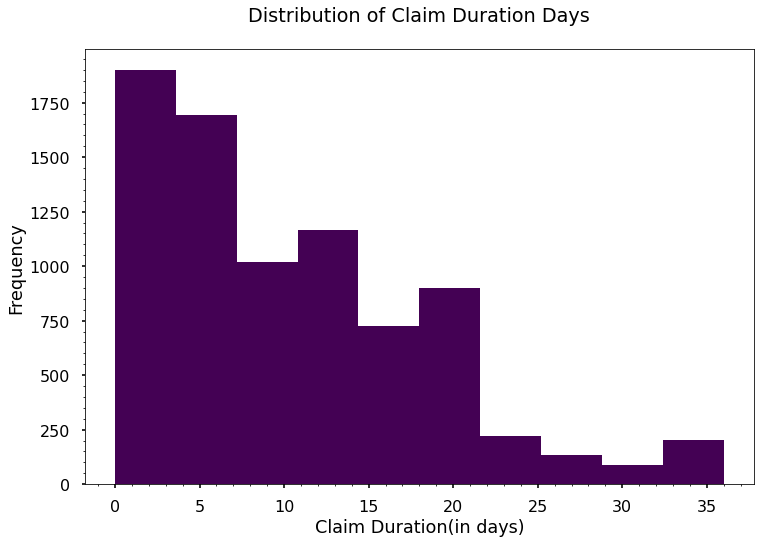

In [ ]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    tmp_clmd['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)")
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n")
    plt.plot();

### Fraud Case by Claim Duration : Top 35

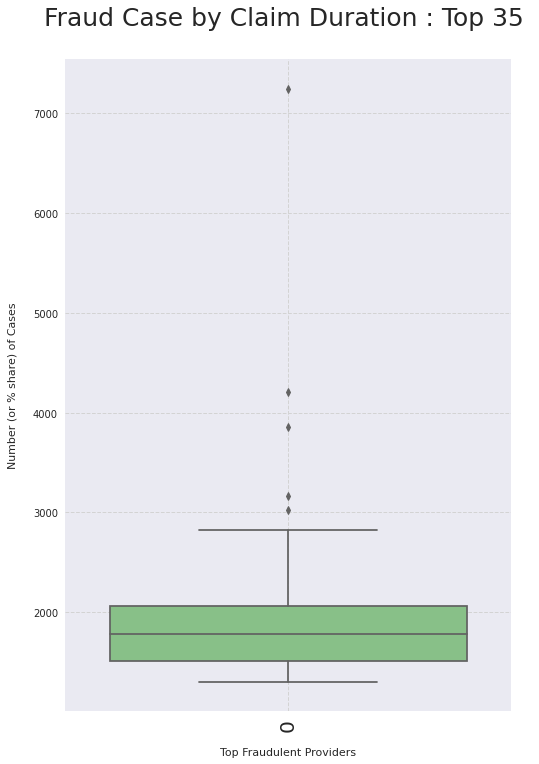

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,12))
    fig = sns.boxplot(data=tmp_clmd.iloc[0:35], x="Claim_Duration", y="Num_of_cases", palette='Accent')    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=20)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Fraud Case by Claim Duration : Top 35 \n", fontsize = 25)
    plt.plot();

### Fraud Case by Chronic Conditions : Top 80

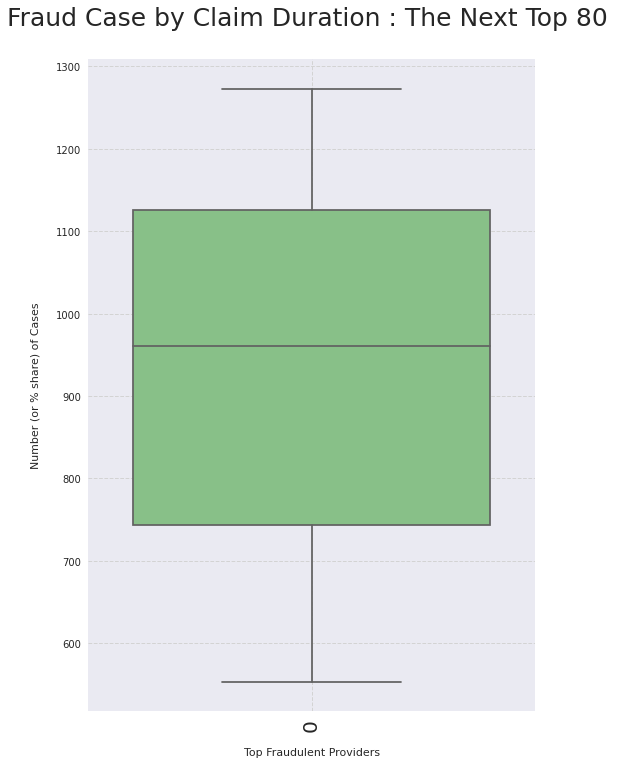

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,12))
    fig = sns.boxplot(data=tmp_clmd.iloc[36:80], x="Claim_Duration", y="Num_of_cases", palette='Accent')    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=20)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Fraud Case by Claim Duration : The Next Top 80 \n", fontsize = 25)
    plt.plot();

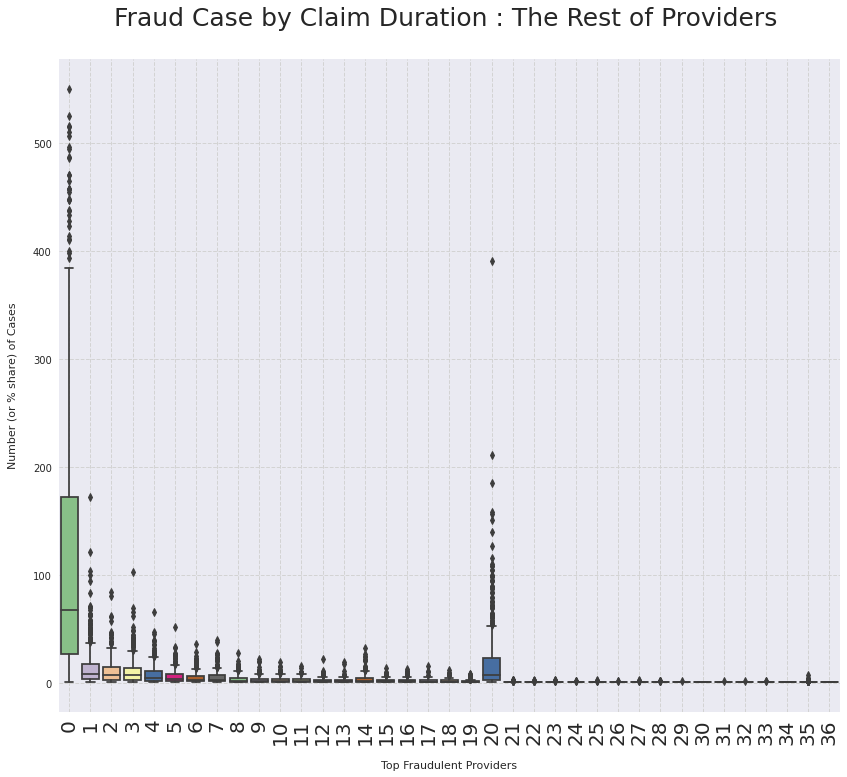

In [ ]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,12))
    fig = sns.boxplot(data=tmp_clmd.iloc[81 : ], x="Claim_Duration", y="Num_of_cases", palette='Accent')    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=20)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Fraud Case by Claim Duration : The Rest of Providers \n", fontsize = 25)
    plt.plot();

In [ ]:
train_IP = pd.merge(Train_Inpatient, Train)

In [ ]:
train_IP['ClaimStartDt'] = pd.to_datetime(train_IP['ClaimStartDt'], format="%Y-%m-%d")
train_IP['ClaimEndDt'] = pd.to_datetime(train_IP['ClaimEndDt'], format="%Y-%m-%d")
train_IP['ClaimStartDt'] = pd.to_datetime(train_IP['ClaimStartDt'], format="%Y-%m-%d")
train_IP['ClaimEndDt'] = pd.to_datetime(train_IP['ClaimEndDt'], format="%Y-%m-%d")

In [ ]:
train_IP['Claim_Duration'] = (train_IP['ClaimEndDt'] - train_IP['ClaimStartDt']).dt.days

In [ ]:
train_IP['Claim_Duration'].describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_Duration, dtype: float64

In [ ]:
tmp_clmd = pd.DataFrame(train_IP.groupby(['Provider','Claim_Duration','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_clmd.columns = ['Provider','Claim_Duration', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp_clmd[tmp_clmd['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp_clmd[tmp_clmd['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_clmd['Cases'] = tmp_clmd['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_clmd['Percentage'] = round(((tmp_clmd['Num_of_cases'] / tmp_clmd['Cases']) * 100),2)

tmp_clmd = tmp_clmd[tmp_clmd['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
tmp_clmd.head()

Provider  Claim_Duration Fraud?  Num_of_cases  Cases  Percentage
0  PRV52019               3    Yes            96  23402        0.41
1  PRV55462               2    Yes            77  23402        0.33
2  PRV52019               2    Yes            66  23402        0.28
3  PRV53706               3    Yes            63  23402        0.27
4  PRV55462               3    Yes            64  23402        0.27

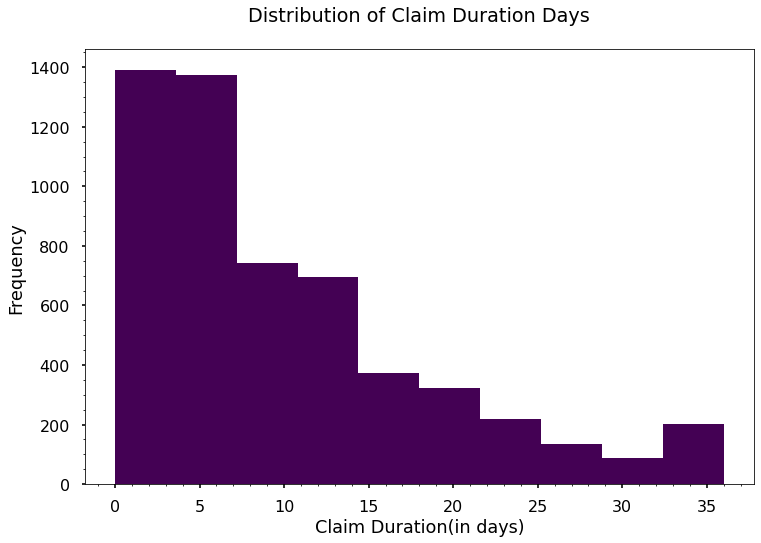

In [ ]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    tmp_clmd['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)")
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n")
    plt.plot();

## Q12. How Fraudulent cases by Amount of reimbursement

### Overall Amount of Reimbursement 

In [ ]:
tmp_reim = pd.DataFrame(train_df.groupby(['Provider','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt','PotentialFraud'])['BeneID'].count()).reset_index()
tmp_reim.columns = ['Provider','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp_reim[tmp_reim['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp_reim[tmp_reim['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp_reim['Cases'] = tmp_reim['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp_reim['Percentage'] = round(((tmp_reim['Num_of_cases'] / tmp_reim['Cases']) * 100),2)

tmp_reim = tmp_reim[tmp_reim['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
tmp_reim.head()

Provider  IPAnnualReimbursementAmt  OPAnnualReimbursementAmt Fraud?  \
0  PRV51459                         0                       300    Yes   
1  PRV51459                         0                       100    Yes   
2  PRV51459                         0                       160    Yes   
3  PRV51459                         0                       500    Yes   
4  PRV51459                         0                       400    Yes   

   Num_of_cases   Cases  Percentage  
0            57  212796        0.03  
1            64  212796        0.03  
2            61  212796        0.03  
3            57  212796        0.03  
4            56  212796        0.03

In [ ]:
alz = ['OPAnnualReimbursementAmt','IPAnnualReimbursementAmt']

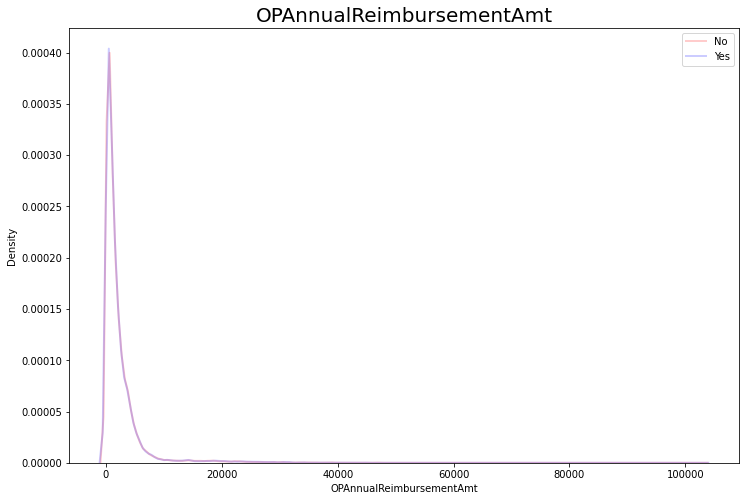

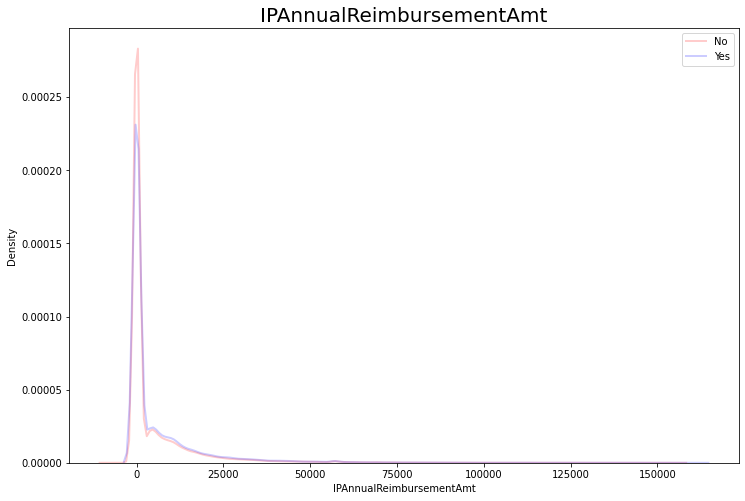

In [ ]:
for col in alz: 
  fig = plt.figure(figsize=(12,8))
  fig.set_facecolor('white')

  ax = sns.kdeplot(data=train_df, x=(train_df[col][train_df['PotentialFraud'] == 'No']), alpha=0.2, linewidth=2, color='red')
  ax = sns.kdeplot(data=train_df, x=(train_df[col][train_df['PotentialFraud'] == 'Yes']), alpha=0.2, linewidth=2, color='blue')
    
  ax.set_title(col, fontsize=20)
  ax.legend(['No', 'Yes'], loc='upper right')
  plt.show()

In [ ]:
train_df['PotentialFraud'].unique()

array(['Yes', 'No'], dtype=object)

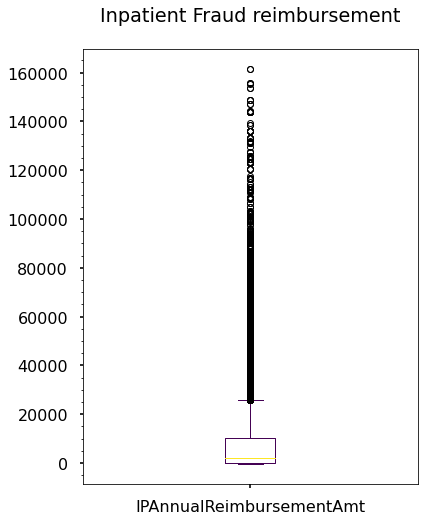

In [ ]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(6,8))
    tmp_reim['IPAnnualReimbursementAmt'].plot(kind='box', colormap="viridis");
    # Providing the labels and title to the graph
    plt.minorticks_on()
    plt.title("Inpatient Fraud reimbursement\n")
    plt.plot();

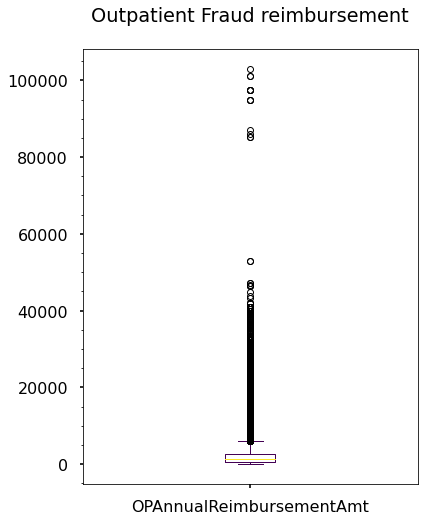

In [ ]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(6,8))
    tmp_reim['OPAnnualReimbursementAmt'].plot(kind='box', colormap="viridis");
    # Providing the labels and title to the graph
    plt.minorticks_on()
    plt.title("Outpatient Fraud reimbursement\n")
    plt.plot();

# F. Data Pre-processing 

### Feature Enginering

In [561]:
# Make Claim Duration 

Test_Inpatient['ClaimStartDt'] = pd.to_datetime(Test_Inpatient['ClaimStartDt'], format="%Y-%m-%d")
Test_Inpatient['ClaimEndDt'] = pd.to_datetime(Test_Inpatient['ClaimEndDt'], format="%Y-%m-%d")
Test_Inpatient['ClaimStartDt'] = pd.to_datetime(Test_Inpatient['ClaimStartDt'], format="%Y-%m-%d")
Test_Inpatient['ClaimEndDt'] = pd.to_datetime(Test_Inpatient['ClaimEndDt'], format="%Y-%m-%d")

In [562]:
Test_Inpatient['Claim_Duration'] = (Test_Inpatient['ClaimEndDt'] - Test_Inpatient['ClaimStartDt']).dt.days
Test_Inpatient['Claim_Duration'] = (Test_Inpatient['ClaimEndDt'] - Test_Inpatient['ClaimStartDt']).dt.days

In [563]:
Test_Outpatient['ClaimStartDt'] = pd.to_datetime(Test_Outpatient['ClaimStartDt'], format="%Y-%m-%d")
Test_Outpatient['ClaimEndDt'] = pd.to_datetime(Test_Outpatient['ClaimEndDt'], format="%Y-%m-%d")
Test_Outpatient['ClaimStartDt'] = pd.to_datetime(Test_Outpatient['ClaimStartDt'], format="%Y-%m-%d")
Test_Outpatient['ClaimEndDt'] = pd.to_datetime(Test_Outpatient['ClaimEndDt'], format="%Y-%m-%d")

In [564]:
Test_Outpatient['Claim_Duration'] = (Test_Outpatient['ClaimEndDt'] - Test_Outpatient['ClaimStartDt']).dt.days
Test_Outpatient['Claim_Duration'] = (Test_Outpatient['ClaimEndDt'] - Test_Outpatient['ClaimStartDt']).dt.days

In [565]:
# add Diagnose Code 
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

In [566]:
Test_Inpatient["ClmDiagnosisCode_1"].head()

0     5780
1     1889
2     4010
3     8208
4    29654
Name: ClmDiagnosisCode_1, dtype: object

In [567]:
# We will drop missing value on DiagnoseCode
ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Test_Inpatient["ClmDiagnosisCode_1"], 
                                           Test_Inpatient["ClmDiagnosisCode_2"], 
                                           Test_Inpatient["ClmDiagnosisCode_3"], 
                                           Test_Inpatient["ClmDiagnosisCode_4"],
                                           Test_Inpatient["ClmDiagnosisCode_5"], 
                                           Test_Inpatient["ClmDiagnosisCode_6"],
                                           Test_Inpatient["ClmDiagnosisCode_7"],
                                           Test_Inpatient["ClmDiagnosisCode_8"],
                                           Test_Inpatient["ClmDiagnosisCode_9"],
                                           Test_Inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [568]:
# add Diagnose Code 
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

In [569]:
# We will drop missing value on DiagnoseCode
ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([Test_Outpatient["ClmDiagnosisCode_1"], 
                                           Test_Outpatient["ClmDiagnosisCode_2"], 
                                           Test_Outpatient["ClmDiagnosisCode_3"], 
                                           Test_Outpatient["ClmDiagnosisCode_4"],
                                           Test_Outpatient["ClmDiagnosisCode_5"], 
                                           Test_Outpatient["ClmDiagnosisCode_6"],
                                           Test_Outpatient["ClmDiagnosisCode_7"],
                                           Test_Outpatient["ClmDiagnosisCode_8"],
                                           Test_Outpatient["ClmDiagnosisCode_9"],
                                           Test_Outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [570]:
# PROVIDER <--> other features :: To get claim counts
train_df["ClmCount_Provider"]=train_df.groupby(['Provider'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID"]=train_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_AttendingPhysician"]=train_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_OtherPhysician"]=train_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_OperatingPhysician"]=train_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
train_df["ClmCount_Provider_BeneID_AttendingPhysician"]=train_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_OtherPhysician"]=train_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_OperatingPhysician"]=train_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

In [571]:
train_df["ClmCount_Provider"]=train_df.groupby(['Provider'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID"]=train_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_AttendingPhysician"]=train_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_OtherPhysician"]=train_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_OperatingPhysician"]=train_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmAdmitDiagnosisCode"]=train_df.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmProcedureCode_1"]=train_df.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmProcedureCode_2"]=train_df.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmProcedureCode_3"]=train_df.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_1"]=train_df.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_2"]=train_df.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_3"]=train_df.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_4"]=train_df.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_5"]=train_df.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_6"]=train_df.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_7"]=train_df.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_8"]=train_df.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_9"]=train_df.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_10"]=train_df.groupby(['Provider','ClmDiagnosisCode_10'])['ClaimID'].transform('count')

In [572]:
# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
train_df["ClmCount_Provider_BeneID_AttendingPhysician"]=train_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_OtherPhysician"]=train_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_OperatingPhysician"]=train_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

In [573]:
# mergering test dataset 
Test_patient_merge_id = [i for i in Test_Outpatient.columns if i in Train_Inpatient.columns]

# Merge Inpatient, Outpatient and beneficiary dataframe into a single patient dataset
Test_Patient_data = pd.merge(Test_Inpatient, Train_Outpatient,
                    left_on = Test_patient_merge_id,
                    right_on = Test_patient_merge_id,
                    how = 'outer').\
          merge(Test_Beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [574]:
test_df = pd.merge(Test_Patient_data, Test)

In [575]:
# PROVIDER <--> other features :: To get claim counts
test_df["ClmCount_Provider"]=test_df.groupby(['Provider'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID"]=test_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_AttendingPhysician"]=test_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_OtherPhysician"]=test_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_OperatingPhysician"]=test_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> PHYSICIANS :: To get claim counts
test_df["ClmCount_Provider_BeneID_AttendingPhysician"]=test_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID_OtherPhysician"]=test_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID_OperatingPhysician"]=test_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')

In [576]:
test_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'AdmitForDays', 'Claim_Duration', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'Ch

In [577]:
train_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'AdmitForDays', 'Claim_Duration', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression',

## Missing Value 

In [578]:
df_null = train_df.isnull().sum().reset_index()
df_null.columns = ['feature','missing_value']
df_null['percentage'] = round((df_null['missing_value']/len(train_df))*100,2)
df_null = df_null.sort_values('percentage', ascending=False).reset_index(drop=True)
df_null = df_null[df_null['percentage']>0]
df_null

feature  missing_value  percentage
0                            ClmProcedureCode_6         558211      100.00
1                            ClmProcedureCode_5         558202      100.00
2                            ClmProcedureCode_4         558093       99.98
3          ClmCount_Provider_ClmProcedureCode_3         557242       99.83
4                            ClmProcedureCode_3         557242       99.83
5                           ClmDiagnosisCode_10         553201       99.10
6         ClmCount_Provider_ClmDiagnosisCode_10         553201       99.10
7                            ClmProcedureCode_2         552721       99.02
8          ClmCount_Provider_ClmProcedureCode_2         552721       99.02
9                            ClmProcedureCode_1         534901       95.82
10         ClmCount_Provider_ClmProcedureCode_1         534901       95.82
11                                 AdmitForDays         517737       92.75
12                                  AdmissionDt         517737       92.75
13                                  DischargeDt         517737       92.75
14         ClmCount_Provider_ClmDiagnosisCode_9         516396       92.51
15                           ClmDiagnosisCode_9         516396       92.51
16                           ClmDiagnosisCode_8         504767       90.43
17         ClmCount_Provider_ClmDiagnosisCode_8         504767       90.43
18         ClmCount_Provider_ClmDiagnosisCode_7         492034       88.14
19                           ClmDiagnosisCode_7         492034       88.14
20         ClmCount_Provider_ClmDiagnosisCode_6         473819       84.88
21                           ClmDiagnosisCode_6         473819       84.88
22                           ClmDiagnosisCode_5         446287       79.95
23         ClmCount_Provider_ClmDiagnosisCode_5         446287       79.95
24  ClmCount_Provider_BeneID_OperatingPhysician         443764       79.50
25         ClmCount_Provider_OperatingPhysician         443764       79.50
26                           OperatingPhysician         443764       79.50
27      ClmCount_Provider_ClmAdmitDiagnosisCode         412312       73.86
28                        ClmAdmitDiagnosisCode         412312       73.86
29                           ClmDiagnosisCode_4         393675       70.52
30         ClmCount_Provider_ClmDiagnosisCode_4         393675       70.52
31      ClmCount_Provider_BeneID_OtherPhysician         358475       64.22
32                               OtherPhysician         358475       64.22
33             ClmCount_Provider_OtherPhysician         358475       64.22
34         ClmCount_Provider_ClmDiagnosisCode_3         315156       56.46
35                           ClmDiagnosisCode_3         315156       56.46
36         ClmCount_Provider_ClmDiagnosisCode_2         195606       35.04
37                           ClmDiagnosisCode_2         195606       35.04
38                           ClmDiagnosisCode_1          10453        1.87
39         ClmCount_Provider_ClmDiagnosisCode_1          10453        1.87
40                           AttendingPhysician           1508        0.27
41  ClmCount_Provider_BeneID_AttendingPhysician           1508        0.27
42         ClmCount_Provider_AttendingPhysician           1508        0.27
43                            DeductibleAmtPaid            899        0.16

Since we already get Age and Mortality status, we will drop DOD feature

In [579]:
train_df = train_df.drop(['DOD'], axis=1)
test_df = test_df.drop(['DOD'], axis=1)

AS i explain before the missing value on dataset occurs because of the nllable field, when the features not filled with value it will condiser as null, to handle this missing value: 
1. We will drop data with missing value more than 98%
2. Filled the other missing value with new value for example 0, to show that person not get claim with diagnose code 1


In [580]:
## We are replacing these columns value with 0 and 1 where we have value we are replacing it with 1 and in place of null value we replace it with 0.


train_df[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = np.where(train_df[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].isnull(), 0, 1)
test_df[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = np.where(test_df[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].isnull(), 0, 1)

In [581]:
train_df.fillna(value=0, inplace=True)
test_df.fillna(value=0, inplace=True)

## Encoding 

In [582]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
train_df['Gender'] = train_df['Gender'].apply(lambda val: 0 if val == 2 else val)
train_df['PotentialFraud'] = train_df['PotentialFraud'].apply(lambda val: 0 if val == "No" else 1)
train_df['Dead_or_Alive'] = train_df['Dead_or_Alive'].apply(lambda val: 0 if val == "No" else 1)

train_df['ChronicCond_Alzheimer'] = train_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_Heartfailure'] = train_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_KidneyDisease'] = train_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_Cancer'] = train_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_ObstrPulmonary'] = train_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_Depression'] = train_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_Diabetes'] = train_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_IschemicHeart'] = train_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_Osteoporasis'] = train_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_rheumatoidarthritis'] = train_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
train_df['ChronicCond_stroke'] = train_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)

In [583]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
test_df['Gender'] = test_df['Gender'].apply(lambda val: 0 if val == 2 else val)
test_df['Dead_or_Alive'] = test_df['Dead_or_Alive'].apply(lambda val: 0 if val == "No" else 1)

test_df['ChronicCond_Alzheimer'] = test_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_Heartfailure'] = test_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_KidneyDisease'] = test_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_Cancer'] = test_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_ObstrPulmonary'] = test_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_Depression'] = test_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_Diabetes'] = test_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_IschemicHeart'] = test_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_Osteoporasis'] = test_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_rheumatoidarthritis'] = test_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
test_df['ChronicCond_stroke'] = test_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)

In [584]:
train_df['N_Types_Physicians'] = train_df['AttendingPhysician'] +  train_df['OperatingPhysician'] + train_df['OtherPhysician']

train_df['N_Types_Physicians']

0         1
1         2
2         3
3         2
4         3
         ..
558206    2
558207    2
558208    1
558209    1
558210    2
Name: N_Types_Physicians, Length: 558211, dtype: int64

In [585]:
# Encoding the Categorical features
train_df = pd.get_dummies(train_df,columns=['Gender', 'Race'], drop_first=True)

In [586]:
test_df = pd.get_dummies(test_df,columns=['Gender', 'Race'], drop_first=True)

## Feature Selecting 

In [587]:
train_df = train_df.drop(['BeneID','ClaimID','ClaimStartDt','ClaimEndDt','Provider','DOB','DischargeDt'], axis=1)
test_df = test_df.drop(['BeneID','ClaimID','ClaimStartDt','ClaimEndDt','Provider','DOB','DischargeDt'], axis=1)

In [588]:
train_df = train_df.drop(['AdmissionDt','ClmAdmitDiagnosisCode'], axis=1)
test_df = test_df.drop(['AdmissionDt','ClmAdmitDiagnosisCode'], axis=1)

In [589]:
train_df = train_df.drop(['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'], axis=1)
test_df = test_df.drop(['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'], axis=1)


In [590]:
train_df.head()

InscClaimAmtReimbursed  AttendingPhysician  OperatingPhysician  \
0                   26000                   1                   0   
1                      50                   1                   1   
2                   19000                   1                   1   
3                   17000                   1                   1   
4                   13000                   1                   1   

   OtherPhysician  DeductibleAmtPaid  ClmProcedureCode_1  ClmProcedureCode_2  \
0               0             1068.0                 0.0                 0.0   
1               0                0.0                 0.0                 0.0   
2               1             1068.0              7769.0              5849.0   
3               0             1068.0              9338.0                 0.0   
4               1             1068.0              8154.0                 0.0   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  ...  \
0                 0.0                 0.0                 0.0  ...   
1                 0.0                 0.0                 0.0  ...   
2                 0.0                 0.0                 0.0  ...   
3                 0.0                 0.0                 0.0  ...   
4                 0.0                 0.0                 0.0  ...   

   ClmCount_Provider_ClmDiagnosisCode_6  ClmCount_Provider_ClmDiagnosisCode_7  \
0                                   1.0                                   1.0   
1                                   1.0                                   1.0   
2                                   1.0                                   1.0   
3                                   1.0                                   1.0   
4                                   2.0                                   3.0   

   ClmCount_Provider_ClmDiagnosisCode_8  ClmCount_Provider_ClmDiagnosisCode_9  \
0                                   1.0                                   1.0   
1                                   1.0                                   1.0   
2                                   1.0                                   1.0   
3                                   1.0                                   3.0   
4                                   0.0                                   0.0   

   ClmCount_Provider_ClmDiagnosisCode_10  N_Types_Physicians  Gender_1  \
0                                    0.0                   1         1   
1                                    0.0                   2         1   
2                                    0.0                   3         0   
3                                    0.0                   2         1   
4                                    0.0                   3         0   

   Race_2  Race_3  Race_5  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

[5 rows x 65 columns]

In [591]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 65 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   InscClaimAmtReimbursed                       558211 non-null  int64  
 1   AttendingPhysician                           558211 non-null  int64  
 2   OperatingPhysician                           558211 non-null  int64  
 3   OtherPhysician                               558211 non-null  int64  
 4   DeductibleAmtPaid                            558211 non-null  float64
 5   ClmProcedureCode_1                           558211 non-null  float64
 6   ClmProcedureCode_2                           558211 non-null  float64
 7   ClmProcedureCode_3                           558211 non-null  float64
 8   ClmProcedureCode_4                           558211 non-null  float64
 9   ClmProcedureCode_5                           558211 non-nul

## Splitting Dataset 

In [592]:
X = train_df.drop(axis=1, columns=['PotentialFraud'])
y = train_df['PotentialFraud']

In [593]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state=39)

In [594]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((446568, 64), (111643, 64), (446568,), (111643,))

# G. Baseline Model 

In this modeling we will use **F1_score** as model evaluation 

Reason :  
- The cost of miss classification is very high, so we should avoid error detecting a provider that is not a fraudulent but is detected as a fraudulent (FN)
- as well as error detecting fraudulent detected not as fraudulent. 
- The error  prediction will cause a huge financial loss for insurer and also will affect the reputation of the investigation agency. 

In [595]:
models = []
precision = []

## 1. Logistic Regression

In [596]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [597]:
# Training the model with all features and hyper-parameterized values
log_reg_1 = LogisticRegression(C=0.03, penalty='l1',
                               fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                               class_weight='balanced',
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_1.fit(X_train, y_train)

LogisticRegression(C=0.03, class_weight='balanced', intercept_scaling=1.0,
                   max_iter=500, penalty='l1', random_state=49,
                   solver='liblinear')

### Train AUC = 0.880742616234935
### Test AUC = 0.8821710837181905


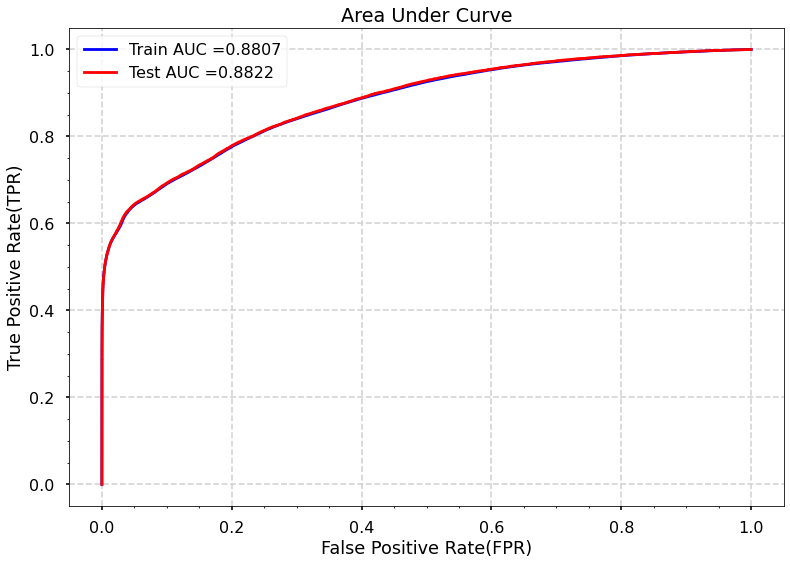

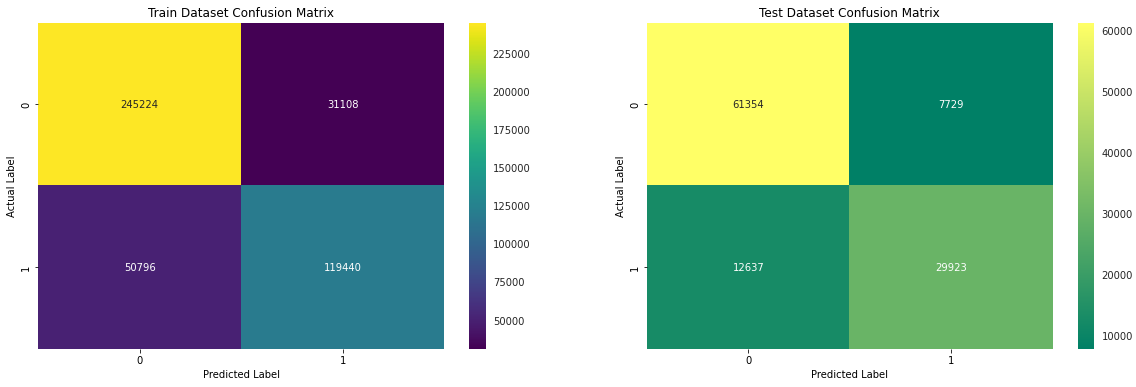



### Best Threshold = 0.5651
### Model AUC is : 0.8822
### Model Train F1 Score is : 0.7447
### Model Test F1 Score is : 0.7461


In [598]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_1, X_train, X_test, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

## 2. XGBoost

In [599]:
from xgboost import XGBClassifier

In [600]:
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

XGBClassifier(class_weight='balanced', max_depth=6,
                       max_features='auto', min_samples_leaf=100,
                       min_samples_split=50, random_state=49)

XGBClassifier(class_weight='balanced', max_depth=6, max_features='auto',
              min_samples_leaf=100, min_samples_split=50, random_state=49)

### Train AUC = 0.932123790213508
### Test AUC = 0.9327222398190734


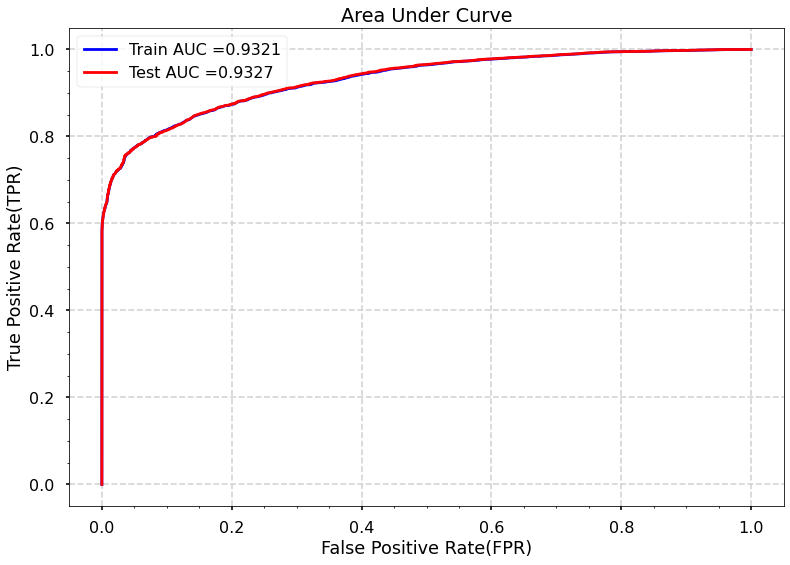

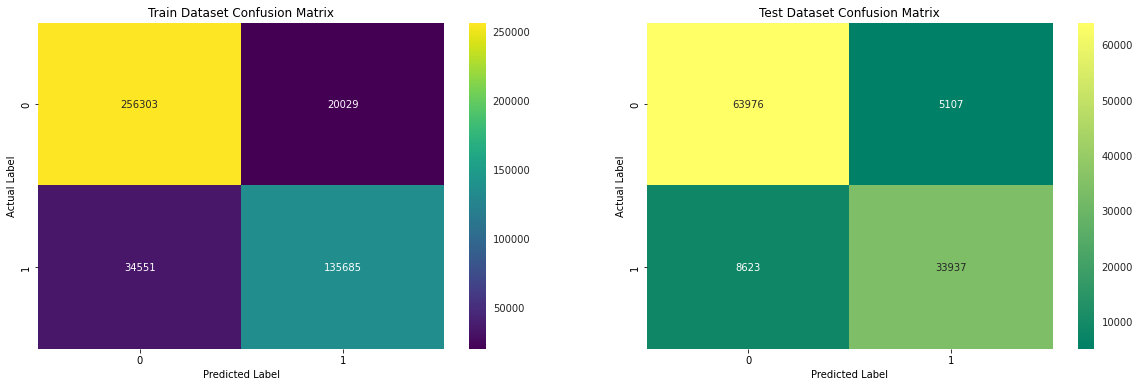



### Best Threshold = 0.3248
### Model AUC is : 0.9327
### Model Train F1 Score is : 0.8326
### Model Test F1 Score is : 0.8317


In [601]:
test_auc, train_f1_score, test_f1_score, best_t = validate_model(model_xgb, X_train, X_test, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

## 2. Decision Tree


In [602]:
from sklearn.tree import DecisionTreeClassifier

In [603]:
# Training the model with all features and hyper-parameterized values
dec_tree_2 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='auto',
                                   min_samples_leaf=100,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='auto', min_samples_leaf=100,
                       min_samples_split=50, random_state=49)

### Train AUC = 0.8442384002872877
### Test AUC = 0.8428210016100823


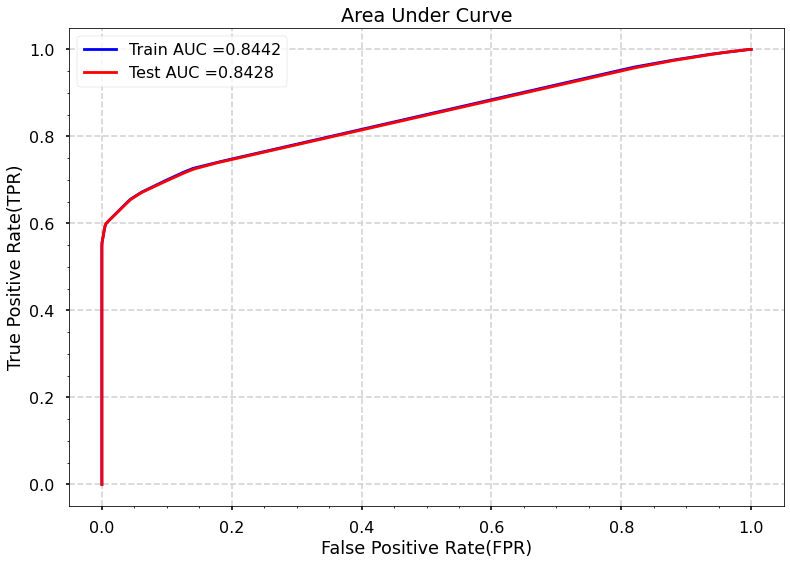

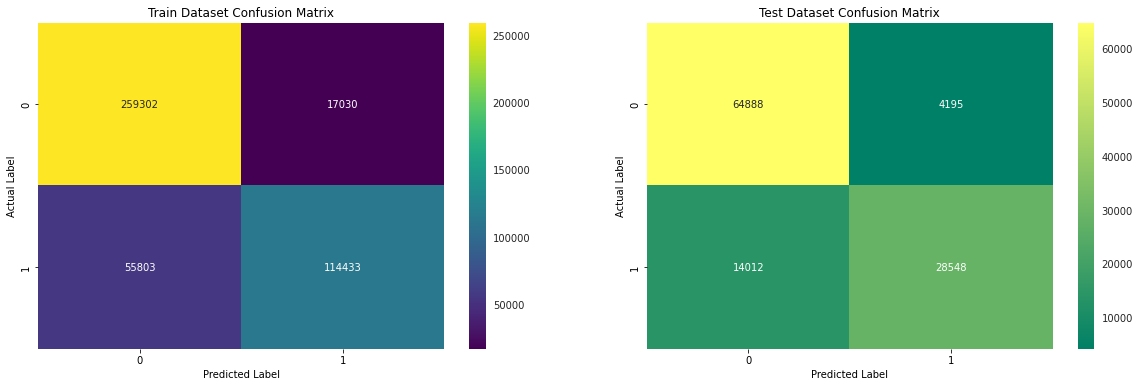



### Best Threshold = 0.4508
### Model AUC is : 0.8428
### Model Train F1 Score is : 0.7586
### Model Test F1 Score is : 0.7582


In [604]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_2, X_train, X_test, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

## 3. Random Forest Classifier







In [605]:
from sklearn.ensemble import RandomForestClassifier

In [606]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [607]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
model_rf = rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 7min 12s, sys: 8.59 s, total: 7min 21s
Wall time: 7min 22s


In [608]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score') 

params  mean_test_score  rank_test_score
6  {'n_estimators': 40, 'max_depth': 5}         0.608538                1
5  {'n_estimators': 50, 'max_depth': 5}         0.607991                2
0  {'n_estimators': 20, 'max_depth': 5}         0.607063                3
7  {'n_estimators': 10, 'max_depth': 5}         0.605506                4
3  {'n_estimators': 40, 'max_depth': 4}         0.600930                5
4  {'n_estimators': 20, 'max_depth': 3}         0.580623                6
2  {'n_estimators': 10, 'max_depth': 3}         0.534546                7
1  {'n_estimators': 50, 'max_depth': 1}         0.301088                8
8  {'n_estimators': 20, 'max_depth': 2}         0.299784                9
9  {'n_estimators': 40, 'max_depth': 1}         0.283906               10

In [609]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=10,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=10, random_state=49)

### Train AUC = 0.8437574509178053
### Test AUC = 0.8435875753452394


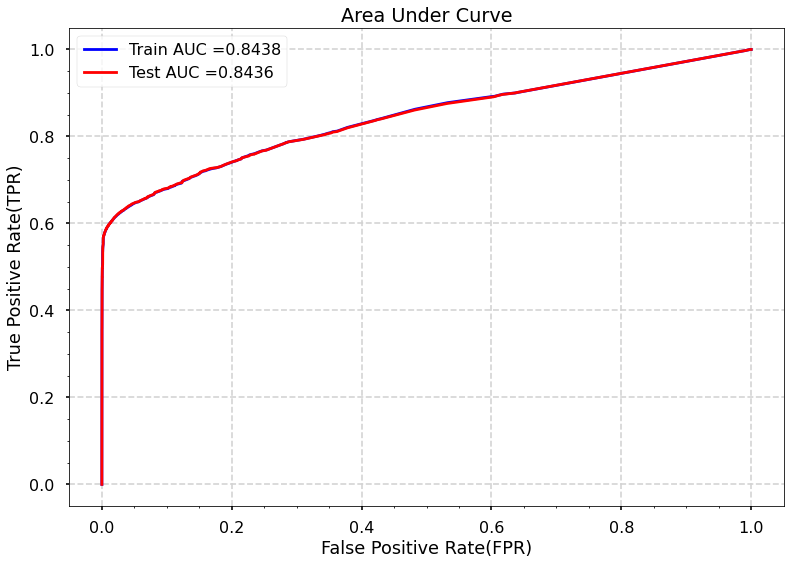

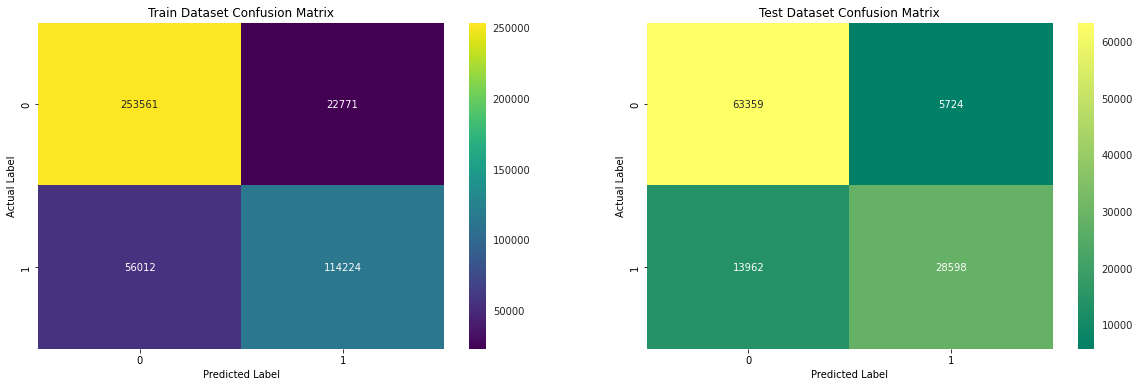



### Best Threshold = 0.4503
### Model AUC is : 0.8436
### Model Train F1 Score is : 0.7436
### Model Test F1 Score is : 0.7439


In [610]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train, X_test, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

# H. Improvement Model 

## 1. Standarization

In [611]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_std = scaler.transform(X_train)

## 2. Ouliers Handing 

In [612]:
features = list(X_train)[:-1]

ValueError: ignored

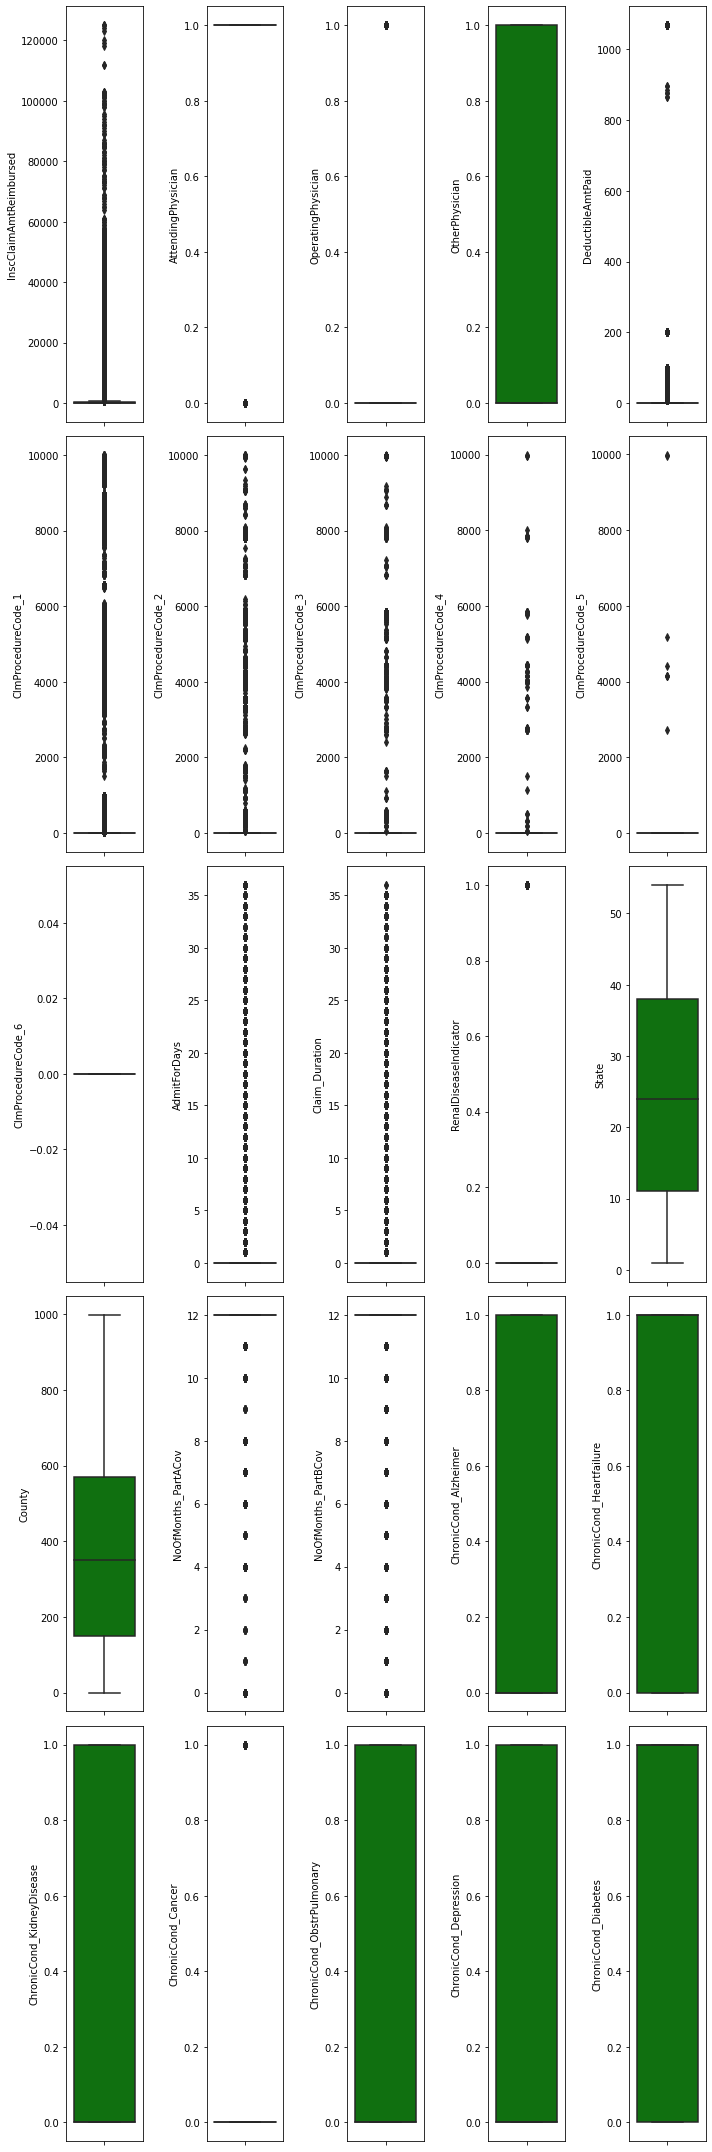

In [613]:
plt.figure(figsize = (10,30))
for i in range (0, len(features)):
    plt.subplot(5,5, i + 1 )
    sns.boxplot(y=features[i], data=X_train,color = 'green')
    plt.tight_layout()

In [ ]:
outlier_features =['IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','DeductibleAmtPaid','InscClaimAmtReimbursed']
for i in outlier_features: 
    train_df[i] = np.log(train_df[i]+1)

for i in outlier_features: 
    test_df[i] = np.log(test_df[i]+1)

# I. Modeling 

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Training the model with all features and hyper-parameterized values
log_reg_1 = LogisticRegression(C=0.03, penalty='l1',
                               fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                               class_weight='balanced',
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_1.fit(X_train, y_train)

In [ ]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_1, X_train, X_test, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

## 2. XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model_xgb = xgb.fit(X_train, y_train)

XGBClassifier(class_weight='balanced', max_depth=6,
                       max_features='auto', min_samples_leaf=100,
                       min_samples_split=50, random_state=49)

In [ ]:
test_auc, train_f1_score, test_f1_score, best_t = validate_model(model_xgb, X_train, X_test, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': model_xgb.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

In [ ]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

In [ ]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats, x=top_20_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance")
    plt.ylabel("Features\n")
    plt.title("Top 15 Importance Positive Features\n")

## 3. Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Training the model with all features and hyper-parameterized values
dec_tree_2 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='auto',
                                   min_samples_leaf=100,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_2.fit(X_train, y_train)

In [ ]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_2, X_train, X_test, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

## 3. Random Forest Classifier







In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
model_rf = rf_clf_randomcv.fit(X_train, y_train)

In [ ]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score') 

In [ ]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=10,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train, y_train)

In [ ]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train, X_test, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [ ]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

In [ ]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

In [ ]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats, x=top_20_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance")
    plt.ylabel("Features\n")
    plt.title("Top 15 Importance Positive Features\n")

# J. Model Evaluation 

## Baseline Model Evaluation 

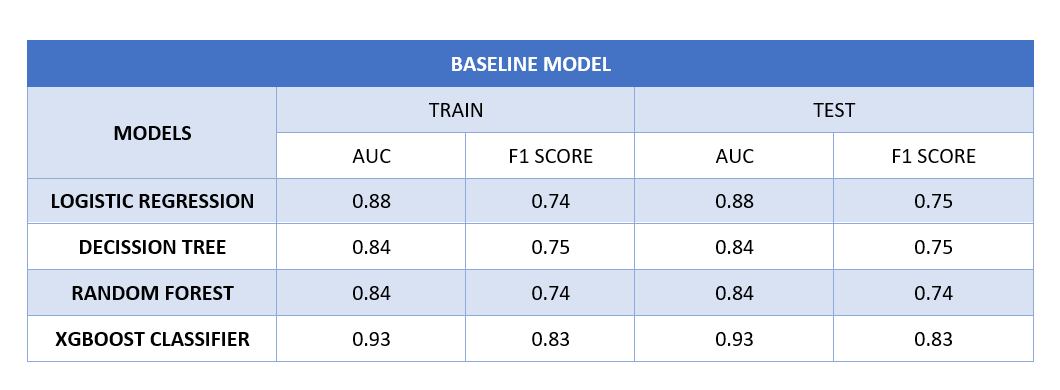

## Improved Model 

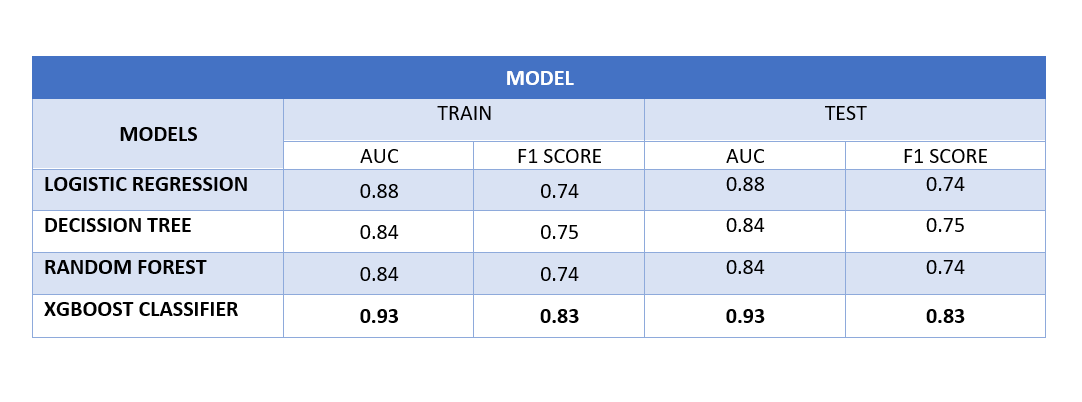

Comparing the value from Baseline model with improved model, there not so much different. In this case we will use Baseline model as a Final Model 


From the baseline model, 
- Xgboost was obtained as one of the models with the best value of 83%. 
- We can be said that by using this modeling we can detect 83% of providers who have the potential to fraud, 


we can predict : 

1. From 2 of every 10 Providers who is fraudulent detected as not fradulent 
2. From 2 of every 10 providers who is not - fradulent detected as fradulent 

# K. Business Recommendations

1. Look at the diagnosis that often appears, this is to avoid double billing, for example in patients with the same diganose repetedly, then there must be improvements in the treatment process can be done by administering different types of drugs or with additional therapy.  
2. Pay attention to providers with program programs that have the potential for fraud, such as the use of bundling prackage, as it can easily raise the cost by two or three times